In [19]:
!pip show torch

Name: torch
Version: 2.2.2
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\ajinkya\appdata\roaming\python\python310\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: pytorch-lightning, timm, torchaudio, torchmetrics, torchvision


In [20]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [21]:
import torch

# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
print(device)

cpu


In [23]:
import scipy.io

# Load and process the data
def import_file(file_to_read):
    # Load the .mat file
    new_data = scipy.io.loadmat(file_to_read)
    X_df = new_data["Xproc"]
    y_df = new_data["Yproc"]

    return X_df, y_df

In [24]:
file_path = "E:/Rnn_Tranformer_LBP/1_postProcbest.mat"

In [25]:
# Load the MATLAB file
import scipy

mat_data = scipy.io.loadmat(file_path)

# Get the keys (column names) in the MATLAB file
column_names = list(mat_data.keys())

# Print the column names
print(column_names)

['__header__', '__version__', '__globals__', 'Xproc', 'Yproc']


In [26]:
from sklearn.model_selection import train_test_split

# Assuming import_file is a function you've defined elsewhere
X, y = import_file(file_path)

print(X)
print(y)

[[[ 6.30345446e+00 -7.83345903e+00 -1.31584501e+01 ... -1.31193863e+01
   -3.11036409e+01 -4.17147671e+01]
  [ 6.07702495e+00 -1.35413218e+01 -1.21812646e+01 ... -6.78299550e+00
   -3.07517376e+01 -4.10950656e+01]
  [ 6.00446265e+00 -1.89006025e+01 -1.02427746e+01 ... -2.47285637e+01
   -2.43969594e+01 -3.93170630e+01]
  ...
  [-7.39484083e-01 -2.10782422e+01 -7.53893905e+01 ...  5.11402479e-01
   -2.01042284e+01 -3.15292963e+01]
  [ 4.15180729e+00 -2.20190813e+01 -6.97785034e+01 ...  8.67474173e+00
   -2.80640442e+01 -3.56004542e+01]
  [ 2.16865246e+00 -2.28611720e+01 -6.43970231e+01 ... -7.56871725e+00
   -2.29686184e+01 -2.90072283e+01]]

 [[ 1.17614839e+01  4.02752956e+00 -9.90379196e+00 ...  3.01419403e+00
   -3.09933108e+01 -3.80424375e+01]
  [ 1.11176109e+01  5.72646044e-02 -9.53182689e+00 ...  5.05898617e+00
   -3.33796350e+01 -3.68536248e+01]
  [ 7.85163373e+00 -3.43074429e+00 -6.08445131e+00 ... -1.07798896e+01
   -3.01644752e+01 -3.44640741e+01]
  ...
  [-3.11597088e+00 -2.0

In [27]:
!pip install mne

Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install ssqueezepy

Defaulting to user installation because normal site-packages is not writeable


In [29]:
!pip install --upgrade numba

Defaulting to user installation because normal site-packages is not writeable


In [55]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [31]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable


In [32]:
!pip show albumentations

Name: albumentations
Version: 1.4.4
Summary: An efficient library for image augmentation, providing extensive transformations to support machine learning and computer vision tasks.
Home-page: https://albumentations.ai
Author: Vladimir I. Iglovikov, Mikhail Druzhinin, Alex Parinov, Alexander Buslaev, Eugene Khvedchenya
Author-email: 
License: MIT
Location: c:\users\ajinkya\appdata\roaming\python\python310\site-packages
Requires: numpy, opencv-python-headless, pydantic, PyYAML, scikit-image, scikit-learn, scipy, typing-extensions
Required-by: 


In [33]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
import mne
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import os
import re
import pandas as pd

In [34]:
y = y.flatten()

In [35]:
print(X.shape)

(30, 1250, 1609)


In [36]:
# Assuming X is your input data with shape (30, 1250, 1609)
# and y is your target data with shape (1609,)

# Define the index to split the data
split_index = 1000

# Split X into training and testing sets
X_train = X[:, :, :split_index]
X_test = X[:, :, split_index:]

# Split y into training and testing sets
y_train = y[:split_index]
y_test = y[split_index:]

In [37]:
X = np.transpose(X, (2,0,1))
print(X.shape)

(1609, 30, 1250)


In [38]:
print(X_test.shape)
X_train = np.transpose(X_train, (2, 0, 1))
X_test = np.transpose(X_test, (2, 0, 1))
print(X_test.shape)

(30, 1250, 609)
(609, 30, 1250)


In [39]:
Wxt, scales = cwt(X_test[0], 'morlet')

In [40]:
print(Wxt.shape)
# 30 channels in Wxt
# for plotting only 1 channel or 3 channel

(30, 238, 1250)


C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


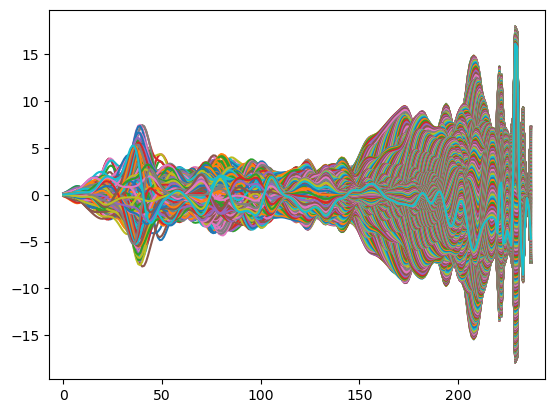

In [41]:
Wxt, scales = cwt(X_test[0], 'morlet')
plot(Wxt[0])

In [42]:
'''
import os

# Directory path
base_dir = "E:/Rnn_Tranformer_LBP"

# Create scaleogram directory within base directory
scaleogram_dir = os.path.join(base_dir, "scaleogram")
os.makedirs(scaleogram_dir, exist_ok=True)

'''

'\nimport os\n\n# Directory path\nbase_dir = "E:/Rnn_Tranformer_LBP"\n\n# Create scaleogram directory within base directory\nscaleogram_dir = os.path.join(base_dir, "scaleogram")\nos.makedirs(scaleogram_dir, exist_ok=True)\n\n'

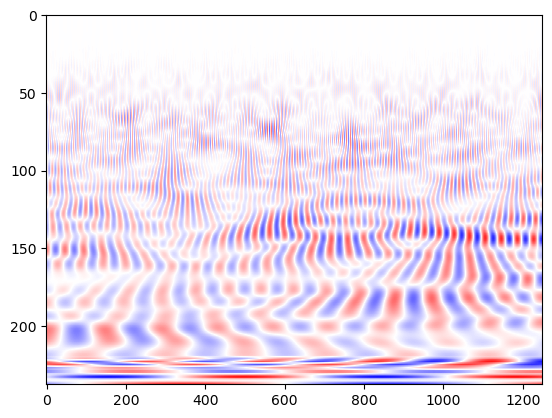

In [43]:
Wx, scales = cwt(X[0], 'morlet')
imshow(Wx[0])

In [44]:
import os
import numpy as np
from scipy.signal import cwt, morlet

# Directory paths
scaleogram_dir = "/home/kunuruabhishek/Desktop/ajinkya/scaleogram"
train_dir = os.path.join(scaleogram_dir, "train")
test_dir = os.path.join(scaleogram_dir, "test")

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create empty lists to store group numbers, labels, and paths
grpnos_train, labels_train, paths_train = [], [], []
grpnos_test, labels_test, paths_test = [], [], []

In [45]:
import os
import numpy as np

 
'''
# Directory paths
scaleogram_dir = "E:\\Rnn_Tranformer_LBP\\scaleogram"
train_dir = os.path.join(scaleogram_dir, "train")
test_dir = os.path.join(scaleogram_dir, "test")
 

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Create empty lists to store group numbers, labels, and paths
grpnos_train, labels_train, paths_train = [], [], []
grpnos_test, labels_test, paths_test = [], [], []
''' 

# Loop through the train data
for i, (x, label) in enumerate(zip(X_train, y_train)):
    # Loop over each trial (epoch)
    for c, epoch_data in enumerate(x):
        # Save the scaleogram data as a numpy file in train directory
        file_name = f'trial_{i}_{c}.npy'
        file_path = os.path.join(train_dir, file_name)
        #np.save(file_path, epoch_data)
        # Append group number, label, and path to the train lists
        grpnos_train.append(i)
        labels_train.append(label)
        paths_train.append(file_path)
 

# Loop through the test data
for i, (x, label) in enumerate(zip(X_test, y_test)):
    # Loop over each trial (epoch)
    for c, epoch_data in enumerate(x):
        # Save the scaleogram data as a numpy file in test directory
        file_name = f'trial_{i}_{c}.npy'
        file_path = os.path.join(test_dir, file_name)
        #np.save(file_path, epoch_data)
        # Append group number, label, and path to the test lists
        grpnos_test.append(i)
        labels_test.append(label)
        paths_test.append(file_path)

In [46]:
import pandas as pd

# Combine paths_train and labels_train into a DataFrame for training data
train_df = pd.DataFrame(zip(paths_train, labels_train, grpnos_train), columns=['path', 'label', 'group'])

# Combine paths_test and labels_test into a DataFrame for testing data
test_df = pd.DataFrame(zip(paths_test, labels_test, grpnos_test), columns=['path', 'label', 'group'])

# Show the first few rows of the training dataset
print("TRAIN: ")
print(train_df.head())
print("/n")
print("TEST: ")
# Show the first few rows of the testing dataset
print(test_df.head())

TRAIN: 
                                                path     label  group
0  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.001543      0
1  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.001543      0
2  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.001543      0
3  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.001543      0
4  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.001543      0
/n
TEST: 
                                                path     label  group
0  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.004016      0
1  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.004016      0
2  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.004016      0
3  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.004016      0
4  /home/kunuruabhishek/Desktop/ajinkya/scaleogra...  0.004016      0


In [47]:
train_df['path'][0]

'/home/kunuruabhishek/Desktop/ajinkya/scaleogram\\train\\trial_0_0.npy'

In [48]:
# Update the path separator in the DataFrame
train_df['path'] = train_df['path'].str.replace('\\', '/')
test_df['path'] = test_df['path'].str.replace('\\', '/')

print(train_df['path'][0])
print(test_df['path'][0])

#actual path: "E:\Rnn_Tranformer_LBP\scaleogram\train\trial_0_0.npy"

/home/kunuruabhishek/Desktop/ajinkya/scaleogram/train/trial_0_0.npy
/home/kunuruabhishek/Desktop/ajinkya/scaleogram/test/trial_0_0.npy


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_9280\1323951368.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['path'] = train_df['path'].str.replace('\\', '/')
C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_9280\1323951368.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['path'] = test_df['path'].str.replace('\\', '/')


In [49]:
!pip install torchvision
!pip install pytorch-lightning

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [50]:
!pip install timm

Defaulting to user installation because normal site-packages is not writeable


In [51]:
import numpy as np
from pytorch_lightning import seed_everything, LightningModule, Trainer
from sklearn.utils import class_weight
import torch.nn as nn
import torch
from torch.utils.data.dataloader import DataLoader
from pytorch_lightning.callbacks import EarlyStopping,ModelCheckpoint,LearningRateMonitor
from torch.optim.lr_scheduler import CyclicLR, ReduceLROnPlateau,CosineAnnealingWarmRestarts,OneCycleLR,CosineAnnealingLR
import torchvision
from sklearn.metrics import classification_report,f1_score,accuracy_score,roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
from PIL import Image
import cv2
from torch.utils.data import DataLoader, Dataset,ConcatDataset
import torchmetrics
import timm
import random

In [52]:
from PIL import Image
import torchvision.transforms as transforms

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class NumpyDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        np_file = self.df.iloc[idx]['path']
        label = self.df.iloc[idx]['label']

        #print(f"Trying to open: {np_file}") # Add this line to print the file path

        try:
            np_data = np.load(np_file)
        except FileNotFoundError:
            #print(f"File not found: {np_file}")
            return None, None # Return None for data and label if the file is not found

        if self.transform:
            np_data = self.transform(np_data)

        return np_data, label

# Create datasets and data loaders

# Create the datasets with the updated file paths
train_np_dataset = NumpyDataset(train_df)
test_np_dataset = NumpyDataset(test_df)

# Create data loaders with updated file paths
train_loader = DataLoader(train_np_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_np_dataset, batch_size=1, shuffle=False)

In [53]:
import torch

# Model architecture
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, embed_dim=768, in_channels=1):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.num_patches = (img_size // patch_size) ** 2
        padding = (patch_size // 2)  # Calculate padding to maintain spatial dimensions
        self.proj = nn.Conv2d(
            in_channels=in_channels,
            out_channels=embed_dim,
            kernel_size=patch_size,
            stride=patch_size,
            padding=padding  # Apply padding to maintain spatial dimensions
        )

    def forward(self, x):
        # If the input tensor is 2D (height, width), add a channel dimension
        if x.ndim == 2:
            x = x.unsqueeze(0).unsqueeze(0)
        # If the input tensor is 3D (channels, height, width), add a batch dimension
        elif x.ndim == 3:
            x = x.unsqueeze(0)

        # Reshape the input tensor to have 4 dimensions (batch_size, channels, height, width)
        x = x.float()  # Convert the input tensor to float
        x = self.proj(x)  # (batch_size, embed_dim, num_patches, 1, 1)
        x = x.flatten(2)  # (batch_size, embed_dim, num_patches)
        x = x.transpose(1, 2)  # (batch_size, num_patches, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.qkv_proj = nn.Linear(embed_dim, 3 * embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size, num_patches, _ = x.size()
        qkv = self.qkv_proj(x)
        q, k, v = qkv.chunk(3, dim=-1)

        #print(f"Input shape: {x.shape}")
        #print(f"q shape: {q.shape}")
        #print(f"k shape: {k.shape}")
        #print(f"v shape: {v.shape}")

        q = q.view(batch_size, num_patches, self.num_heads, self.head_dim).transpose(1, 2)
        k = k.view(batch_size, num_patches, self.num_heads, self.head_dim).transpose(1, 2)
        v = v.view(batch_size, num_patches, self.num_heads, self.head_dim).transpose(1, 2)

        attn_scores = torch.einsum("bqhd,bkhd->bhqk", [q, k])  # Equivalent to matmul + transpose
        #print(f"Attention scores shape: {attn_scores.shape}")
        attn_scores = attn_scores / np.sqrt(self.head_dim)
        attn_scores = nn.functional.softmax(attn_scores, dim=-1)

        out = torch.einsum("bhqv,bvhd->bqhd", [attn_scores, v])  # Equivalent to matmul + transpose
        #print(f"Output shape: {out.shape}")
        out = out.transpose(1, 2).contiguous().view(batch_size, num_patches, self.embed_dim)
        out = self.out_proj(out)
        return out

class EncoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.ln1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.ln2 = nn.LayerNorm(embed_dim)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.GELU(),
            nn.Linear(4 * embed_dim, embed_dim),
        )

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

class VisionTransformer(nn.Module):
    def __init__(
        self,
        img_size=224,
        patch_size=16,
        embed_dim=768,
        num_heads=12,
        num_encoder_blocks=12,
        in_channels=1,
        out_dim=1  # Updated parameter for regression output dimension
    ):
        super().__init__()
        self.patch_embedding = PatchEmbedding(img_size, patch_size, embed_dim, in_channels)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
         # Calculate the number of patches
        self.num_patches = (img_size // patch_size) ** 2 
        # Initialize pos_embedding with the correct shape
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))  
        self.encoder_blocks = nn.ModuleList([EncoderBlock(embed_dim, num_heads) for _ in range(num_encoder_blocks)])
        self.ln = nn.LayerNorm(embed_dim)
        
        self.dropout = nn.Dropout(p=0.1)  # Dropout rate of 0.1
        
        # Updated Linear layer for regression
        self.mlp_head = nn.Linear(embed_dim, out_dim)  

    def forward(self, x):
        x = self.patch_embedding(x)
        cls_token = self.cls_token.repeat(x.size(0), 1, 1)
        x = torch.cat([cls_token, x], dim=1)
        x = x + self.pos_embedding[:, :x.size(1)]  # Ensure the pos_embedding matches the shape of x
        for block in self.encoder_blocks:
            x = block(x)
            
            x = self.dropout(x)  # Apply dropout after each encoder block
            
        x = self.ln(x[:, 0])
        x = self.mlp_head(x)
        return x

In [36]:
import torch
print(torch.version.cuda)

11.7


In [37]:
import matplotlib.pyplot as plt

# Model instantiation and training
model = VisionTransformer(img_size=224, patch_size=16, embed_dim=768, num_heads=12, num_encoder_blocks=12, 
                          in_channels=1, out_dim=1)

# For regression tasks
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#max_imgs_to_train = 2500  # Maximum number of images to train on
batch_size = 30000

# Initialize lists to store losses and batch numbers
batch_losses = []
batch_numbers = []

running_loss = 0.0
num_imgs = 0  # Initialize the number of images processed

# Inside your training loop
for batch_idx, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs.squeeze(), labels.float())  # Convert labels to float
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    num_imgs += images.size(0)  # Update the number of images processed
    
    # Store batch loss and batch number
    batch_losses.append(loss.item())
    batch_numbers.append(batch_idx + 1)  # Batch numbers start from 1

    print(f"Batch {batch_idx+1}, Loss: {loss.item():.4f}, Images: {num_imgs}")

    # Check if the maximum number of images to train on is reached
    #if num_imgs >= max_imgs_to_train:
     #   break

epoch_loss = running_loss / num_imgs  # Calculate the average loss per image
print(f"Loss: {epoch_loss:.4f}, Images: {num_imgs}")

/home/kunuruabhishek/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 1, Loss: 0.0051, Images: 1
Batch 2, Loss: 24.1648, Images: 2
Batch 3, Loss: 14.5288, Images: 3
Batch 4, Loss: 0.4869, Images: 4
Batch 5, Loss: 1.2610, Images: 5
Batch 6, Loss: 1.0127, Images: 6
Batch 7, Loss: 2.1105, Images: 7
Batch 8, Loss: 0.2394, Images: 8
Batch 9, Loss: 0.3306, Images: 9
Batch 10, Loss: 0.2640, Images: 10
Batch 11, Loss: 0.0037, Images: 11
Batch 12, Loss: 0.0882, Images: 12
Batch 13, Loss: 0.9193, Images: 13
Batch 14, Loss: 0.3634, Images: 14
Batch 15, Loss: 1.1141, Images: 15
Batch 16, Loss: 0.0299, Images: 16
Batch 17, Loss: 2.8447, Images: 17
Batch 18, Loss: 4.5751, Images: 18
Batch 19, Loss: 2.1751, Images: 19
Batch 20, Loss: 0.3115, Images: 20
Batch 21, Loss: 0.0132, Images: 21
Batch 22, Loss: 0.0444, Images: 22
Batch 23, Loss: 0.0331, Images: 23
Batch 24, Loss: 0.2583, Images: 24
Batch 25, Loss: 1.4451, Images: 25
Batch 26, Loss: 0.8356, Images: 26
Batch 27, Loss: 0.4332, Images: 27
Batch 28, Loss: 1.0527, Images: 28
Batch 29, Loss: 0.0162, Images: 29
B

Batch 229, Loss: 0.0001, Images: 229
Batch 230, Loss: 0.0114, Images: 230
Batch 231, Loss: 0.1511, Images: 231
Batch 232, Loss: 0.3860, Images: 232
Batch 233, Loss: 0.0436, Images: 233
Batch 234, Loss: 0.1559, Images: 234
Batch 235, Loss: 0.7756, Images: 235
Batch 236, Loss: 0.0854, Images: 236
Batch 237, Loss: 0.0314, Images: 237
Batch 238, Loss: 0.0050, Images: 238
Batch 239, Loss: 0.5167, Images: 239
Batch 240, Loss: 0.1336, Images: 240
Batch 241, Loss: 0.2880, Images: 241
Batch 242, Loss: 0.6020, Images: 242
Batch 243, Loss: 0.0257, Images: 243
Batch 244, Loss: 0.0011, Images: 244
Batch 245, Loss: 0.1406, Images: 245
Batch 246, Loss: 0.0067, Images: 246
Batch 247, Loss: 0.1743, Images: 247
Batch 248, Loss: 0.1793, Images: 248
Batch 249, Loss: 0.4285, Images: 249
Batch 250, Loss: 0.0032, Images: 250
Batch 251, Loss: 0.0329, Images: 251
Batch 252, Loss: 0.0086, Images: 252
Batch 253, Loss: 0.0082, Images: 253
Batch 254, Loss: 0.0124, Images: 254
Batch 255, Loss: 0.6851, Images: 255
B

Batch 451, Loss: 0.5682, Images: 451
Batch 452, Loss: 0.2061, Images: 452
Batch 453, Loss: 0.0508, Images: 453
Batch 454, Loss: 0.1488, Images: 454
Batch 455, Loss: 0.0142, Images: 455
Batch 456, Loss: 0.0184, Images: 456
Batch 457, Loss: 0.0565, Images: 457
Batch 458, Loss: 0.0058, Images: 458
Batch 459, Loss: 0.0897, Images: 459
Batch 460, Loss: 0.0000, Images: 460
Batch 461, Loss: 0.0156, Images: 461
Batch 462, Loss: 0.0302, Images: 462
Batch 463, Loss: 0.0018, Images: 463
Batch 464, Loss: 0.0114, Images: 464
Batch 465, Loss: 0.0056, Images: 465
Batch 466, Loss: 0.0005, Images: 466
Batch 467, Loss: 0.0090, Images: 467
Batch 468, Loss: 0.0249, Images: 468
Batch 469, Loss: 0.0796, Images: 469
Batch 470, Loss: 0.0033, Images: 470
Batch 471, Loss: 0.0000, Images: 471
Batch 472, Loss: 0.0269, Images: 472
Batch 473, Loss: 0.0287, Images: 473
Batch 474, Loss: 0.0178, Images: 474
Batch 475, Loss: 0.0029, Images: 475
Batch 476, Loss: 0.0679, Images: 476
Batch 477, Loss: 0.1395, Images: 477
B

Batch 673, Loss: 0.0027, Images: 673
Batch 674, Loss: 0.0001, Images: 674
Batch 675, Loss: 0.0101, Images: 675
Batch 676, Loss: 0.0176, Images: 676
Batch 677, Loss: 0.2249, Images: 677
Batch 678, Loss: 0.0040, Images: 678
Batch 679, Loss: 0.0095, Images: 679
Batch 680, Loss: 0.0054, Images: 680
Batch 681, Loss: 0.0200, Images: 681
Batch 682, Loss: 0.0343, Images: 682
Batch 683, Loss: 0.0676, Images: 683
Batch 684, Loss: 0.0729, Images: 684
Batch 685, Loss: 0.0411, Images: 685
Batch 686, Loss: 0.0471, Images: 686
Batch 687, Loss: 0.0261, Images: 687
Batch 688, Loss: 0.0023, Images: 688
Batch 689, Loss: 0.0177, Images: 689
Batch 690, Loss: 0.0207, Images: 690
Batch 691, Loss: 0.0914, Images: 691
Batch 692, Loss: 0.0155, Images: 692
Batch 693, Loss: 0.0170, Images: 693
Batch 694, Loss: 0.0031, Images: 694
Batch 695, Loss: 0.0005, Images: 695
Batch 696, Loss: 0.0702, Images: 696
Batch 697, Loss: 0.0042, Images: 697
Batch 698, Loss: 0.0001, Images: 698
Batch 699, Loss: 0.0021, Images: 699
B

Batch 895, Loss: 0.0155, Images: 895
Batch 896, Loss: 0.0135, Images: 896
Batch 897, Loss: 0.1000, Images: 897
Batch 898, Loss: 0.0147, Images: 898
Batch 899, Loss: 0.0001, Images: 899
Batch 900, Loss: 0.0014, Images: 900
Batch 901, Loss: 0.1890, Images: 901
Batch 902, Loss: 0.0706, Images: 902
Batch 903, Loss: 0.0112, Images: 903
Batch 904, Loss: 0.0038, Images: 904
Batch 905, Loss: 0.0051, Images: 905
Batch 906, Loss: 0.2011, Images: 906
Batch 907, Loss: 0.0100, Images: 907
Batch 908, Loss: 0.0333, Images: 908
Batch 909, Loss: 0.1024, Images: 909
Batch 910, Loss: 0.0457, Images: 910
Batch 911, Loss: 0.0282, Images: 911
Batch 912, Loss: 0.0132, Images: 912
Batch 913, Loss: 0.0415, Images: 913
Batch 914, Loss: 0.0226, Images: 914
Batch 915, Loss: 0.0668, Images: 915
Batch 916, Loss: 0.0079, Images: 916
Batch 917, Loss: 0.0253, Images: 917
Batch 918, Loss: 0.0578, Images: 918
Batch 919, Loss: 0.0168, Images: 919
Batch 920, Loss: 0.0000, Images: 920
Batch 921, Loss: 0.0624, Images: 921
B

Batch 1111, Loss: 0.0136, Images: 1111
Batch 1112, Loss: 0.0002, Images: 1112
Batch 1113, Loss: 0.0097, Images: 1113
Batch 1114, Loss: 0.0425, Images: 1114
Batch 1115, Loss: 0.0907, Images: 1115
Batch 1116, Loss: 0.0012, Images: 1116
Batch 1117, Loss: 0.0280, Images: 1117
Batch 1118, Loss: 0.0030, Images: 1118
Batch 1119, Loss: 0.0535, Images: 1119
Batch 1120, Loss: 0.0018, Images: 1120
Batch 1121, Loss: 0.0698, Images: 1121
Batch 1122, Loss: 0.0416, Images: 1122
Batch 1123, Loss: 0.0014, Images: 1123
Batch 1124, Loss: 0.0423, Images: 1124
Batch 1125, Loss: 0.0233, Images: 1125
Batch 1126, Loss: 0.0227, Images: 1126
Batch 1127, Loss: 0.0606, Images: 1127
Batch 1128, Loss: 0.0000, Images: 1128
Batch 1129, Loss: 0.0090, Images: 1129
Batch 1130, Loss: 0.0137, Images: 1130
Batch 1131, Loss: 0.0016, Images: 1131
Batch 1132, Loss: 0.0019, Images: 1132
Batch 1133, Loss: 0.0149, Images: 1133
Batch 1134, Loss: 0.0053, Images: 1134
Batch 1135, Loss: 0.0033, Images: 1135
Batch 1136, Loss: 0.0019,

Batch 1322, Loss: 0.0000, Images: 1322
Batch 1323, Loss: 0.0237, Images: 1323
Batch 1324, Loss: 0.0029, Images: 1324
Batch 1325, Loss: 0.0508, Images: 1325
Batch 1326, Loss: 0.0367, Images: 1326
Batch 1327, Loss: 0.0037, Images: 1327
Batch 1328, Loss: 0.0486, Images: 1328
Batch 1329, Loss: 0.0415, Images: 1329
Batch 1330, Loss: 0.0007, Images: 1330
Batch 1331, Loss: 0.0162, Images: 1331
Batch 1332, Loss: 0.0004, Images: 1332
Batch 1333, Loss: 0.0054, Images: 1333
Batch 1334, Loss: 0.0001, Images: 1334
Batch 1335, Loss: 0.0300, Images: 1335
Batch 1336, Loss: 0.0039, Images: 1336
Batch 1337, Loss: 0.0032, Images: 1337
Batch 1338, Loss: 0.0015, Images: 1338
Batch 1339, Loss: 0.0590, Images: 1339
Batch 1340, Loss: 0.0125, Images: 1340
Batch 1341, Loss: 0.0217, Images: 1341
Batch 1342, Loss: 0.0037, Images: 1342
Batch 1343, Loss: 0.1461, Images: 1343
Batch 1344, Loss: 0.0491, Images: 1344
Batch 1345, Loss: 0.0001, Images: 1345
Batch 1346, Loss: 0.0087, Images: 1346
Batch 1347, Loss: 0.0560,

Batch 1533, Loss: 0.0022, Images: 1533
Batch 1534, Loss: 0.0040, Images: 1534
Batch 1535, Loss: 0.0002, Images: 1535
Batch 1536, Loss: 0.0420, Images: 1536
Batch 1537, Loss: 0.0000, Images: 1537
Batch 1538, Loss: 0.0037, Images: 1538
Batch 1539, Loss: 0.0007, Images: 1539
Batch 1540, Loss: 0.0000, Images: 1540
Batch 1541, Loss: 0.0280, Images: 1541
Batch 1542, Loss: 0.0799, Images: 1542
Batch 1543, Loss: 0.0195, Images: 1543
Batch 1544, Loss: 0.0053, Images: 1544
Batch 1545, Loss: 0.0023, Images: 1545
Batch 1546, Loss: 0.0316, Images: 1546
Batch 1547, Loss: 0.0014, Images: 1547
Batch 1548, Loss: 0.0695, Images: 1548
Batch 1549, Loss: 0.0132, Images: 1549
Batch 1550, Loss: 0.0066, Images: 1550
Batch 1551, Loss: 0.0033, Images: 1551
Batch 1552, Loss: 0.0091, Images: 1552
Batch 1553, Loss: 0.0037, Images: 1553
Batch 1554, Loss: 0.0078, Images: 1554
Batch 1555, Loss: 0.0022, Images: 1555
Batch 1556, Loss: 0.0057, Images: 1556
Batch 1557, Loss: 0.0037, Images: 1557
Batch 1558, Loss: 0.0137,

Batch 1744, Loss: 0.0206, Images: 1744
Batch 1745, Loss: 0.0018, Images: 1745
Batch 1746, Loss: 0.0007, Images: 1746
Batch 1747, Loss: 0.0080, Images: 1747
Batch 1748, Loss: 0.0005, Images: 1748
Batch 1749, Loss: 0.0016, Images: 1749
Batch 1750, Loss: 0.0081, Images: 1750
Batch 1751, Loss: 0.0044, Images: 1751
Batch 1752, Loss: 0.0183, Images: 1752
Batch 1753, Loss: 0.0511, Images: 1753
Batch 1754, Loss: 0.0026, Images: 1754
Batch 1755, Loss: 0.0113, Images: 1755
Batch 1756, Loss: 0.0072, Images: 1756
Batch 1757, Loss: 0.0259, Images: 1757
Batch 1758, Loss: 0.0022, Images: 1758
Batch 1759, Loss: 0.0001, Images: 1759
Batch 1760, Loss: 0.0006, Images: 1760
Batch 1761, Loss: 0.0000, Images: 1761
Batch 1762, Loss: 0.0286, Images: 1762
Batch 1763, Loss: 0.0272, Images: 1763
Batch 1764, Loss: 0.0111, Images: 1764
Batch 1765, Loss: 0.0056, Images: 1765
Batch 1766, Loss: 0.0024, Images: 1766
Batch 1767, Loss: 0.0098, Images: 1767
Batch 1768, Loss: 0.0109, Images: 1768
Batch 1769, Loss: 0.0013,

Batch 1955, Loss: 0.0030, Images: 1955
Batch 1956, Loss: 0.0024, Images: 1956
Batch 1957, Loss: 0.0014, Images: 1957
Batch 1958, Loss: 0.0106, Images: 1958
Batch 1959, Loss: 0.0005, Images: 1959
Batch 1960, Loss: 0.0013, Images: 1960
Batch 1961, Loss: 0.0041, Images: 1961
Batch 1962, Loss: 0.0004, Images: 1962
Batch 1963, Loss: 0.0135, Images: 1963
Batch 1964, Loss: 0.0035, Images: 1964
Batch 1965, Loss: 0.0067, Images: 1965
Batch 1966, Loss: 0.0024, Images: 1966
Batch 1967, Loss: 0.0319, Images: 1967
Batch 1968, Loss: 0.0028, Images: 1968
Batch 1969, Loss: 0.0057, Images: 1969
Batch 1970, Loss: 0.0154, Images: 1970
Batch 1971, Loss: 0.0008, Images: 1971
Batch 1972, Loss: 0.0242, Images: 1972
Batch 1973, Loss: 0.0049, Images: 1973
Batch 1974, Loss: 0.0068, Images: 1974
Batch 1975, Loss: 0.0051, Images: 1975
Batch 1976, Loss: 0.0016, Images: 1976
Batch 1977, Loss: 0.0058, Images: 1977
Batch 1978, Loss: 0.0002, Images: 1978
Batch 1979, Loss: 0.0104, Images: 1979
Batch 1980, Loss: 0.0054,

Batch 2166, Loss: 0.0107, Images: 2166
Batch 2167, Loss: 0.0050, Images: 2167
Batch 2168, Loss: 0.0154, Images: 2168
Batch 2169, Loss: 0.0198, Images: 2169
Batch 2170, Loss: 0.0051, Images: 2170
Batch 2171, Loss: 0.0000, Images: 2171
Batch 2172, Loss: 0.0001, Images: 2172
Batch 2173, Loss: 0.0355, Images: 2173
Batch 2174, Loss: 0.0075, Images: 2174
Batch 2175, Loss: 0.0002, Images: 2175
Batch 2176, Loss: 0.0080, Images: 2176
Batch 2177, Loss: 0.0000, Images: 2177
Batch 2178, Loss: 0.0164, Images: 2178
Batch 2179, Loss: 0.0009, Images: 2179
Batch 2180, Loss: 0.0007, Images: 2180
Batch 2181, Loss: 0.0001, Images: 2181
Batch 2182, Loss: 0.0135, Images: 2182
Batch 2183, Loss: 0.0067, Images: 2183
Batch 2184, Loss: 0.0010, Images: 2184
Batch 2185, Loss: 0.0045, Images: 2185
Batch 2186, Loss: 0.0000, Images: 2186
Batch 2187, Loss: 0.0031, Images: 2187
Batch 2188, Loss: 0.0003, Images: 2188
Batch 2189, Loss: 0.0456, Images: 2189
Batch 2190, Loss: 0.0087, Images: 2190
Batch 2191, Loss: 0.0017,

Batch 2377, Loss: 0.0040, Images: 2377
Batch 2378, Loss: 0.0055, Images: 2378
Batch 2379, Loss: 0.0006, Images: 2379
Batch 2380, Loss: 0.0021, Images: 2380
Batch 2381, Loss: 0.0170, Images: 2381
Batch 2382, Loss: 0.0005, Images: 2382
Batch 2383, Loss: 0.0055, Images: 2383
Batch 2384, Loss: 0.0027, Images: 2384
Batch 2385, Loss: 0.0158, Images: 2385
Batch 2386, Loss: 0.0039, Images: 2386
Batch 2387, Loss: 0.0086, Images: 2387
Batch 2388, Loss: 0.0061, Images: 2388
Batch 2389, Loss: 0.0037, Images: 2389
Batch 2390, Loss: 0.0048, Images: 2390
Batch 2391, Loss: 0.0001, Images: 2391
Batch 2392, Loss: 0.0013, Images: 2392
Batch 2393, Loss: 0.0030, Images: 2393
Batch 2394, Loss: 0.0012, Images: 2394
Batch 2395, Loss: 0.0111, Images: 2395
Batch 2396, Loss: 0.0130, Images: 2396
Batch 2397, Loss: 0.0028, Images: 2397
Batch 2398, Loss: 0.0005, Images: 2398
Batch 2399, Loss: 0.0095, Images: 2399
Batch 2400, Loss: 0.0033, Images: 2400
Batch 2401, Loss: 0.0189, Images: 2401
Batch 2402, Loss: 0.0010,

Batch 2588, Loss: 0.0013, Images: 2588
Batch 2589, Loss: 0.0080, Images: 2589
Batch 2590, Loss: 0.0037, Images: 2590
Batch 2591, Loss: 0.0000, Images: 2591
Batch 2592, Loss: 0.0015, Images: 2592
Batch 2593, Loss: 0.0025, Images: 2593
Batch 2594, Loss: 0.0067, Images: 2594
Batch 2595, Loss: 0.0434, Images: 2595
Batch 2596, Loss: 0.0022, Images: 2596
Batch 2597, Loss: 0.0000, Images: 2597
Batch 2598, Loss: 0.0076, Images: 2598
Batch 2599, Loss: 0.0040, Images: 2599
Batch 2600, Loss: 0.0000, Images: 2600
Batch 2601, Loss: 0.0034, Images: 2601
Batch 2602, Loss: 0.0016, Images: 2602
Batch 2603, Loss: 0.0022, Images: 2603
Batch 2604, Loss: 0.0029, Images: 2604
Batch 2605, Loss: 0.0134, Images: 2605
Batch 2606, Loss: 0.0028, Images: 2606
Batch 2607, Loss: 0.0021, Images: 2607
Batch 2608, Loss: 0.0129, Images: 2608
Batch 2609, Loss: 0.0458, Images: 2609
Batch 2610, Loss: 0.0206, Images: 2610
Batch 2611, Loss: 0.0264, Images: 2611
Batch 2612, Loss: 0.0002, Images: 2612
Batch 2613, Loss: 0.0093,

Batch 2799, Loss: 0.0123, Images: 2799
Batch 2800, Loss: 0.0038, Images: 2800
Batch 2801, Loss: 0.0016, Images: 2801
Batch 2802, Loss: 0.0120, Images: 2802
Batch 2803, Loss: 0.0009, Images: 2803
Batch 2804, Loss: 0.0012, Images: 2804
Batch 2805, Loss: 0.0019, Images: 2805
Batch 2806, Loss: 0.0015, Images: 2806
Batch 2807, Loss: 0.0005, Images: 2807
Batch 2808, Loss: 0.0000, Images: 2808
Batch 2809, Loss: 0.0009, Images: 2809
Batch 2810, Loss: 0.0124, Images: 2810
Batch 2811, Loss: 0.0008, Images: 2811
Batch 2812, Loss: 0.0663, Images: 2812
Batch 2813, Loss: 0.0131, Images: 2813
Batch 2814, Loss: 0.0047, Images: 2814
Batch 2815, Loss: 0.0008, Images: 2815
Batch 2816, Loss: 0.0031, Images: 2816
Batch 2817, Loss: 0.0249, Images: 2817
Batch 2818, Loss: 0.0034, Images: 2818
Batch 2819, Loss: 0.0001, Images: 2819
Batch 2820, Loss: 0.0046, Images: 2820
Batch 2821, Loss: 0.0003, Images: 2821
Batch 2822, Loss: 0.0007, Images: 2822
Batch 2823, Loss: 0.0009, Images: 2823
Batch 2824, Loss: 0.0001,

Batch 3010, Loss: 0.0241, Images: 3010
Batch 3011, Loss: 0.0046, Images: 3011
Batch 3012, Loss: 0.0006, Images: 3012
Batch 3013, Loss: 0.0001, Images: 3013
Batch 3014, Loss: 0.0068, Images: 3014
Batch 3015, Loss: 0.0340, Images: 3015
Batch 3016, Loss: 0.0016, Images: 3016
Batch 3017, Loss: 0.0038, Images: 3017
Batch 3018, Loss: 0.0029, Images: 3018
Batch 3019, Loss: 0.0038, Images: 3019
Batch 3020, Loss: 0.0113, Images: 3020
Batch 3021, Loss: 0.0049, Images: 3021
Batch 3022, Loss: 0.0019, Images: 3022
Batch 3023, Loss: 0.0000, Images: 3023
Batch 3024, Loss: 0.0084, Images: 3024
Batch 3025, Loss: 0.0017, Images: 3025
Batch 3026, Loss: 0.0163, Images: 3026
Batch 3027, Loss: 0.0148, Images: 3027
Batch 3028, Loss: 0.0279, Images: 3028
Batch 3029, Loss: 0.0653, Images: 3029
Batch 3030, Loss: 0.0033, Images: 3030
Batch 3031, Loss: 0.0102, Images: 3031
Batch 3032, Loss: 0.0018, Images: 3032
Batch 3033, Loss: 0.0013, Images: 3033
Batch 3034, Loss: 0.0254, Images: 3034
Batch 3035, Loss: 0.0221,

Batch 3221, Loss: 0.0214, Images: 3221
Batch 3222, Loss: 0.0000, Images: 3222
Batch 3223, Loss: 0.0019, Images: 3223
Batch 3224, Loss: 0.0429, Images: 3224
Batch 3225, Loss: 0.0204, Images: 3225
Batch 3226, Loss: 0.0000, Images: 3226
Batch 3227, Loss: 0.0001, Images: 3227
Batch 3228, Loss: 0.0028, Images: 3228
Batch 3229, Loss: 0.0000, Images: 3229
Batch 3230, Loss: 0.0042, Images: 3230
Batch 3231, Loss: 0.0060, Images: 3231
Batch 3232, Loss: 0.0000, Images: 3232
Batch 3233, Loss: 0.0009, Images: 3233
Batch 3234, Loss: 0.0049, Images: 3234
Batch 3235, Loss: 0.0127, Images: 3235
Batch 3236, Loss: 0.0141, Images: 3236
Batch 3237, Loss: 0.0025, Images: 3237
Batch 3238, Loss: 0.0160, Images: 3238
Batch 3239, Loss: 0.0057, Images: 3239
Batch 3240, Loss: 0.0012, Images: 3240
Batch 3241, Loss: 0.0163, Images: 3241
Batch 3242, Loss: 0.0001, Images: 3242
Batch 3243, Loss: 0.0062, Images: 3243
Batch 3244, Loss: 0.0062, Images: 3244
Batch 3245, Loss: 0.0181, Images: 3245
Batch 3246, Loss: 0.0000,

Batch 3432, Loss: 0.0009, Images: 3432
Batch 3433, Loss: 0.0000, Images: 3433
Batch 3434, Loss: 0.0308, Images: 3434
Batch 3435, Loss: 0.0000, Images: 3435
Batch 3436, Loss: 0.0042, Images: 3436
Batch 3437, Loss: 0.0000, Images: 3437
Batch 3438, Loss: 0.0216, Images: 3438
Batch 3439, Loss: 0.0172, Images: 3439
Batch 3440, Loss: 0.0133, Images: 3440
Batch 3441, Loss: 0.0000, Images: 3441
Batch 3442, Loss: 0.0146, Images: 3442
Batch 3443, Loss: 0.0000, Images: 3443
Batch 3444, Loss: 0.0035, Images: 3444
Batch 3445, Loss: 0.0126, Images: 3445
Batch 3446, Loss: 0.0038, Images: 3446
Batch 3447, Loss: 0.0004, Images: 3447
Batch 3448, Loss: 0.0020, Images: 3448
Batch 3449, Loss: 0.0027, Images: 3449
Batch 3450, Loss: 0.0540, Images: 3450
Batch 3451, Loss: 0.0012, Images: 3451
Batch 3452, Loss: 0.0000, Images: 3452
Batch 3453, Loss: 0.0000, Images: 3453
Batch 3454, Loss: 0.0023, Images: 3454
Batch 3455, Loss: 0.0179, Images: 3455
Batch 3456, Loss: 0.0199, Images: 3456
Batch 3457, Loss: 0.0121,

Batch 3643, Loss: 0.0028, Images: 3643
Batch 3644, Loss: 0.0011, Images: 3644
Batch 3645, Loss: 0.0005, Images: 3645
Batch 3646, Loss: 0.0005, Images: 3646
Batch 3647, Loss: 0.0016, Images: 3647
Batch 3648, Loss: 0.0001, Images: 3648
Batch 3649, Loss: 0.0000, Images: 3649
Batch 3650, Loss: 0.0050, Images: 3650
Batch 3651, Loss: 0.0159, Images: 3651
Batch 3652, Loss: 0.0023, Images: 3652
Batch 3653, Loss: 0.0013, Images: 3653
Batch 3654, Loss: 0.0022, Images: 3654
Batch 3655, Loss: 0.0023, Images: 3655
Batch 3656, Loss: 0.0011, Images: 3656
Batch 3657, Loss: 0.0008, Images: 3657
Batch 3658, Loss: 0.0081, Images: 3658
Batch 3659, Loss: 0.0016, Images: 3659
Batch 3660, Loss: 0.0016, Images: 3660
Batch 3661, Loss: 0.0039, Images: 3661
Batch 3662, Loss: 0.0016, Images: 3662
Batch 3663, Loss: 0.0015, Images: 3663
Batch 3664, Loss: 0.0015, Images: 3664
Batch 3665, Loss: 0.0010, Images: 3665
Batch 3666, Loss: 0.0002, Images: 3666
Batch 3667, Loss: 0.0012, Images: 3667
Batch 3668, Loss: 0.0010,

Batch 3854, Loss: 0.0019, Images: 3854
Batch 3855, Loss: 0.0066, Images: 3855
Batch 3856, Loss: 0.0010, Images: 3856
Batch 3857, Loss: 0.0002, Images: 3857
Batch 3858, Loss: 0.0043, Images: 3858
Batch 3859, Loss: 0.0001, Images: 3859
Batch 3860, Loss: 0.0059, Images: 3860
Batch 3861, Loss: 0.0004, Images: 3861
Batch 3862, Loss: 0.0017, Images: 3862
Batch 3863, Loss: 0.0003, Images: 3863
Batch 3864, Loss: 0.0002, Images: 3864
Batch 3865, Loss: 0.0031, Images: 3865
Batch 3866, Loss: 0.0000, Images: 3866
Batch 3867, Loss: 0.0058, Images: 3867
Batch 3868, Loss: 0.0018, Images: 3868
Batch 3869, Loss: 0.0132, Images: 3869
Batch 3870, Loss: 0.0000, Images: 3870
Batch 3871, Loss: 0.0006, Images: 3871
Batch 3872, Loss: 0.0020, Images: 3872
Batch 3873, Loss: 0.0001, Images: 3873
Batch 3874, Loss: 0.0003, Images: 3874
Batch 3875, Loss: 0.0026, Images: 3875
Batch 3876, Loss: 0.0005, Images: 3876
Batch 3877, Loss: 0.0027, Images: 3877
Batch 3878, Loss: 0.0013, Images: 3878
Batch 3879, Loss: 0.0000,

Batch 4065, Loss: 0.0293, Images: 4065
Batch 4066, Loss: 0.0000, Images: 4066
Batch 4067, Loss: 0.0011, Images: 4067
Batch 4068, Loss: 0.0009, Images: 4068
Batch 4069, Loss: 0.0020, Images: 4069
Batch 4070, Loss: 0.0048, Images: 4070
Batch 4071, Loss: 0.0005, Images: 4071
Batch 4072, Loss: 0.0011, Images: 4072
Batch 4073, Loss: 0.0000, Images: 4073
Batch 4074, Loss: 0.0011, Images: 4074
Batch 4075, Loss: 0.0028, Images: 4075
Batch 4076, Loss: 0.0025, Images: 4076
Batch 4077, Loss: 0.0003, Images: 4077
Batch 4078, Loss: 0.0000, Images: 4078
Batch 4079, Loss: 0.0200, Images: 4079
Batch 4080, Loss: 0.0021, Images: 4080
Batch 4081, Loss: 0.0010, Images: 4081
Batch 4082, Loss: 0.0011, Images: 4082
Batch 4083, Loss: 0.0036, Images: 4083
Batch 4084, Loss: 0.0000, Images: 4084
Batch 4085, Loss: 0.0005, Images: 4085
Batch 4086, Loss: 0.0001, Images: 4086
Batch 4087, Loss: 0.0029, Images: 4087
Batch 4088, Loss: 0.0025, Images: 4088
Batch 4089, Loss: 0.0000, Images: 4089
Batch 4090, Loss: 0.0009,

Batch 4276, Loss: 0.0009, Images: 4276
Batch 4277, Loss: 0.0000, Images: 4277
Batch 4278, Loss: 0.0031, Images: 4278
Batch 4279, Loss: 0.0026, Images: 4279
Batch 4280, Loss: 0.0012, Images: 4280
Batch 4281, Loss: 0.0001, Images: 4281
Batch 4282, Loss: 0.0020, Images: 4282
Batch 4283, Loss: 0.0088, Images: 4283
Batch 4284, Loss: 0.0032, Images: 4284
Batch 4285, Loss: 0.0043, Images: 4285
Batch 4286, Loss: 0.0000, Images: 4286
Batch 4287, Loss: 0.0003, Images: 4287
Batch 4288, Loss: 0.0000, Images: 4288
Batch 4289, Loss: 0.0019, Images: 4289
Batch 4290, Loss: 0.0004, Images: 4290
Batch 4291, Loss: 0.0003, Images: 4291
Batch 4292, Loss: 0.0034, Images: 4292
Batch 4293, Loss: 0.0031, Images: 4293
Batch 4294, Loss: 0.0067, Images: 4294
Batch 4295, Loss: 0.0028, Images: 4295
Batch 4296, Loss: 0.0005, Images: 4296
Batch 4297, Loss: 0.0103, Images: 4297
Batch 4298, Loss: 0.0009, Images: 4298
Batch 4299, Loss: 0.0000, Images: 4299
Batch 4300, Loss: 0.0008, Images: 4300
Batch 4301, Loss: 0.0001,

Batch 4487, Loss: 0.0017, Images: 4487
Batch 4488, Loss: 0.0009, Images: 4488
Batch 4489, Loss: 0.0033, Images: 4489
Batch 4490, Loss: 0.0005, Images: 4490
Batch 4491, Loss: 0.0001, Images: 4491
Batch 4492, Loss: 0.0003, Images: 4492
Batch 4493, Loss: 0.0143, Images: 4493
Batch 4494, Loss: 0.0015, Images: 4494
Batch 4495, Loss: 0.0032, Images: 4495
Batch 4496, Loss: 0.0005, Images: 4496
Batch 4497, Loss: 0.0011, Images: 4497
Batch 4498, Loss: 0.0034, Images: 4498
Batch 4499, Loss: 0.0063, Images: 4499
Batch 4500, Loss: 0.0050, Images: 4500
Batch 4501, Loss: 0.0144, Images: 4501
Batch 4502, Loss: 0.0032, Images: 4502
Batch 4503, Loss: 0.0017, Images: 4503
Batch 4504, Loss: 0.0000, Images: 4504
Batch 4505, Loss: 0.0009, Images: 4505
Batch 4506, Loss: 0.0007, Images: 4506
Batch 4507, Loss: 0.0003, Images: 4507
Batch 4508, Loss: 0.0027, Images: 4508
Batch 4509, Loss: 0.0003, Images: 4509
Batch 4510, Loss: 0.0002, Images: 4510
Batch 4511, Loss: 0.0213, Images: 4511
Batch 4512, Loss: 0.0006,

Batch 4698, Loss: 0.0006, Images: 4698
Batch 4699, Loss: 0.0095, Images: 4699
Batch 4700, Loss: 0.0060, Images: 4700
Batch 4701, Loss: 0.0056, Images: 4701
Batch 4702, Loss: 0.0048, Images: 4702
Batch 4703, Loss: 0.0057, Images: 4703
Batch 4704, Loss: 0.0017, Images: 4704
Batch 4705, Loss: 0.0012, Images: 4705
Batch 4706, Loss: 0.0003, Images: 4706
Batch 4707, Loss: 0.0009, Images: 4707
Batch 4708, Loss: 0.0002, Images: 4708
Batch 4709, Loss: 0.0001, Images: 4709
Batch 4710, Loss: 0.0029, Images: 4710
Batch 4711, Loss: 0.0001, Images: 4711
Batch 4712, Loss: 0.0041, Images: 4712
Batch 4713, Loss: 0.0007, Images: 4713
Batch 4714, Loss: 0.0000, Images: 4714
Batch 4715, Loss: 0.0004, Images: 4715
Batch 4716, Loss: 0.0020, Images: 4716
Batch 4717, Loss: 0.0241, Images: 4717
Batch 4718, Loss: 0.0028, Images: 4718
Batch 4719, Loss: 0.0000, Images: 4719
Batch 4720, Loss: 0.0002, Images: 4720
Batch 4721, Loss: 0.0052, Images: 4721
Batch 4722, Loss: 0.0002, Images: 4722
Batch 4723, Loss: 0.0034,

Batch 4909, Loss: 0.0019, Images: 4909
Batch 4910, Loss: 0.0035, Images: 4910
Batch 4911, Loss: 0.0000, Images: 4911
Batch 4912, Loss: 0.0000, Images: 4912
Batch 4913, Loss: 0.0000, Images: 4913
Batch 4914, Loss: 0.0035, Images: 4914
Batch 4915, Loss: 0.0000, Images: 4915
Batch 4916, Loss: 0.0006, Images: 4916
Batch 4917, Loss: 0.0000, Images: 4917
Batch 4918, Loss: 0.0014, Images: 4918
Batch 4919, Loss: 0.0000, Images: 4919
Batch 4920, Loss: 0.0036, Images: 4920
Batch 4921, Loss: 0.0000, Images: 4921
Batch 4922, Loss: 0.0007, Images: 4922
Batch 4923, Loss: 0.0001, Images: 4923
Batch 4924, Loss: 0.0001, Images: 4924
Batch 4925, Loss: 0.0007, Images: 4925
Batch 4926, Loss: 0.0039, Images: 4926
Batch 4927, Loss: 0.0008, Images: 4927
Batch 4928, Loss: 0.0002, Images: 4928
Batch 4929, Loss: 0.0010, Images: 4929
Batch 4930, Loss: 0.0005, Images: 4930
Batch 4931, Loss: 0.0024, Images: 4931
Batch 4932, Loss: 0.0021, Images: 4932
Batch 4933, Loss: 0.0024, Images: 4933
Batch 4934, Loss: 0.0019,

Batch 5120, Loss: 0.0017, Images: 5120
Batch 5121, Loss: 0.0003, Images: 5121
Batch 5122, Loss: 0.0000, Images: 5122
Batch 5123, Loss: 0.0002, Images: 5123
Batch 5124, Loss: 0.0001, Images: 5124
Batch 5125, Loss: 0.0010, Images: 5125
Batch 5126, Loss: 0.0001, Images: 5126
Batch 5127, Loss: 0.0005, Images: 5127
Batch 5128, Loss: 0.0001, Images: 5128
Batch 5129, Loss: 0.0004, Images: 5129
Batch 5130, Loss: 0.0000, Images: 5130
Batch 5131, Loss: 0.0026, Images: 5131
Batch 5132, Loss: 0.0024, Images: 5132
Batch 5133, Loss: 0.0002, Images: 5133
Batch 5134, Loss: 0.0008, Images: 5134
Batch 5135, Loss: 0.0000, Images: 5135
Batch 5136, Loss: 0.0002, Images: 5136
Batch 5137, Loss: 0.0000, Images: 5137
Batch 5138, Loss: 0.0004, Images: 5138
Batch 5139, Loss: 0.0001, Images: 5139
Batch 5140, Loss: 0.0001, Images: 5140
Batch 5141, Loss: 0.0003, Images: 5141
Batch 5142, Loss: 0.0000, Images: 5142
Batch 5143, Loss: 0.0015, Images: 5143
Batch 5144, Loss: 0.0006, Images: 5144
Batch 5145, Loss: 0.0008,

Batch 5331, Loss: 0.0004, Images: 5331
Batch 5332, Loss: 0.0001, Images: 5332
Batch 5333, Loss: 0.0001, Images: 5333
Batch 5334, Loss: 0.0024, Images: 5334
Batch 5335, Loss: 0.0010, Images: 5335
Batch 5336, Loss: 0.0009, Images: 5336
Batch 5337, Loss: 0.0040, Images: 5337
Batch 5338, Loss: 0.0030, Images: 5338
Batch 5339, Loss: 0.0000, Images: 5339
Batch 5340, Loss: 0.0001, Images: 5340
Batch 5341, Loss: 0.0001, Images: 5341
Batch 5342, Loss: 0.0001, Images: 5342
Batch 5343, Loss: 0.0021, Images: 5343
Batch 5344, Loss: 0.0016, Images: 5344
Batch 5345, Loss: 0.0019, Images: 5345
Batch 5346, Loss: 0.0008, Images: 5346
Batch 5347, Loss: 0.0018, Images: 5347
Batch 5348, Loss: 0.0001, Images: 5348
Batch 5349, Loss: 0.0006, Images: 5349
Batch 5350, Loss: 0.0018, Images: 5350
Batch 5351, Loss: 0.0001, Images: 5351
Batch 5352, Loss: 0.0009, Images: 5352
Batch 5353, Loss: 0.0004, Images: 5353
Batch 5354, Loss: 0.0042, Images: 5354
Batch 5355, Loss: 0.0023, Images: 5355
Batch 5356, Loss: 0.0038,

Batch 5542, Loss: 0.0018, Images: 5542
Batch 5543, Loss: 0.0008, Images: 5543
Batch 5544, Loss: 0.0068, Images: 5544
Batch 5545, Loss: 0.0048, Images: 5545
Batch 5546, Loss: 0.0000, Images: 5546
Batch 5547, Loss: 0.0001, Images: 5547
Batch 5548, Loss: 0.0158, Images: 5548
Batch 5549, Loss: 0.0006, Images: 5549
Batch 5550, Loss: 0.0003, Images: 5550
Batch 5551, Loss: 0.0005, Images: 5551
Batch 5552, Loss: 0.0006, Images: 5552
Batch 5553, Loss: 0.0124, Images: 5553
Batch 5554, Loss: 0.0020, Images: 5554
Batch 5555, Loss: 0.0037, Images: 5555
Batch 5556, Loss: 0.0096, Images: 5556
Batch 5557, Loss: 0.0016, Images: 5557
Batch 5558, Loss: 0.0052, Images: 5558
Batch 5559, Loss: 0.0008, Images: 5559
Batch 5560, Loss: 0.0015, Images: 5560
Batch 5561, Loss: 0.0024, Images: 5561
Batch 5562, Loss: 0.0005, Images: 5562
Batch 5563, Loss: 0.0025, Images: 5563
Batch 5564, Loss: 0.0001, Images: 5564
Batch 5565, Loss: 0.0001, Images: 5565
Batch 5566, Loss: 0.0030, Images: 5566
Batch 5567, Loss: 0.0008,

Batch 5753, Loss: 0.0031, Images: 5753
Batch 5754, Loss: 0.0081, Images: 5754
Batch 5755, Loss: 0.0070, Images: 5755
Batch 5756, Loss: 0.0005, Images: 5756
Batch 5757, Loss: 0.0008, Images: 5757
Batch 5758, Loss: 0.0027, Images: 5758
Batch 5759, Loss: 0.0012, Images: 5759
Batch 5760, Loss: 0.0147, Images: 5760
Batch 5761, Loss: 0.0001, Images: 5761
Batch 5762, Loss: 0.0135, Images: 5762
Batch 5763, Loss: 0.0125, Images: 5763
Batch 5764, Loss: 0.0003, Images: 5764
Batch 5765, Loss: 0.0012, Images: 5765
Batch 5766, Loss: 0.0003, Images: 5766
Batch 5767, Loss: 0.0028, Images: 5767
Batch 5768, Loss: 0.0057, Images: 5768
Batch 5769, Loss: 0.0071, Images: 5769
Batch 5770, Loss: 0.0006, Images: 5770
Batch 5771, Loss: 0.0135, Images: 5771
Batch 5772, Loss: 0.0054, Images: 5772
Batch 5773, Loss: 0.0003, Images: 5773
Batch 5774, Loss: 0.0021, Images: 5774
Batch 5775, Loss: 0.0000, Images: 5775
Batch 5776, Loss: 0.0001, Images: 5776
Batch 5777, Loss: 0.0087, Images: 5777
Batch 5778, Loss: 0.0017,

Batch 5964, Loss: 0.0012, Images: 5964
Batch 5965, Loss: 0.0115, Images: 5965
Batch 5966, Loss: 0.0145, Images: 5966
Batch 5967, Loss: 0.0009, Images: 5967
Batch 5968, Loss: 0.0000, Images: 5968
Batch 5969, Loss: 0.0005, Images: 5969
Batch 5970, Loss: 0.0011, Images: 5970
Batch 5971, Loss: 0.0024, Images: 5971
Batch 5972, Loss: 0.0028, Images: 5972
Batch 5973, Loss: 0.0030, Images: 5973
Batch 5974, Loss: 0.0002, Images: 5974
Batch 5975, Loss: 0.0004, Images: 5975
Batch 5976, Loss: 0.0067, Images: 5976
Batch 5977, Loss: 0.0015, Images: 5977
Batch 5978, Loss: 0.0000, Images: 5978
Batch 5979, Loss: 0.0001, Images: 5979
Batch 5980, Loss: 0.0009, Images: 5980
Batch 5981, Loss: 0.0004, Images: 5981
Batch 5982, Loss: 0.0009, Images: 5982
Batch 5983, Loss: 0.0008, Images: 5983
Batch 5984, Loss: 0.0004, Images: 5984
Batch 5985, Loss: 0.0073, Images: 5985
Batch 5986, Loss: 0.0040, Images: 5986
Batch 5987, Loss: 0.0089, Images: 5987
Batch 5988, Loss: 0.0093, Images: 5988
Batch 5989, Loss: 0.0008,

Batch 6175, Loss: 0.0016, Images: 6175
Batch 6176, Loss: 0.0004, Images: 6176
Batch 6177, Loss: 0.0001, Images: 6177
Batch 6178, Loss: 0.0002, Images: 6178
Batch 6179, Loss: 0.0002, Images: 6179
Batch 6180, Loss: 0.0001, Images: 6180
Batch 6181, Loss: 0.0005, Images: 6181
Batch 6182, Loss: 0.0001, Images: 6182
Batch 6183, Loss: 0.0014, Images: 6183
Batch 6184, Loss: 0.0002, Images: 6184
Batch 6185, Loss: 0.0006, Images: 6185
Batch 6186, Loss: 0.0008, Images: 6186
Batch 6187, Loss: 0.0004, Images: 6187
Batch 6188, Loss: 0.0006, Images: 6188
Batch 6189, Loss: 0.0009, Images: 6189
Batch 6190, Loss: 0.0009, Images: 6190
Batch 6191, Loss: 0.0001, Images: 6191
Batch 6192, Loss: 0.0000, Images: 6192
Batch 6193, Loss: 0.0002, Images: 6193
Batch 6194, Loss: 0.0003, Images: 6194
Batch 6195, Loss: 0.0004, Images: 6195
Batch 6196, Loss: 0.0000, Images: 6196
Batch 6197, Loss: 0.0006, Images: 6197
Batch 6198, Loss: 0.0005, Images: 6198
Batch 6199, Loss: 0.0003, Images: 6199
Batch 6200, Loss: 0.0003,

Batch 6386, Loss: 0.0000, Images: 6386
Batch 6387, Loss: 0.0008, Images: 6387
Batch 6388, Loss: 0.0002, Images: 6388
Batch 6389, Loss: 0.0017, Images: 6389
Batch 6390, Loss: 0.0020, Images: 6390
Batch 6391, Loss: 0.0013, Images: 6391
Batch 6392, Loss: 0.0003, Images: 6392
Batch 6393, Loss: 0.0000, Images: 6393
Batch 6394, Loss: 0.0007, Images: 6394
Batch 6395, Loss: 0.0000, Images: 6395
Batch 6396, Loss: 0.0000, Images: 6396
Batch 6397, Loss: 0.0143, Images: 6397
Batch 6398, Loss: 0.0001, Images: 6398
Batch 6399, Loss: 0.0031, Images: 6399
Batch 6400, Loss: 0.0012, Images: 6400
Batch 6401, Loss: 0.0008, Images: 6401
Batch 6402, Loss: 0.0000, Images: 6402
Batch 6403, Loss: 0.0007, Images: 6403
Batch 6404, Loss: 0.0005, Images: 6404
Batch 6405, Loss: 0.0022, Images: 6405
Batch 6406, Loss: 0.0004, Images: 6406
Batch 6407, Loss: 0.0013, Images: 6407
Batch 6408, Loss: 0.0018, Images: 6408
Batch 6409, Loss: 0.0038, Images: 6409
Batch 6410, Loss: 0.0086, Images: 6410
Batch 6411, Loss: 0.0004,

Batch 6597, Loss: 0.0003, Images: 6597
Batch 6598, Loss: 0.0017, Images: 6598
Batch 6599, Loss: 0.0000, Images: 6599
Batch 6600, Loss: 0.0007, Images: 6600
Batch 6601, Loss: 0.0000, Images: 6601
Batch 6602, Loss: 0.0000, Images: 6602
Batch 6603, Loss: 0.0005, Images: 6603
Batch 6604, Loss: 0.0004, Images: 6604
Batch 6605, Loss: 0.0027, Images: 6605
Batch 6606, Loss: 0.0002, Images: 6606
Batch 6607, Loss: 0.0027, Images: 6607
Batch 6608, Loss: 0.0019, Images: 6608
Batch 6609, Loss: 0.0004, Images: 6609
Batch 6610, Loss: 0.0001, Images: 6610
Batch 6611, Loss: 0.0001, Images: 6611
Batch 6612, Loss: 0.0000, Images: 6612
Batch 6613, Loss: 0.0001, Images: 6613
Batch 6614, Loss: 0.0014, Images: 6614
Batch 6615, Loss: 0.0000, Images: 6615
Batch 6616, Loss: 0.0000, Images: 6616
Batch 6617, Loss: 0.0008, Images: 6617
Batch 6618, Loss: 0.0123, Images: 6618
Batch 6619, Loss: 0.0000, Images: 6619
Batch 6620, Loss: 0.0004, Images: 6620
Batch 6621, Loss: 0.0029, Images: 6621
Batch 6622, Loss: 0.0017,

Batch 6808, Loss: 0.0007, Images: 6808
Batch 6809, Loss: 0.0040, Images: 6809
Batch 6810, Loss: 0.0003, Images: 6810
Batch 6811, Loss: 0.0005, Images: 6811
Batch 6812, Loss: 0.0002, Images: 6812
Batch 6813, Loss: 0.0005, Images: 6813
Batch 6814, Loss: 0.0000, Images: 6814
Batch 6815, Loss: 0.0001, Images: 6815
Batch 6816, Loss: 0.0012, Images: 6816
Batch 6817, Loss: 0.0003, Images: 6817
Batch 6818, Loss: 0.0000, Images: 6818
Batch 6819, Loss: 0.0001, Images: 6819
Batch 6820, Loss: 0.0001, Images: 6820
Batch 6821, Loss: 0.0000, Images: 6821
Batch 6822, Loss: 0.0027, Images: 6822
Batch 6823, Loss: 0.0025, Images: 6823
Batch 6824, Loss: 0.0037, Images: 6824
Batch 6825, Loss: 0.0001, Images: 6825
Batch 6826, Loss: 0.0015, Images: 6826
Batch 6827, Loss: 0.0046, Images: 6827
Batch 6828, Loss: 0.0001, Images: 6828
Batch 6829, Loss: 0.0007, Images: 6829
Batch 6830, Loss: 0.0102, Images: 6830
Batch 6831, Loss: 0.0001, Images: 6831
Batch 6832, Loss: 0.0002, Images: 6832
Batch 6833, Loss: 0.0000,

Batch 7019, Loss: 0.0001, Images: 7019
Batch 7020, Loss: 0.0004, Images: 7020
Batch 7021, Loss: 0.0008, Images: 7021
Batch 7022, Loss: 0.0001, Images: 7022
Batch 7023, Loss: 0.0001, Images: 7023
Batch 7024, Loss: 0.0000, Images: 7024
Batch 7025, Loss: 0.0002, Images: 7025
Batch 7026, Loss: 0.0001, Images: 7026
Batch 7027, Loss: 0.0000, Images: 7027
Batch 7028, Loss: 0.0068, Images: 7028
Batch 7029, Loss: 0.0001, Images: 7029
Batch 7030, Loss: 0.0006, Images: 7030
Batch 7031, Loss: 0.0000, Images: 7031
Batch 7032, Loss: 0.0005, Images: 7032
Batch 7033, Loss: 0.0077, Images: 7033
Batch 7034, Loss: 0.0015, Images: 7034
Batch 7035, Loss: 0.0039, Images: 7035
Batch 7036, Loss: 0.0001, Images: 7036
Batch 7037, Loss: 0.0030, Images: 7037
Batch 7038, Loss: 0.0008, Images: 7038
Batch 7039, Loss: 0.0003, Images: 7039
Batch 7040, Loss: 0.0005, Images: 7040
Batch 7041, Loss: 0.0000, Images: 7041
Batch 7042, Loss: 0.0000, Images: 7042
Batch 7043, Loss: 0.0000, Images: 7043
Batch 7044, Loss: 0.0000,

Batch 7230, Loss: 0.0062, Images: 7230
Batch 7231, Loss: 0.0000, Images: 7231
Batch 7232, Loss: 0.0007, Images: 7232
Batch 7233, Loss: 0.0008, Images: 7233
Batch 7234, Loss: 0.0031, Images: 7234
Batch 7235, Loss: 0.0009, Images: 7235
Batch 7236, Loss: 0.0001, Images: 7236
Batch 7237, Loss: 0.0012, Images: 7237
Batch 7238, Loss: 0.0000, Images: 7238
Batch 7239, Loss: 0.0013, Images: 7239
Batch 7240, Loss: 0.0000, Images: 7240
Batch 7241, Loss: 0.0006, Images: 7241
Batch 7242, Loss: 0.0004, Images: 7242
Batch 7243, Loss: 0.0007, Images: 7243
Batch 7244, Loss: 0.0009, Images: 7244
Batch 7245, Loss: 0.0000, Images: 7245
Batch 7246, Loss: 0.0000, Images: 7246
Batch 7247, Loss: 0.0000, Images: 7247
Batch 7248, Loss: 0.0000, Images: 7248
Batch 7249, Loss: 0.0000, Images: 7249
Batch 7250, Loss: 0.0006, Images: 7250
Batch 7251, Loss: 0.0002, Images: 7251
Batch 7252, Loss: 0.0001, Images: 7252
Batch 7253, Loss: 0.0000, Images: 7253
Batch 7254, Loss: 0.0007, Images: 7254
Batch 7255, Loss: 0.0000,

Batch 7441, Loss: 0.0001, Images: 7441
Batch 7442, Loss: 0.0002, Images: 7442
Batch 7443, Loss: 0.0009, Images: 7443
Batch 7444, Loss: 0.0002, Images: 7444
Batch 7445, Loss: 0.0004, Images: 7445
Batch 7446, Loss: 0.0001, Images: 7446
Batch 7447, Loss: 0.0000, Images: 7447
Batch 7448, Loss: 0.0002, Images: 7448
Batch 7449, Loss: 0.0014, Images: 7449
Batch 7450, Loss: 0.0008, Images: 7450
Batch 7451, Loss: 0.0000, Images: 7451
Batch 7452, Loss: 0.0009, Images: 7452
Batch 7453, Loss: 0.0003, Images: 7453
Batch 7454, Loss: 0.0000, Images: 7454
Batch 7455, Loss: 0.0007, Images: 7455
Batch 7456, Loss: 0.0000, Images: 7456
Batch 7457, Loss: 0.0002, Images: 7457
Batch 7458, Loss: 0.0003, Images: 7458
Batch 7459, Loss: 0.0000, Images: 7459
Batch 7460, Loss: 0.0002, Images: 7460
Batch 7461, Loss: 0.0000, Images: 7461
Batch 7462, Loss: 0.0000, Images: 7462
Batch 7463, Loss: 0.0000, Images: 7463
Batch 7464, Loss: 0.0000, Images: 7464
Batch 7465, Loss: 0.0004, Images: 7465
Batch 7466, Loss: 0.0001,

Batch 7652, Loss: 0.0005, Images: 7652
Batch 7653, Loss: 0.0014, Images: 7653
Batch 7654, Loss: 0.0003, Images: 7654
Batch 7655, Loss: 0.0001, Images: 7655
Batch 7656, Loss: 0.0016, Images: 7656
Batch 7657, Loss: 0.0018, Images: 7657
Batch 7658, Loss: 0.0007, Images: 7658
Batch 7659, Loss: 0.0003, Images: 7659
Batch 7660, Loss: 0.0159, Images: 7660
Batch 7661, Loss: 0.0002, Images: 7661
Batch 7662, Loss: 0.0035, Images: 7662
Batch 7663, Loss: 0.0006, Images: 7663
Batch 7664, Loss: 0.0000, Images: 7664
Batch 7665, Loss: 0.0039, Images: 7665
Batch 7666, Loss: 0.0010, Images: 7666
Batch 7667, Loss: 0.0030, Images: 7667
Batch 7668, Loss: 0.0003, Images: 7668
Batch 7669, Loss: 0.0071, Images: 7669
Batch 7670, Loss: 0.0008, Images: 7670
Batch 7671, Loss: 0.0000, Images: 7671
Batch 7672, Loss: 0.0094, Images: 7672
Batch 7673, Loss: 0.0009, Images: 7673
Batch 7674, Loss: 0.0006, Images: 7674
Batch 7675, Loss: 0.0012, Images: 7675
Batch 7676, Loss: 0.0012, Images: 7676
Batch 7677, Loss: 0.0005,

Batch 7863, Loss: 0.0000, Images: 7863
Batch 7864, Loss: 0.0000, Images: 7864
Batch 7865, Loss: 0.0003, Images: 7865
Batch 7866, Loss: 0.0003, Images: 7866
Batch 7867, Loss: 0.0000, Images: 7867
Batch 7868, Loss: 0.0002, Images: 7868
Batch 7869, Loss: 0.0002, Images: 7869
Batch 7870, Loss: 0.0008, Images: 7870
Batch 7871, Loss: 0.0000, Images: 7871
Batch 7872, Loss: 0.0000, Images: 7872
Batch 7873, Loss: 0.0000, Images: 7873
Batch 7874, Loss: 0.0000, Images: 7874
Batch 7875, Loss: 0.0001, Images: 7875
Batch 7876, Loss: 0.0000, Images: 7876
Batch 7877, Loss: 0.0004, Images: 7877
Batch 7878, Loss: 0.0000, Images: 7878
Batch 7879, Loss: 0.0008, Images: 7879
Batch 7880, Loss: 0.0000, Images: 7880
Batch 7881, Loss: 0.0001, Images: 7881
Batch 7882, Loss: 0.0001, Images: 7882
Batch 7883, Loss: 0.0000, Images: 7883
Batch 7884, Loss: 0.0000, Images: 7884
Batch 7885, Loss: 0.0000, Images: 7885
Batch 7886, Loss: 0.0000, Images: 7886
Batch 7887, Loss: 0.0007, Images: 7887
Batch 7888, Loss: 0.0003,

Batch 8074, Loss: 0.0029, Images: 8074
Batch 8075, Loss: 0.0001, Images: 8075
Batch 8076, Loss: 0.0003, Images: 8076
Batch 8077, Loss: 0.0001, Images: 8077
Batch 8078, Loss: 0.0001, Images: 8078
Batch 8079, Loss: 0.0027, Images: 8079
Batch 8080, Loss: 0.0008, Images: 8080
Batch 8081, Loss: 0.0004, Images: 8081
Batch 8082, Loss: 0.0000, Images: 8082
Batch 8083, Loss: 0.0000, Images: 8083
Batch 8084, Loss: 0.0002, Images: 8084
Batch 8085, Loss: 0.0001, Images: 8085
Batch 8086, Loss: 0.0032, Images: 8086
Batch 8087, Loss: 0.0015, Images: 8087
Batch 8088, Loss: 0.0021, Images: 8088
Batch 8089, Loss: 0.0007, Images: 8089
Batch 8090, Loss: 0.0090, Images: 8090
Batch 8091, Loss: 0.0014, Images: 8091
Batch 8092, Loss: 0.0006, Images: 8092
Batch 8093, Loss: 0.0027, Images: 8093
Batch 8094, Loss: 0.0014, Images: 8094
Batch 8095, Loss: 0.0001, Images: 8095
Batch 8096, Loss: 0.0011, Images: 8096
Batch 8097, Loss: 0.0007, Images: 8097
Batch 8098, Loss: 0.0002, Images: 8098
Batch 8099, Loss: 0.0010,

Batch 8285, Loss: 0.0001, Images: 8285
Batch 8286, Loss: 0.0016, Images: 8286
Batch 8287, Loss: 0.0001, Images: 8287
Batch 8288, Loss: 0.0001, Images: 8288
Batch 8289, Loss: 0.0004, Images: 8289
Batch 8290, Loss: 0.0045, Images: 8290
Batch 8291, Loss: 0.0002, Images: 8291
Batch 8292, Loss: 0.0000, Images: 8292
Batch 8293, Loss: 0.0000, Images: 8293
Batch 8294, Loss: 0.0002, Images: 8294
Batch 8295, Loss: 0.0000, Images: 8295
Batch 8296, Loss: 0.0008, Images: 8296
Batch 8297, Loss: 0.0001, Images: 8297
Batch 8298, Loss: 0.0003, Images: 8298
Batch 8299, Loss: 0.0004, Images: 8299
Batch 8300, Loss: 0.0001, Images: 8300
Batch 8301, Loss: 0.0001, Images: 8301
Batch 8302, Loss: 0.0002, Images: 8302
Batch 8303, Loss: 0.0004, Images: 8303
Batch 8304, Loss: 0.0004, Images: 8304
Batch 8305, Loss: 0.0000, Images: 8305
Batch 8306, Loss: 0.0011, Images: 8306
Batch 8307, Loss: 0.0007, Images: 8307
Batch 8308, Loss: 0.0016, Images: 8308
Batch 8309, Loss: 0.0007, Images: 8309
Batch 8310, Loss: 0.0004,

Batch 8496, Loss: 0.0379, Images: 8496
Batch 8497, Loss: 0.0009, Images: 8497
Batch 8498, Loss: 0.0013, Images: 8498
Batch 8499, Loss: 0.0038, Images: 8499
Batch 8500, Loss: 0.0001, Images: 8500
Batch 8501, Loss: 0.0010, Images: 8501
Batch 8502, Loss: 0.0024, Images: 8502
Batch 8503, Loss: 0.0006, Images: 8503
Batch 8504, Loss: 0.0001, Images: 8504
Batch 8505, Loss: 0.0141, Images: 8505
Batch 8506, Loss: 0.0060, Images: 8506
Batch 8507, Loss: 0.0059, Images: 8507
Batch 8508, Loss: 0.0113, Images: 8508
Batch 8509, Loss: 0.0008, Images: 8509
Batch 8510, Loss: 0.0024, Images: 8510
Batch 8511, Loss: 0.0311, Images: 8511
Batch 8512, Loss: 0.0157, Images: 8512
Batch 8513, Loss: 0.0118, Images: 8513
Batch 8514, Loss: 0.0015, Images: 8514
Batch 8515, Loss: 0.0043, Images: 8515
Batch 8516, Loss: 0.0033, Images: 8516
Batch 8517, Loss: 0.0016, Images: 8517
Batch 8518, Loss: 0.0000, Images: 8518
Batch 8519, Loss: 0.0002, Images: 8519
Batch 8520, Loss: 0.0008, Images: 8520
Batch 8521, Loss: 0.0000,

Batch 8707, Loss: 0.0001, Images: 8707
Batch 8708, Loss: 0.0004, Images: 8708
Batch 8709, Loss: 0.0004, Images: 8709
Batch 8710, Loss: 0.0000, Images: 8710
Batch 8711, Loss: 0.0029, Images: 8711
Batch 8712, Loss: 0.0017, Images: 8712
Batch 8713, Loss: 0.0003, Images: 8713
Batch 8714, Loss: 0.0003, Images: 8714
Batch 8715, Loss: 0.0010, Images: 8715
Batch 8716, Loss: 0.0034, Images: 8716
Batch 8717, Loss: 0.0023, Images: 8717
Batch 8718, Loss: 0.0010, Images: 8718
Batch 8719, Loss: 0.0004, Images: 8719
Batch 8720, Loss: 0.0006, Images: 8720
Batch 8721, Loss: 0.0007, Images: 8721
Batch 8722, Loss: 0.0001, Images: 8722
Batch 8723, Loss: 0.0002, Images: 8723
Batch 8724, Loss: 0.0001, Images: 8724
Batch 8725, Loss: 0.0002, Images: 8725
Batch 8726, Loss: 0.0001, Images: 8726
Batch 8727, Loss: 0.0006, Images: 8727
Batch 8728, Loss: 0.0003, Images: 8728
Batch 8729, Loss: 0.0003, Images: 8729
Batch 8730, Loss: 0.0001, Images: 8730
Batch 8731, Loss: 0.0006, Images: 8731
Batch 8732, Loss: 0.0002,

Batch 8918, Loss: 0.0011, Images: 8918
Batch 8919, Loss: 0.0002, Images: 8919
Batch 8920, Loss: 0.0000, Images: 8920
Batch 8921, Loss: 0.0000, Images: 8921
Batch 8922, Loss: 0.0118, Images: 8922
Batch 8923, Loss: 0.0000, Images: 8923
Batch 8924, Loss: 0.0017, Images: 8924
Batch 8925, Loss: 0.0001, Images: 8925
Batch 8926, Loss: 0.0012, Images: 8926
Batch 8927, Loss: 0.0002, Images: 8927
Batch 8928, Loss: 0.0008, Images: 8928
Batch 8929, Loss: 0.0020, Images: 8929
Batch 8930, Loss: 0.0000, Images: 8930
Batch 8931, Loss: 0.0003, Images: 8931
Batch 8932, Loss: 0.0004, Images: 8932
Batch 8933, Loss: 0.0008, Images: 8933
Batch 8934, Loss: 0.0004, Images: 8934
Batch 8935, Loss: 0.0000, Images: 8935
Batch 8936, Loss: 0.0000, Images: 8936
Batch 8937, Loss: 0.0004, Images: 8937
Batch 8938, Loss: 0.0015, Images: 8938
Batch 8939, Loss: 0.0006, Images: 8939
Batch 8940, Loss: 0.0029, Images: 8940
Batch 8941, Loss: 0.0062, Images: 8941
Batch 8942, Loss: 0.0000, Images: 8942
Batch 8943, Loss: 0.0002,

Batch 9129, Loss: 0.0153, Images: 9129
Batch 9130, Loss: 0.0000, Images: 9130
Batch 9131, Loss: 0.0000, Images: 9131
Batch 9132, Loss: 0.0000, Images: 9132
Batch 9133, Loss: 0.0002, Images: 9133
Batch 9134, Loss: 0.0004, Images: 9134
Batch 9135, Loss: 0.0005, Images: 9135
Batch 9136, Loss: 0.0001, Images: 9136
Batch 9137, Loss: 0.0006, Images: 9137
Batch 9138, Loss: 0.0004, Images: 9138
Batch 9139, Loss: 0.0007, Images: 9139
Batch 9140, Loss: 0.0000, Images: 9140
Batch 9141, Loss: 0.0005, Images: 9141
Batch 9142, Loss: 0.0002, Images: 9142
Batch 9143, Loss: 0.0004, Images: 9143
Batch 9144, Loss: 0.0002, Images: 9144
Batch 9145, Loss: 0.0061, Images: 9145
Batch 9146, Loss: 0.0004, Images: 9146
Batch 9147, Loss: 0.0004, Images: 9147
Batch 9148, Loss: 0.0000, Images: 9148
Batch 9149, Loss: 0.0074, Images: 9149
Batch 9150, Loss: 0.0001, Images: 9150
Batch 9151, Loss: 0.0009, Images: 9151
Batch 9152, Loss: 0.0000, Images: 9152
Batch 9153, Loss: 0.0000, Images: 9153
Batch 9154, Loss: 0.0003,

Batch 9340, Loss: 0.0077, Images: 9340
Batch 9341, Loss: 0.0003, Images: 9341
Batch 9342, Loss: 0.0093, Images: 9342
Batch 9343, Loss: 0.0120, Images: 9343
Batch 9344, Loss: 0.0116, Images: 9344
Batch 9345, Loss: 0.0043, Images: 9345
Batch 9346, Loss: 0.0075, Images: 9346
Batch 9347, Loss: 0.0001, Images: 9347
Batch 9348, Loss: 0.0143, Images: 9348
Batch 9349, Loss: 0.0057, Images: 9349
Batch 9350, Loss: 0.0197, Images: 9350
Batch 9351, Loss: 0.0022, Images: 9351
Batch 9352, Loss: 0.0004, Images: 9352
Batch 9353, Loss: 0.0042, Images: 9353
Batch 9354, Loss: 0.0003, Images: 9354
Batch 9355, Loss: 0.0011, Images: 9355
Batch 9356, Loss: 0.0008, Images: 9356
Batch 9357, Loss: 0.0016, Images: 9357
Batch 9358, Loss: 0.0033, Images: 9358
Batch 9359, Loss: 0.0003, Images: 9359
Batch 9360, Loss: 0.0004, Images: 9360
Batch 9361, Loss: 0.0001, Images: 9361
Batch 9362, Loss: 0.0027, Images: 9362
Batch 9363, Loss: 0.0002, Images: 9363
Batch 9364, Loss: 0.0001, Images: 9364
Batch 9365, Loss: 0.0020,

Batch 9551, Loss: 0.0000, Images: 9551
Batch 9552, Loss: 0.0011, Images: 9552
Batch 9553, Loss: 0.0004, Images: 9553
Batch 9554, Loss: 0.0000, Images: 9554
Batch 9555, Loss: 0.0001, Images: 9555
Batch 9556, Loss: 0.0005, Images: 9556
Batch 9557, Loss: 0.0002, Images: 9557
Batch 9558, Loss: 0.0013, Images: 9558
Batch 9559, Loss: 0.0000, Images: 9559
Batch 9560, Loss: 0.0015, Images: 9560
Batch 9561, Loss: 0.0000, Images: 9561
Batch 9562, Loss: 0.0007, Images: 9562
Batch 9563, Loss: 0.0002, Images: 9563
Batch 9564, Loss: 0.0003, Images: 9564
Batch 9565, Loss: 0.0021, Images: 9565
Batch 9566, Loss: 0.0015, Images: 9566
Batch 9567, Loss: 0.0003, Images: 9567
Batch 9568, Loss: 0.0003, Images: 9568
Batch 9569, Loss: 0.0000, Images: 9569
Batch 9570, Loss: 0.0003, Images: 9570
Batch 9571, Loss: 0.0013, Images: 9571
Batch 9572, Loss: 0.0007, Images: 9572
Batch 9573, Loss: 0.0017, Images: 9573
Batch 9574, Loss: 0.0000, Images: 9574
Batch 9575, Loss: 0.0001, Images: 9575
Batch 9576, Loss: 0.0000,

Batch 9762, Loss: 0.0001, Images: 9762
Batch 9763, Loss: 0.0000, Images: 9763
Batch 9764, Loss: 0.0000, Images: 9764
Batch 9765, Loss: 0.0001, Images: 9765
Batch 9766, Loss: 0.0002, Images: 9766
Batch 9767, Loss: 0.0001, Images: 9767
Batch 9768, Loss: 0.0010, Images: 9768
Batch 9769, Loss: 0.0000, Images: 9769
Batch 9770, Loss: 0.0000, Images: 9770
Batch 9771, Loss: 0.0000, Images: 9771
Batch 9772, Loss: 0.0001, Images: 9772
Batch 9773, Loss: 0.0000, Images: 9773
Batch 9774, Loss: 0.0001, Images: 9774
Batch 9775, Loss: 0.0000, Images: 9775
Batch 9776, Loss: 0.0002, Images: 9776
Batch 9777, Loss: 0.0001, Images: 9777
Batch 9778, Loss: 0.0000, Images: 9778
Batch 9779, Loss: 0.0000, Images: 9779
Batch 9780, Loss: 0.0000, Images: 9780
Batch 9781, Loss: 0.0000, Images: 9781
Batch 9782, Loss: 0.0001, Images: 9782
Batch 9783, Loss: 0.0000, Images: 9783
Batch 9784, Loss: 0.0000, Images: 9784
Batch 9785, Loss: 0.0000, Images: 9785
Batch 9786, Loss: 0.0001, Images: 9786
Batch 9787, Loss: 0.0001,

Batch 9973, Loss: 0.0014, Images: 9973
Batch 9974, Loss: 0.0000, Images: 9974
Batch 9975, Loss: 0.0000, Images: 9975
Batch 9976, Loss: 0.0001, Images: 9976
Batch 9977, Loss: 0.0001, Images: 9977
Batch 9978, Loss: 0.0003, Images: 9978
Batch 9979, Loss: 0.0003, Images: 9979
Batch 9980, Loss: 0.0032, Images: 9980
Batch 9981, Loss: 0.0000, Images: 9981
Batch 9982, Loss: 0.0002, Images: 9982
Batch 9983, Loss: 0.0000, Images: 9983
Batch 9984, Loss: 0.0000, Images: 9984
Batch 9985, Loss: 0.0002, Images: 9985
Batch 9986, Loss: 0.0000, Images: 9986
Batch 9987, Loss: 0.0001, Images: 9987
Batch 9988, Loss: 0.0000, Images: 9988
Batch 9989, Loss: 0.0001, Images: 9989
Batch 9990, Loss: 0.0000, Images: 9990
Batch 9991, Loss: 0.0000, Images: 9991
Batch 9992, Loss: 0.0000, Images: 9992
Batch 9993, Loss: 0.0001, Images: 9993
Batch 9994, Loss: 0.0136, Images: 9994
Batch 9995, Loss: 0.0000, Images: 9995
Batch 9996, Loss: 0.0004, Images: 9996
Batch 9997, Loss: 0.0020, Images: 9997
Batch 9998, Loss: 0.0001,

Batch 10175, Loss: 0.0000, Images: 10175
Batch 10176, Loss: 0.0000, Images: 10176
Batch 10177, Loss: 0.0004, Images: 10177
Batch 10178, Loss: 0.0004, Images: 10178
Batch 10179, Loss: 0.0000, Images: 10179
Batch 10180, Loss: 0.0004, Images: 10180
Batch 10181, Loss: 0.0000, Images: 10181
Batch 10182, Loss: 0.0002, Images: 10182
Batch 10183, Loss: 0.0001, Images: 10183
Batch 10184, Loss: 0.0002, Images: 10184
Batch 10185, Loss: 0.0002, Images: 10185
Batch 10186, Loss: 0.0006, Images: 10186
Batch 10187, Loss: 0.0001, Images: 10187
Batch 10188, Loss: 0.0000, Images: 10188
Batch 10189, Loss: 0.0114, Images: 10189
Batch 10190, Loss: 0.0000, Images: 10190
Batch 10191, Loss: 0.0002, Images: 10191
Batch 10192, Loss: 0.0003, Images: 10192
Batch 10193, Loss: 0.0001, Images: 10193
Batch 10194, Loss: 0.0007, Images: 10194
Batch 10195, Loss: 0.0002, Images: 10195
Batch 10196, Loss: 0.0018, Images: 10196
Batch 10197, Loss: 0.0003, Images: 10197
Batch 10198, Loss: 0.0001, Images: 10198
Batch 10199, Los

Batch 10375, Loss: 0.0004, Images: 10375
Batch 10376, Loss: 0.0001, Images: 10376
Batch 10377, Loss: 0.0000, Images: 10377
Batch 10378, Loss: 0.0000, Images: 10378
Batch 10379, Loss: 0.0000, Images: 10379
Batch 10380, Loss: 0.0000, Images: 10380
Batch 10381, Loss: 0.0000, Images: 10381
Batch 10382, Loss: 0.0000, Images: 10382
Batch 10383, Loss: 0.0000, Images: 10383
Batch 10384, Loss: 0.0011, Images: 10384
Batch 10385, Loss: 0.0001, Images: 10385
Batch 10386, Loss: 0.0000, Images: 10386
Batch 10387, Loss: 0.0001, Images: 10387
Batch 10388, Loss: 0.0000, Images: 10388
Batch 10389, Loss: 0.0000, Images: 10389
Batch 10390, Loss: 0.0000, Images: 10390
Batch 10391, Loss: 0.0000, Images: 10391
Batch 10392, Loss: 0.0000, Images: 10392
Batch 10393, Loss: 0.0000, Images: 10393
Batch 10394, Loss: 0.0000, Images: 10394
Batch 10395, Loss: 0.0000, Images: 10395
Batch 10396, Loss: 0.0008, Images: 10396
Batch 10397, Loss: 0.0000, Images: 10397
Batch 10398, Loss: 0.0000, Images: 10398
Batch 10399, Los

Batch 10575, Loss: 0.0001, Images: 10575
Batch 10576, Loss: 0.0001, Images: 10576
Batch 10577, Loss: 0.0001, Images: 10577
Batch 10578, Loss: 0.0000, Images: 10578
Batch 10579, Loss: 0.0000, Images: 10579
Batch 10580, Loss: 0.0001, Images: 10580
Batch 10581, Loss: 0.0002, Images: 10581
Batch 10582, Loss: 0.0000, Images: 10582
Batch 10583, Loss: 0.0005, Images: 10583
Batch 10584, Loss: 0.0004, Images: 10584
Batch 10585, Loss: 0.0001, Images: 10585
Batch 10586, Loss: 0.0001, Images: 10586
Batch 10587, Loss: 0.0000, Images: 10587
Batch 10588, Loss: 0.0000, Images: 10588
Batch 10589, Loss: 0.0000, Images: 10589
Batch 10590, Loss: 0.0000, Images: 10590
Batch 10591, Loss: 0.0003, Images: 10591
Batch 10592, Loss: 0.0001, Images: 10592
Batch 10593, Loss: 0.0000, Images: 10593
Batch 10594, Loss: 0.0001, Images: 10594
Batch 10595, Loss: 0.0001, Images: 10595
Batch 10596, Loss: 0.0000, Images: 10596
Batch 10597, Loss: 0.0000, Images: 10597
Batch 10598, Loss: 0.0001, Images: 10598
Batch 10599, Los

Batch 10775, Loss: 0.0000, Images: 10775
Batch 10776, Loss: 0.0000, Images: 10776
Batch 10777, Loss: 0.0008, Images: 10777
Batch 10778, Loss: 0.0135, Images: 10778
Batch 10779, Loss: 0.0002, Images: 10779
Batch 10780, Loss: 0.0001, Images: 10780
Batch 10781, Loss: 0.0013, Images: 10781
Batch 10782, Loss: 0.0009, Images: 10782
Batch 10783, Loss: 0.0018, Images: 10783
Batch 10784, Loss: 0.0002, Images: 10784
Batch 10785, Loss: 0.0004, Images: 10785
Batch 10786, Loss: 0.0000, Images: 10786
Batch 10787, Loss: 0.0003, Images: 10787
Batch 10788, Loss: 0.0000, Images: 10788
Batch 10789, Loss: 0.0002, Images: 10789
Batch 10790, Loss: 0.0001, Images: 10790
Batch 10791, Loss: 0.0002, Images: 10791
Batch 10792, Loss: 0.0008, Images: 10792
Batch 10793, Loss: 0.0001, Images: 10793
Batch 10794, Loss: 0.0005, Images: 10794
Batch 10795, Loss: 0.0001, Images: 10795
Batch 10796, Loss: 0.0000, Images: 10796
Batch 10797, Loss: 0.0000, Images: 10797
Batch 10798, Loss: 0.0002, Images: 10798
Batch 10799, Los

Batch 10975, Loss: 0.0001, Images: 10975
Batch 10976, Loss: 0.0000, Images: 10976
Batch 10977, Loss: 0.0002, Images: 10977
Batch 10978, Loss: 0.0000, Images: 10978
Batch 10979, Loss: 0.0000, Images: 10979
Batch 10980, Loss: 0.0000, Images: 10980
Batch 10981, Loss: 0.0001, Images: 10981
Batch 10982, Loss: 0.0000, Images: 10982
Batch 10983, Loss: 0.0000, Images: 10983
Batch 10984, Loss: 0.0000, Images: 10984
Batch 10985, Loss: 0.0000, Images: 10985
Batch 10986, Loss: 0.0000, Images: 10986
Batch 10987, Loss: 0.0000, Images: 10987
Batch 10988, Loss: 0.0001, Images: 10988
Batch 10989, Loss: 0.0000, Images: 10989
Batch 10990, Loss: 0.0000, Images: 10990
Batch 10991, Loss: 0.0000, Images: 10991
Batch 10992, Loss: 0.0001, Images: 10992
Batch 10993, Loss: 0.0000, Images: 10993
Batch 10994, Loss: 0.0000, Images: 10994
Batch 10995, Loss: 0.0000, Images: 10995
Batch 10996, Loss: 0.0001, Images: 10996
Batch 10997, Loss: 0.0000, Images: 10997
Batch 10998, Loss: 0.0000, Images: 10998
Batch 10999, Los

Batch 11175, Loss: 0.0000, Images: 11175
Batch 11176, Loss: 0.0002, Images: 11176
Batch 11177, Loss: 0.0000, Images: 11177
Batch 11178, Loss: 0.0005, Images: 11178
Batch 11179, Loss: 0.0008, Images: 11179
Batch 11180, Loss: 0.0000, Images: 11180
Batch 11181, Loss: 0.0008, Images: 11181
Batch 11182, Loss: 0.0000, Images: 11182
Batch 11183, Loss: 0.0000, Images: 11183
Batch 11184, Loss: 0.0000, Images: 11184
Batch 11185, Loss: 0.0140, Images: 11185
Batch 11186, Loss: 0.0003, Images: 11186
Batch 11187, Loss: 0.0001, Images: 11187
Batch 11188, Loss: 0.0013, Images: 11188
Batch 11189, Loss: 0.0009, Images: 11189
Batch 11190, Loss: 0.0010, Images: 11190
Batch 11191, Loss: 0.0004, Images: 11191
Batch 11192, Loss: 0.0001, Images: 11192
Batch 11193, Loss: 0.0001, Images: 11193
Batch 11194, Loss: 0.0000, Images: 11194
Batch 11195, Loss: 0.0001, Images: 11195
Batch 11196, Loss: 0.0000, Images: 11196
Batch 11197, Loss: 0.0000, Images: 11197
Batch 11198, Loss: 0.0000, Images: 11198
Batch 11199, Los

Batch 11375, Loss: 0.0277, Images: 11375
Batch 11376, Loss: 0.0182, Images: 11376
Batch 11377, Loss: 0.1873, Images: 11377
Batch 11378, Loss: 0.2434, Images: 11378
Batch 11379, Loss: 0.0314, Images: 11379
Batch 11380, Loss: 0.6061, Images: 11380
Batch 11381, Loss: 0.1256, Images: 11381
Batch 11382, Loss: 0.0158, Images: 11382
Batch 11383, Loss: 0.0444, Images: 11383
Batch 11384, Loss: 0.1270, Images: 11384
Batch 11385, Loss: 0.4587, Images: 11385
Batch 11386, Loss: 0.3884, Images: 11386
Batch 11387, Loss: 0.4371, Images: 11387
Batch 11388, Loss: 0.0248, Images: 11388
Batch 11389, Loss: 0.1594, Images: 11389
Batch 11390, Loss: 0.0274, Images: 11390
Batch 11391, Loss: 0.0330, Images: 11391
Batch 11392, Loss: 0.0559, Images: 11392
Batch 11393, Loss: 0.4764, Images: 11393
Batch 11394, Loss: 0.0558, Images: 11394
Batch 11395, Loss: 0.3167, Images: 11395
Batch 11396, Loss: 0.0854, Images: 11396
Batch 11397, Loss: 0.1652, Images: 11397
Batch 11398, Loss: 0.1174, Images: 11398
Batch 11399, Los

Batch 11575, Loss: 0.0015, Images: 11575
Batch 11576, Loss: 0.0773, Images: 11576
Batch 11577, Loss: 0.0453, Images: 11577
Batch 11578, Loss: 0.0237, Images: 11578
Batch 11579, Loss: 0.0152, Images: 11579
Batch 11580, Loss: 0.0272, Images: 11580
Batch 11581, Loss: 0.0113, Images: 11581
Batch 11582, Loss: 0.0000, Images: 11582
Batch 11583, Loss: 0.0194, Images: 11583
Batch 11584, Loss: 0.0103, Images: 11584
Batch 11585, Loss: 0.0805, Images: 11585
Batch 11586, Loss: 0.0055, Images: 11586
Batch 11587, Loss: 0.0001, Images: 11587
Batch 11588, Loss: 0.0124, Images: 11588
Batch 11589, Loss: 0.0017, Images: 11589
Batch 11590, Loss: 0.0036, Images: 11590
Batch 11591, Loss: 0.0214, Images: 11591
Batch 11592, Loss: 0.0001, Images: 11592
Batch 11593, Loss: 0.0045, Images: 11593
Batch 11594, Loss: 0.0003, Images: 11594
Batch 11595, Loss: 0.1052, Images: 11595
Batch 11596, Loss: 0.0140, Images: 11596
Batch 11597, Loss: 0.0204, Images: 11597
Batch 11598, Loss: 0.0004, Images: 11598
Batch 11599, Los

Batch 11775, Loss: 0.0123, Images: 11775
Batch 11776, Loss: 0.0114, Images: 11776
Batch 11777, Loss: 0.0025, Images: 11777
Batch 11778, Loss: 0.0171, Images: 11778
Batch 11779, Loss: 0.0009, Images: 11779
Batch 11780, Loss: 0.0126, Images: 11780
Batch 11781, Loss: 0.0218, Images: 11781
Batch 11782, Loss: 0.0080, Images: 11782
Batch 11783, Loss: 0.0002, Images: 11783
Batch 11784, Loss: 0.0142, Images: 11784
Batch 11785, Loss: 0.0000, Images: 11785
Batch 11786, Loss: 0.0341, Images: 11786
Batch 11787, Loss: 0.0036, Images: 11787
Batch 11788, Loss: 0.0090, Images: 11788
Batch 11789, Loss: 0.0005, Images: 11789
Batch 11790, Loss: 0.0422, Images: 11790
Batch 11791, Loss: 0.0005, Images: 11791
Batch 11792, Loss: 0.0095, Images: 11792
Batch 11793, Loss: 0.0017, Images: 11793
Batch 11794, Loss: 0.0298, Images: 11794
Batch 11795, Loss: 0.0065, Images: 11795
Batch 11796, Loss: 0.0262, Images: 11796
Batch 11797, Loss: 0.0012, Images: 11797
Batch 11798, Loss: 0.0115, Images: 11798
Batch 11799, Los

Batch 11975, Loss: 0.0001, Images: 11975
Batch 11976, Loss: 0.0147, Images: 11976
Batch 11977, Loss: 0.0039, Images: 11977
Batch 11978, Loss: 0.0049, Images: 11978
Batch 11979, Loss: 0.0407, Images: 11979
Batch 11980, Loss: 0.0022, Images: 11980
Batch 11981, Loss: 0.0064, Images: 11981
Batch 11982, Loss: 0.0256, Images: 11982
Batch 11983, Loss: 0.0063, Images: 11983
Batch 11984, Loss: 0.0011, Images: 11984
Batch 11985, Loss: 0.0034, Images: 11985
Batch 11986, Loss: 0.0044, Images: 11986
Batch 11987, Loss: 0.0000, Images: 11987
Batch 11988, Loss: 0.0001, Images: 11988
Batch 11989, Loss: 0.1852, Images: 11989
Batch 11990, Loss: 0.0354, Images: 11990
Batch 11991, Loss: 0.0012, Images: 11991
Batch 11992, Loss: 0.0136, Images: 11992
Batch 11993, Loss: 0.0177, Images: 11993
Batch 11994, Loss: 0.0087, Images: 11994
Batch 11995, Loss: 0.0234, Images: 11995
Batch 11996, Loss: 0.0620, Images: 11996
Batch 11997, Loss: 0.0757, Images: 11997
Batch 11998, Loss: 0.0933, Images: 11998
Batch 11999, Los

Batch 12175, Loss: 0.0001, Images: 12175
Batch 12176, Loss: 0.0008, Images: 12176
Batch 12177, Loss: 0.0045, Images: 12177
Batch 12178, Loss: 0.0000, Images: 12178
Batch 12179, Loss: 0.0028, Images: 12179
Batch 12180, Loss: 0.0019, Images: 12180
Batch 12181, Loss: 0.0043, Images: 12181
Batch 12182, Loss: 0.0085, Images: 12182
Batch 12183, Loss: 0.0058, Images: 12183
Batch 12184, Loss: 0.0011, Images: 12184
Batch 12185, Loss: 0.0098, Images: 12185
Batch 12186, Loss: 0.0047, Images: 12186
Batch 12187, Loss: 0.0000, Images: 12187
Batch 12188, Loss: 0.0003, Images: 12188
Batch 12189, Loss: 0.0025, Images: 12189
Batch 12190, Loss: 0.1063, Images: 12190
Batch 12191, Loss: 0.0020, Images: 12191
Batch 12192, Loss: 0.0005, Images: 12192
Batch 12193, Loss: 0.0035, Images: 12193
Batch 12194, Loss: 0.0067, Images: 12194
Batch 12195, Loss: 0.0003, Images: 12195
Batch 12196, Loss: 0.0835, Images: 12196
Batch 12197, Loss: 0.0176, Images: 12197
Batch 12198, Loss: 0.0000, Images: 12198
Batch 12199, Los

Batch 12375, Loss: 0.0003, Images: 12375
Batch 12376, Loss: 0.0000, Images: 12376
Batch 12377, Loss: 0.0002, Images: 12377
Batch 12378, Loss: 0.0002, Images: 12378
Batch 12379, Loss: 0.0005, Images: 12379
Batch 12380, Loss: 0.0088, Images: 12380
Batch 12381, Loss: 0.0008, Images: 12381
Batch 12382, Loss: 0.0002, Images: 12382
Batch 12383, Loss: 0.0021, Images: 12383
Batch 12384, Loss: 0.0027, Images: 12384
Batch 12385, Loss: 0.0000, Images: 12385
Batch 12386, Loss: 0.0002, Images: 12386
Batch 12387, Loss: 0.0021, Images: 12387
Batch 12388, Loss: 0.0013, Images: 12388
Batch 12389, Loss: 0.0037, Images: 12389
Batch 12390, Loss: 0.0022, Images: 12390
Batch 12391, Loss: 0.0001, Images: 12391
Batch 12392, Loss: 0.0005, Images: 12392
Batch 12393, Loss: 0.0003, Images: 12393
Batch 12394, Loss: 0.0002, Images: 12394
Batch 12395, Loss: 0.0047, Images: 12395
Batch 12396, Loss: 0.0000, Images: 12396
Batch 12397, Loss: 0.0003, Images: 12397
Batch 12398, Loss: 0.0009, Images: 12398
Batch 12399, Los

Batch 12575, Loss: 0.0000, Images: 12575
Batch 12576, Loss: 0.0003, Images: 12576
Batch 12577, Loss: 0.0001, Images: 12577
Batch 12578, Loss: 0.0000, Images: 12578
Batch 12579, Loss: 0.0010, Images: 12579
Batch 12580, Loss: 0.0149, Images: 12580
Batch 12581, Loss: 0.0006, Images: 12581
Batch 12582, Loss: 0.0031, Images: 12582
Batch 12583, Loss: 0.0026, Images: 12583
Batch 12584, Loss: 0.0014, Images: 12584
Batch 12585, Loss: 0.0012, Images: 12585
Batch 12586, Loss: 0.0001, Images: 12586
Batch 12587, Loss: 0.0019, Images: 12587
Batch 12588, Loss: 0.0087, Images: 12588
Batch 12589, Loss: 0.0046, Images: 12589
Batch 12590, Loss: 0.0044, Images: 12590
Batch 12591, Loss: 0.0024, Images: 12591
Batch 12592, Loss: 0.0044, Images: 12592
Batch 12593, Loss: 0.0014, Images: 12593
Batch 12594, Loss: 0.0022, Images: 12594
Batch 12595, Loss: 0.0027, Images: 12595
Batch 12596, Loss: 0.0119, Images: 12596
Batch 12597, Loss: 0.0015, Images: 12597
Batch 12598, Loss: 0.0006, Images: 12598
Batch 12599, Los

Batch 12775, Loss: 0.0001, Images: 12775
Batch 12776, Loss: 0.0000, Images: 12776
Batch 12777, Loss: 0.0002, Images: 12777
Batch 12778, Loss: 0.0025, Images: 12778
Batch 12779, Loss: 0.0000, Images: 12779
Batch 12780, Loss: 0.0034, Images: 12780
Batch 12781, Loss: 0.0013, Images: 12781
Batch 12782, Loss: 0.0002, Images: 12782
Batch 12783, Loss: 0.0002, Images: 12783
Batch 12784, Loss: 0.0000, Images: 12784
Batch 12785, Loss: 0.0008, Images: 12785
Batch 12786, Loss: 0.0010, Images: 12786
Batch 12787, Loss: 0.0002, Images: 12787
Batch 12788, Loss: 0.0009, Images: 12788
Batch 12789, Loss: 0.0003, Images: 12789
Batch 12790, Loss: 0.0001, Images: 12790
Batch 12791, Loss: 0.0002, Images: 12791
Batch 12792, Loss: 0.0002, Images: 12792
Batch 12793, Loss: 0.0006, Images: 12793
Batch 12794, Loss: 0.0029, Images: 12794
Batch 12795, Loss: 0.0003, Images: 12795
Batch 12796, Loss: 0.0011, Images: 12796
Batch 12797, Loss: 0.0014, Images: 12797
Batch 12798, Loss: 0.0003, Images: 12798
Batch 12799, Los

Batch 12975, Loss: 0.0000, Images: 12975
Batch 12976, Loss: 0.0001, Images: 12976
Batch 12977, Loss: 0.0000, Images: 12977
Batch 12978, Loss: 0.0001, Images: 12978
Batch 12979, Loss: 0.0145, Images: 12979
Batch 12980, Loss: 0.0022, Images: 12980
Batch 12981, Loss: 0.0000, Images: 12981
Batch 12982, Loss: 0.0006, Images: 12982
Batch 12983, Loss: 0.0000, Images: 12983
Batch 12984, Loss: 0.0024, Images: 12984
Batch 12985, Loss: 0.0001, Images: 12985
Batch 12986, Loss: 0.0001, Images: 12986
Batch 12987, Loss: 0.0000, Images: 12987
Batch 12988, Loss: 0.0002, Images: 12988
Batch 12989, Loss: 0.0020, Images: 12989
Batch 12990, Loss: 0.0000, Images: 12990
Batch 12991, Loss: 0.0017, Images: 12991
Batch 12992, Loss: 0.0018, Images: 12992
Batch 12993, Loss: 0.0021, Images: 12993
Batch 12994, Loss: 0.0003, Images: 12994
Batch 12995, Loss: 0.0000, Images: 12995
Batch 12996, Loss: 0.0067, Images: 12996
Batch 12997, Loss: 0.0000, Images: 12997
Batch 12998, Loss: 0.0000, Images: 12998
Batch 12999, Los

Batch 13175, Loss: 0.0013, Images: 13175
Batch 13176, Loss: 0.0003, Images: 13176
Batch 13177, Loss: 0.0013, Images: 13177
Batch 13178, Loss: 0.0001, Images: 13178
Batch 13179, Loss: 0.0000, Images: 13179
Batch 13180, Loss: 0.0008, Images: 13180
Batch 13181, Loss: 0.0013, Images: 13181
Batch 13182, Loss: 0.0000, Images: 13182
Batch 13183, Loss: 0.0005, Images: 13183
Batch 13184, Loss: 0.0002, Images: 13184
Batch 13185, Loss: 0.0000, Images: 13185
Batch 13186, Loss: 0.0001, Images: 13186
Batch 13187, Loss: 0.0010, Images: 13187
Batch 13188, Loss: 0.0018, Images: 13188
Batch 13189, Loss: 0.0001, Images: 13189
Batch 13190, Loss: 0.0013, Images: 13190
Batch 13191, Loss: 0.0003, Images: 13191
Batch 13192, Loss: 0.0004, Images: 13192
Batch 13193, Loss: 0.0008, Images: 13193
Batch 13194, Loss: 0.0013, Images: 13194
Batch 13195, Loss: 0.0028, Images: 13195
Batch 13196, Loss: 0.0003, Images: 13196
Batch 13197, Loss: 0.0003, Images: 13197
Batch 13198, Loss: 0.0005, Images: 13198
Batch 13199, Los

Batch 13375, Loss: 0.0002, Images: 13375
Batch 13376, Loss: 0.0002, Images: 13376
Batch 13377, Loss: 0.0000, Images: 13377
Batch 13378, Loss: 0.0001, Images: 13378
Batch 13379, Loss: 0.0096, Images: 13379
Batch 13380, Loss: 0.0000, Images: 13380
Batch 13381, Loss: 0.0000, Images: 13381
Batch 13382, Loss: 0.0002, Images: 13382
Batch 13383, Loss: 0.0000, Images: 13383
Batch 13384, Loss: 0.0000, Images: 13384
Batch 13385, Loss: 0.0000, Images: 13385
Batch 13386, Loss: 0.0000, Images: 13386
Batch 13387, Loss: 0.0001, Images: 13387
Batch 13388, Loss: 0.0003, Images: 13388
Batch 13389, Loss: 0.0030, Images: 13389
Batch 13390, Loss: 0.0000, Images: 13390
Batch 13391, Loss: 0.0001, Images: 13391
Batch 13392, Loss: 0.0001, Images: 13392
Batch 13393, Loss: 0.0002, Images: 13393
Batch 13394, Loss: 0.0001, Images: 13394
Batch 13395, Loss: 0.0001, Images: 13395
Batch 13396, Loss: 0.0188, Images: 13396
Batch 13397, Loss: 0.0001, Images: 13397
Batch 13398, Loss: 0.0004, Images: 13398
Batch 13399, Los

Batch 13575, Loss: 0.0007, Images: 13575
Batch 13576, Loss: 0.0000, Images: 13576
Batch 13577, Loss: 0.0004, Images: 13577
Batch 13578, Loss: 0.0006, Images: 13578
Batch 13579, Loss: 0.0006, Images: 13579
Batch 13580, Loss: 0.0006, Images: 13580
Batch 13581, Loss: 0.0000, Images: 13581
Batch 13582, Loss: 0.0002, Images: 13582
Batch 13583, Loss: 0.0000, Images: 13583
Batch 13584, Loss: 0.0004, Images: 13584
Batch 13585, Loss: 0.0152, Images: 13585
Batch 13586, Loss: 0.0002, Images: 13586
Batch 13587, Loss: 0.0002, Images: 13587
Batch 13588, Loss: 0.0010, Images: 13588
Batch 13589, Loss: 0.0015, Images: 13589
Batch 13590, Loss: 0.0002, Images: 13590
Batch 13591, Loss: 0.0007, Images: 13591
Batch 13592, Loss: 0.0015, Images: 13592
Batch 13593, Loss: 0.0004, Images: 13593
Batch 13594, Loss: 0.0000, Images: 13594
Batch 13595, Loss: 0.0004, Images: 13595
Batch 13596, Loss: 0.0001, Images: 13596
Batch 13597, Loss: 0.0000, Images: 13597
Batch 13598, Loss: 0.0002, Images: 13598
Batch 13599, Los

Batch 13775, Loss: 0.0000, Images: 13775
Batch 13776, Loss: 0.0102, Images: 13776
Batch 13777, Loss: 0.0001, Images: 13777
Batch 13778, Loss: 0.0014, Images: 13778
Batch 13779, Loss: 0.0005, Images: 13779
Batch 13780, Loss: 0.0003, Images: 13780
Batch 13781, Loss: 0.0000, Images: 13781
Batch 13782, Loss: 0.0045, Images: 13782
Batch 13783, Loss: 0.0005, Images: 13783
Batch 13784, Loss: 0.0023, Images: 13784
Batch 13785, Loss: 0.0027, Images: 13785
Batch 13786, Loss: 0.0037, Images: 13786
Batch 13787, Loss: 0.0010, Images: 13787
Batch 13788, Loss: 0.0006, Images: 13788
Batch 13789, Loss: 0.0036, Images: 13789
Batch 13790, Loss: 0.0011, Images: 13790
Batch 13791, Loss: 0.0022, Images: 13791
Batch 13792, Loss: 0.0009, Images: 13792
Batch 13793, Loss: 0.0054, Images: 13793
Batch 13794, Loss: 0.0000, Images: 13794
Batch 13795, Loss: 0.0023, Images: 13795
Batch 13796, Loss: 0.0004, Images: 13796
Batch 13797, Loss: 0.0010, Images: 13797
Batch 13798, Loss: 0.0006, Images: 13798
Batch 13799, Los

Batch 13975, Loss: 0.0002, Images: 13975
Batch 13976, Loss: 0.0000, Images: 13976
Batch 13977, Loss: 0.0000, Images: 13977
Batch 13978, Loss: 0.0000, Images: 13978
Batch 13979, Loss: 0.0005, Images: 13979
Batch 13980, Loss: 0.0001, Images: 13980
Batch 13981, Loss: 0.0000, Images: 13981
Batch 13982, Loss: 0.0005, Images: 13982
Batch 13983, Loss: 0.0003, Images: 13983
Batch 13984, Loss: 0.0015, Images: 13984
Batch 13985, Loss: 0.0004, Images: 13985
Batch 13986, Loss: 0.0004, Images: 13986
Batch 13987, Loss: 0.0005, Images: 13987
Batch 13988, Loss: 0.0000, Images: 13988
Batch 13989, Loss: 0.0008, Images: 13989
Batch 13990, Loss: 0.0001, Images: 13990
Batch 13991, Loss: 0.0005, Images: 13991
Batch 13992, Loss: 0.0007, Images: 13992
Batch 13993, Loss: 0.0001, Images: 13993
Batch 13994, Loss: 0.0003, Images: 13994
Batch 13995, Loss: 0.0001, Images: 13995
Batch 13996, Loss: 0.0001, Images: 13996
Batch 13997, Loss: 0.0129, Images: 13997
Batch 13998, Loss: 0.0001, Images: 13998
Batch 13999, Los

Batch 14175, Loss: 0.0001, Images: 14175
Batch 14176, Loss: 0.0007, Images: 14176
Batch 14177, Loss: 0.0018, Images: 14177
Batch 14178, Loss: 0.0002, Images: 14178
Batch 14179, Loss: 0.0001, Images: 14179
Batch 14180, Loss: 0.0005, Images: 14180
Batch 14181, Loss: 0.0001, Images: 14181
Batch 14182, Loss: 0.0000, Images: 14182
Batch 14183, Loss: 0.0001, Images: 14183
Batch 14184, Loss: 0.0004, Images: 14184
Batch 14185, Loss: 0.0006, Images: 14185
Batch 14186, Loss: 0.0006, Images: 14186
Batch 14187, Loss: 0.0001, Images: 14187
Batch 14188, Loss: 0.0000, Images: 14188
Batch 14189, Loss: 0.0002, Images: 14189
Batch 14190, Loss: 0.0000, Images: 14190
Batch 14191, Loss: 0.0001, Images: 14191
Batch 14192, Loss: 0.0004, Images: 14192
Batch 14193, Loss: 0.0001, Images: 14193
Batch 14194, Loss: 0.0003, Images: 14194
Batch 14195, Loss: 0.0001, Images: 14195
Batch 14196, Loss: 0.0000, Images: 14196
Batch 14197, Loss: 0.0008, Images: 14197
Batch 14198, Loss: 0.0003, Images: 14198
Batch 14199, Los

Batch 14375, Loss: 0.0002, Images: 14375
Batch 14376, Loss: 0.0000, Images: 14376
Batch 14377, Loss: 0.0000, Images: 14377
Batch 14378, Loss: 0.0001, Images: 14378
Batch 14379, Loss: 0.0002, Images: 14379
Batch 14380, Loss: 0.0000, Images: 14380
Batch 14381, Loss: 0.0055, Images: 14381
Batch 14382, Loss: 0.0008, Images: 14382
Batch 14383, Loss: 0.0005, Images: 14383
Batch 14384, Loss: 0.0002, Images: 14384
Batch 14385, Loss: 0.0016, Images: 14385
Batch 14386, Loss: 0.0000, Images: 14386
Batch 14387, Loss: 0.0001, Images: 14387
Batch 14388, Loss: 0.0001, Images: 14388
Batch 14389, Loss: 0.0000, Images: 14389
Batch 14390, Loss: 0.0006, Images: 14390
Batch 14391, Loss: 0.0003, Images: 14391
Batch 14392, Loss: 0.0002, Images: 14392
Batch 14393, Loss: 0.0002, Images: 14393
Batch 14394, Loss: 0.0002, Images: 14394
Batch 14395, Loss: 0.0008, Images: 14395
Batch 14396, Loss: 0.0018, Images: 14396
Batch 14397, Loss: 0.0000, Images: 14397
Batch 14398, Loss: 0.0003, Images: 14398
Batch 14399, Los

Batch 14575, Loss: 0.0000, Images: 14575
Batch 14576, Loss: 0.0003, Images: 14576
Batch 14577, Loss: 0.0001, Images: 14577
Batch 14578, Loss: 0.0003, Images: 14578
Batch 14579, Loss: 0.0003, Images: 14579
Batch 14580, Loss: 0.0002, Images: 14580
Batch 14581, Loss: 0.0000, Images: 14581
Batch 14582, Loss: 0.0001, Images: 14582
Batch 14583, Loss: 0.0000, Images: 14583
Batch 14584, Loss: 0.0001, Images: 14584
Batch 14585, Loss: 0.0002, Images: 14585
Batch 14586, Loss: 0.0003, Images: 14586
Batch 14587, Loss: 0.0000, Images: 14587
Batch 14588, Loss: 0.0000, Images: 14588
Batch 14589, Loss: 0.0023, Images: 14589
Batch 14590, Loss: 0.0000, Images: 14590
Batch 14591, Loss: 0.0010, Images: 14591
Batch 14592, Loss: 0.0000, Images: 14592
Batch 14593, Loss: 0.0001, Images: 14593
Batch 14594, Loss: 0.0000, Images: 14594
Batch 14595, Loss: 0.0000, Images: 14595
Batch 14596, Loss: 0.0000, Images: 14596
Batch 14597, Loss: 0.0003, Images: 14597
Batch 14598, Loss: 0.0001, Images: 14598
Batch 14599, Los

Batch 14775, Loss: 0.0005, Images: 14775
Batch 14776, Loss: 0.0000, Images: 14776
Batch 14777, Loss: 0.0002, Images: 14777
Batch 14778, Loss: 0.0001, Images: 14778
Batch 14779, Loss: 0.0001, Images: 14779
Batch 14780, Loss: 0.0000, Images: 14780
Batch 14781, Loss: 0.0000, Images: 14781
Batch 14782, Loss: 0.0000, Images: 14782
Batch 14783, Loss: 0.0002, Images: 14783
Batch 14784, Loss: 0.0003, Images: 14784
Batch 14785, Loss: 0.0000, Images: 14785
Batch 14786, Loss: 0.0002, Images: 14786
Batch 14787, Loss: 0.0004, Images: 14787
Batch 14788, Loss: 0.0006, Images: 14788
Batch 14789, Loss: 0.0005, Images: 14789
Batch 14790, Loss: 0.0002, Images: 14790
Batch 14791, Loss: 0.0004, Images: 14791
Batch 14792, Loss: 0.0000, Images: 14792
Batch 14793, Loss: 0.0001, Images: 14793
Batch 14794, Loss: 0.0000, Images: 14794
Batch 14795, Loss: 0.0001, Images: 14795
Batch 14796, Loss: 0.0001, Images: 14796
Batch 14797, Loss: 0.0000, Images: 14797
Batch 14798, Loss: 0.0023, Images: 14798
Batch 14799, Los

Batch 14975, Loss: 0.0001, Images: 14975
Batch 14976, Loss: 0.0001, Images: 14976
Batch 14977, Loss: 0.0002, Images: 14977
Batch 14978, Loss: 0.0000, Images: 14978
Batch 14979, Loss: 0.0004, Images: 14979
Batch 14980, Loss: 0.0023, Images: 14980
Batch 14981, Loss: 0.0002, Images: 14981
Batch 14982, Loss: 0.0002, Images: 14982
Batch 14983, Loss: 0.0001, Images: 14983
Batch 14984, Loss: 0.0000, Images: 14984
Batch 14985, Loss: 0.0003, Images: 14985
Batch 14986, Loss: 0.0000, Images: 14986
Batch 14987, Loss: 0.0000, Images: 14987
Batch 14988, Loss: 0.0000, Images: 14988
Batch 14989, Loss: 0.0000, Images: 14989
Batch 14990, Loss: 0.0000, Images: 14990
Batch 14991, Loss: 0.0001, Images: 14991
Batch 14992, Loss: 0.0004, Images: 14992
Batch 14993, Loss: 0.0002, Images: 14993
Batch 14994, Loss: 0.0028, Images: 14994
Batch 14995, Loss: 0.0001, Images: 14995
Batch 14996, Loss: 0.0001, Images: 14996
Batch 14997, Loss: 0.0002, Images: 14997
Batch 14998, Loss: 0.0138, Images: 14998
Batch 14999, Los

Batch 15175, Loss: 0.0003, Images: 15175
Batch 15176, Loss: 0.0004, Images: 15176
Batch 15177, Loss: 0.0010, Images: 15177
Batch 15178, Loss: 0.0003, Images: 15178
Batch 15179, Loss: 0.0007, Images: 15179
Batch 15180, Loss: 0.0014, Images: 15180
Batch 15181, Loss: 0.0001, Images: 15181
Batch 15182, Loss: 0.0002, Images: 15182
Batch 15183, Loss: 0.0001, Images: 15183
Batch 15184, Loss: 0.0001, Images: 15184
Batch 15185, Loss: 0.0000, Images: 15185
Batch 15186, Loss: 0.0005, Images: 15186
Batch 15187, Loss: 0.0001, Images: 15187
Batch 15188, Loss: 0.0001, Images: 15188
Batch 15189, Loss: 0.0005, Images: 15189
Batch 15190, Loss: 0.0001, Images: 15190
Batch 15191, Loss: 0.0000, Images: 15191
Batch 15192, Loss: 0.0004, Images: 15192
Batch 15193, Loss: 0.0005, Images: 15193
Batch 15194, Loss: 0.0009, Images: 15194
Batch 15195, Loss: 0.0003, Images: 15195
Batch 15196, Loss: 0.0000, Images: 15196
Batch 15197, Loss: 0.0000, Images: 15197
Batch 15198, Loss: 0.0001, Images: 15198
Batch 15199, Los

Batch 15375, Loss: 0.0094, Images: 15375
Batch 15376, Loss: 0.0000, Images: 15376
Batch 15377, Loss: 0.0000, Images: 15377
Batch 15378, Loss: 0.0102, Images: 15378
Batch 15379, Loss: 0.0057, Images: 15379
Batch 15380, Loss: 0.0020, Images: 15380
Batch 15381, Loss: 0.0093, Images: 15381
Batch 15382, Loss: 0.0031, Images: 15382
Batch 15383, Loss: 0.0049, Images: 15383
Batch 15384, Loss: 0.0171, Images: 15384
Batch 15385, Loss: 0.0071, Images: 15385
Batch 15386, Loss: 0.0085, Images: 15386
Batch 15387, Loss: 0.0000, Images: 15387
Batch 15388, Loss: 0.0027, Images: 15388
Batch 15389, Loss: 0.0059, Images: 15389
Batch 15390, Loss: 0.0354, Images: 15390
Batch 15391, Loss: 0.0093, Images: 15391
Batch 15392, Loss: 0.0022, Images: 15392
Batch 15393, Loss: 0.0001, Images: 15393
Batch 15394, Loss: 0.0001, Images: 15394
Batch 15395, Loss: 0.0064, Images: 15395
Batch 15396, Loss: 0.0302, Images: 15396
Batch 15397, Loss: 0.0088, Images: 15397
Batch 15398, Loss: 0.0015, Images: 15398
Batch 15399, Los

Batch 15575, Loss: 0.0035, Images: 15575
Batch 15576, Loss: 0.0089, Images: 15576
Batch 15577, Loss: 0.0075, Images: 15577
Batch 15578, Loss: 0.0055, Images: 15578
Batch 15579, Loss: 0.0015, Images: 15579
Batch 15580, Loss: 0.0018, Images: 15580
Batch 15581, Loss: 0.0002, Images: 15581
Batch 15582, Loss: 0.0001, Images: 15582
Batch 15583, Loss: 0.0006, Images: 15583
Batch 15584, Loss: 0.0064, Images: 15584
Batch 15585, Loss: 0.0085, Images: 15585
Batch 15586, Loss: 0.0031, Images: 15586
Batch 15587, Loss: 0.0061, Images: 15587
Batch 15588, Loss: 0.0007, Images: 15588
Batch 15589, Loss: 0.0006, Images: 15589
Batch 15590, Loss: 0.0005, Images: 15590
Batch 15591, Loss: 0.0005, Images: 15591
Batch 15592, Loss: 0.0003, Images: 15592
Batch 15593, Loss: 0.0043, Images: 15593
Batch 15594, Loss: 0.0110, Images: 15594
Batch 15595, Loss: 0.0023, Images: 15595
Batch 15596, Loss: 0.0030, Images: 15596
Batch 15597, Loss: 0.0002, Images: 15597
Batch 15598, Loss: 0.0005, Images: 15598
Batch 15599, Los

Batch 15775, Loss: 0.0864, Images: 15775
Batch 15776, Loss: 0.0669, Images: 15776
Batch 15777, Loss: 0.0095, Images: 15777
Batch 15778, Loss: 0.0021, Images: 15778
Batch 15779, Loss: 0.0003, Images: 15779
Batch 15780, Loss: 0.1039, Images: 15780
Batch 15781, Loss: 0.0642, Images: 15781
Batch 15782, Loss: 0.0664, Images: 15782
Batch 15783, Loss: 0.0078, Images: 15783
Batch 15784, Loss: 0.0023, Images: 15784
Batch 15785, Loss: 0.0488, Images: 15785
Batch 15786, Loss: 0.0555, Images: 15786
Batch 15787, Loss: 0.0019, Images: 15787
Batch 15788, Loss: 0.1362, Images: 15788
Batch 15789, Loss: 0.0257, Images: 15789
Batch 15790, Loss: 0.0000, Images: 15790
Batch 15791, Loss: 0.0002, Images: 15791
Batch 15792, Loss: 0.0000, Images: 15792
Batch 15793, Loss: 0.0285, Images: 15793
Batch 15794, Loss: 0.0007, Images: 15794
Batch 15795, Loss: 0.0003, Images: 15795
Batch 15796, Loss: 0.2603, Images: 15796
Batch 15797, Loss: 0.0298, Images: 15797
Batch 15798, Loss: 0.0017, Images: 15798
Batch 15799, Los

Batch 15975, Loss: 0.0061, Images: 15975
Batch 15976, Loss: 0.0005, Images: 15976
Batch 15977, Loss: 0.0010, Images: 15977
Batch 15978, Loss: 0.0482, Images: 15978
Batch 15979, Loss: 0.0162, Images: 15979
Batch 15980, Loss: 0.0052, Images: 15980
Batch 15981, Loss: 0.0265, Images: 15981
Batch 15982, Loss: 0.0002, Images: 15982
Batch 15983, Loss: 0.0110, Images: 15983
Batch 15984, Loss: 0.0023, Images: 15984
Batch 15985, Loss: 0.0096, Images: 15985
Batch 15986, Loss: 0.0085, Images: 15986
Batch 15987, Loss: 0.0673, Images: 15987
Batch 15988, Loss: 0.0088, Images: 15988
Batch 15989, Loss: 0.0000, Images: 15989
Batch 15990, Loss: 0.0043, Images: 15990
Batch 15991, Loss: 0.0080, Images: 15991
Batch 15992, Loss: 0.0016, Images: 15992
Batch 15993, Loss: 0.0306, Images: 15993
Batch 15994, Loss: 0.0156, Images: 15994
Batch 15995, Loss: 0.0094, Images: 15995
Batch 15996, Loss: 0.0005, Images: 15996
Batch 15997, Loss: 0.0287, Images: 15997
Batch 15998, Loss: 0.0032, Images: 15998
Batch 15999, Los

Batch 16175, Loss: 0.0234, Images: 16175
Batch 16176, Loss: 0.0036, Images: 16176
Batch 16177, Loss: 0.0054, Images: 16177
Batch 16178, Loss: 0.0123, Images: 16178
Batch 16179, Loss: 0.0041, Images: 16179
Batch 16180, Loss: 0.0014, Images: 16180
Batch 16181, Loss: 0.0001, Images: 16181
Batch 16182, Loss: 0.0086, Images: 16182
Batch 16183, Loss: 0.0018, Images: 16183
Batch 16184, Loss: 0.0019, Images: 16184
Batch 16185, Loss: 0.0001, Images: 16185
Batch 16186, Loss: 0.0011, Images: 16186
Batch 16187, Loss: 0.0065, Images: 16187
Batch 16188, Loss: 0.0009, Images: 16188
Batch 16189, Loss: 0.0038, Images: 16189
Batch 16190, Loss: 0.0001, Images: 16190
Batch 16191, Loss: 0.0047, Images: 16191
Batch 16192, Loss: 0.0003, Images: 16192
Batch 16193, Loss: 0.0088, Images: 16193
Batch 16194, Loss: 0.0061, Images: 16194
Batch 16195, Loss: 0.0147, Images: 16195
Batch 16196, Loss: 0.0038, Images: 16196
Batch 16197, Loss: 0.0001, Images: 16197
Batch 16198, Loss: 0.0005, Images: 16198
Batch 16199, Los

Batch 16375, Loss: 0.0026, Images: 16375
Batch 16376, Loss: 0.0048, Images: 16376
Batch 16377, Loss: 0.0002, Images: 16377
Batch 16378, Loss: 0.0004, Images: 16378
Batch 16379, Loss: 0.0078, Images: 16379
Batch 16380, Loss: 0.0022, Images: 16380
Batch 16381, Loss: 0.0103, Images: 16381
Batch 16382, Loss: 0.0014, Images: 16382
Batch 16383, Loss: 0.0087, Images: 16383
Batch 16384, Loss: 0.0110, Images: 16384
Batch 16385, Loss: 0.0009, Images: 16385
Batch 16386, Loss: 0.0001, Images: 16386
Batch 16387, Loss: 0.0115, Images: 16387
Batch 16388, Loss: 0.0066, Images: 16388
Batch 16389, Loss: 0.0025, Images: 16389
Batch 16390, Loss: 0.0016, Images: 16390
Batch 16391, Loss: 0.0011, Images: 16391
Batch 16392, Loss: 0.0006, Images: 16392
Batch 16393, Loss: 0.0010, Images: 16393
Batch 16394, Loss: 0.0001, Images: 16394
Batch 16395, Loss: 0.0005, Images: 16395
Batch 16396, Loss: 0.0000, Images: 16396
Batch 16397, Loss: 0.0005, Images: 16397
Batch 16398, Loss: 0.0046, Images: 16398
Batch 16399, Los

Batch 16575, Loss: 0.0045, Images: 16575
Batch 16576, Loss: 0.0006, Images: 16576
Batch 16577, Loss: 0.0005, Images: 16577
Batch 16578, Loss: 0.0000, Images: 16578
Batch 16579, Loss: 0.0000, Images: 16579
Batch 16580, Loss: 0.0005, Images: 16580
Batch 16581, Loss: 0.0041, Images: 16581
Batch 16582, Loss: 0.0019, Images: 16582
Batch 16583, Loss: 0.0011, Images: 16583
Batch 16584, Loss: 0.0041, Images: 16584
Batch 16585, Loss: 0.0000, Images: 16585
Batch 16586, Loss: 0.0001, Images: 16586
Batch 16587, Loss: 0.0032, Images: 16587
Batch 16588, Loss: 0.0004, Images: 16588
Batch 16589, Loss: 0.0000, Images: 16589
Batch 16590, Loss: 0.0001, Images: 16590
Batch 16591, Loss: 0.0010, Images: 16591
Batch 16592, Loss: 0.0010, Images: 16592
Batch 16593, Loss: 0.0024, Images: 16593
Batch 16594, Loss: 0.0088, Images: 16594
Batch 16595, Loss: 0.0001, Images: 16595
Batch 16596, Loss: 0.0028, Images: 16596
Batch 16597, Loss: 0.0522, Images: 16597
Batch 16598, Loss: 0.0009, Images: 16598
Batch 16599, Los

Batch 16775, Loss: 0.0000, Images: 16775
Batch 16776, Loss: 0.0009, Images: 16776
Batch 16777, Loss: 0.0004, Images: 16777
Batch 16778, Loss: 0.0001, Images: 16778
Batch 16779, Loss: 0.0031, Images: 16779
Batch 16780, Loss: 0.0002, Images: 16780
Batch 16781, Loss: 0.0000, Images: 16781
Batch 16782, Loss: 0.0025, Images: 16782
Batch 16783, Loss: 0.0002, Images: 16783
Batch 16784, Loss: 0.0004, Images: 16784
Batch 16785, Loss: 0.0009, Images: 16785
Batch 16786, Loss: 0.0026, Images: 16786
Batch 16787, Loss: 0.0001, Images: 16787
Batch 16788, Loss: 0.0032, Images: 16788
Batch 16789, Loss: 0.0005, Images: 16789
Batch 16790, Loss: 0.0001, Images: 16790
Batch 16791, Loss: 0.0001, Images: 16791
Batch 16792, Loss: 0.0000, Images: 16792
Batch 16793, Loss: 0.0008, Images: 16793
Batch 16794, Loss: 0.0000, Images: 16794
Batch 16795, Loss: 0.0043, Images: 16795
Batch 16796, Loss: 0.0002, Images: 16796
Batch 16797, Loss: 0.0017, Images: 16797
Batch 16798, Loss: 0.0002, Images: 16798
Batch 16799, Los

Batch 16975, Loss: 0.0000, Images: 16975
Batch 16976, Loss: 0.0044, Images: 16976
Batch 16977, Loss: 0.0161, Images: 16977
Batch 16978, Loss: 0.0008, Images: 16978
Batch 16979, Loss: 0.0015, Images: 16979
Batch 16980, Loss: 0.0044, Images: 16980
Batch 16981, Loss: 0.0021, Images: 16981
Batch 16982, Loss: 0.0022, Images: 16982
Batch 16983, Loss: 0.0006, Images: 16983
Batch 16984, Loss: 0.0053, Images: 16984
Batch 16985, Loss: 0.0005, Images: 16985
Batch 16986, Loss: 0.0023, Images: 16986
Batch 16987, Loss: 0.0019, Images: 16987
Batch 16988, Loss: 0.0000, Images: 16988
Batch 16989, Loss: 0.0003, Images: 16989
Batch 16990, Loss: 0.0017, Images: 16990
Batch 16991, Loss: 0.0036, Images: 16991
Batch 16992, Loss: 0.0005, Images: 16992
Batch 16993, Loss: 0.0025, Images: 16993
Batch 16994, Loss: 0.0052, Images: 16994
Batch 16995, Loss: 0.0117, Images: 16995
Batch 16996, Loss: 0.0000, Images: 16996
Batch 16997, Loss: 0.0009, Images: 16997
Batch 16998, Loss: 0.0007, Images: 16998
Batch 16999, Los

Batch 17175, Loss: 0.0000, Images: 17175
Batch 17176, Loss: 0.0001, Images: 17176
Batch 17177, Loss: 0.0000, Images: 17177
Batch 17178, Loss: 0.0000, Images: 17178
Batch 17179, Loss: 0.0001, Images: 17179
Batch 17180, Loss: 0.0007, Images: 17180
Batch 17181, Loss: 0.0000, Images: 17181
Batch 17182, Loss: 0.0018, Images: 17182
Batch 17183, Loss: 0.0004, Images: 17183
Batch 17184, Loss: 0.0202, Images: 17184
Batch 17185, Loss: 0.0003, Images: 17185
Batch 17186, Loss: 0.0047, Images: 17186
Batch 17187, Loss: 0.0000, Images: 17187
Batch 17188, Loss: 0.0010, Images: 17188
Batch 17189, Loss: 0.0004, Images: 17189
Batch 17190, Loss: 0.0004, Images: 17190
Batch 17191, Loss: 0.0000, Images: 17191
Batch 17192, Loss: 0.0029, Images: 17192
Batch 17193, Loss: 0.0011, Images: 17193
Batch 17194, Loss: 0.0019, Images: 17194
Batch 17195, Loss: 0.0047, Images: 17195
Batch 17196, Loss: 0.0001, Images: 17196
Batch 17197, Loss: 0.0009, Images: 17197
Batch 17198, Loss: 0.0001, Images: 17198
Batch 17199, Los

Batch 17375, Loss: 0.0001, Images: 17375
Batch 17376, Loss: 0.0001, Images: 17376
Batch 17377, Loss: 0.0013, Images: 17377
Batch 17378, Loss: 0.0000, Images: 17378
Batch 17379, Loss: 0.0004, Images: 17379
Batch 17380, Loss: 0.0000, Images: 17380
Batch 17381, Loss: 0.0008, Images: 17381
Batch 17382, Loss: 0.0230, Images: 17382
Batch 17383, Loss: 0.0009, Images: 17383
Batch 17384, Loss: 0.0003, Images: 17384
Batch 17385, Loss: 0.0000, Images: 17385
Batch 17386, Loss: 0.0001, Images: 17386
Batch 17387, Loss: 0.0012, Images: 17387
Batch 17388, Loss: 0.0015, Images: 17388
Batch 17389, Loss: 0.0017, Images: 17389
Batch 17390, Loss: 0.0003, Images: 17390
Batch 17391, Loss: 0.0008, Images: 17391
Batch 17392, Loss: 0.0000, Images: 17392
Batch 17393, Loss: 0.0000, Images: 17393
Batch 17394, Loss: 0.0008, Images: 17394
Batch 17395, Loss: 0.0002, Images: 17395
Batch 17396, Loss: 0.0000, Images: 17396
Batch 17397, Loss: 0.0021, Images: 17397
Batch 17398, Loss: 0.0005, Images: 17398
Batch 17399, Los

Batch 17575, Loss: 0.0018, Images: 17575
Batch 17576, Loss: 0.0004, Images: 17576
Batch 17577, Loss: 0.0038, Images: 17577
Batch 17578, Loss: 0.0001, Images: 17578
Batch 17579, Loss: 0.0088, Images: 17579
Batch 17580, Loss: 0.0000, Images: 17580
Batch 17581, Loss: 0.0009, Images: 17581
Batch 17582, Loss: 0.0001, Images: 17582
Batch 17583, Loss: 0.0025, Images: 17583
Batch 17584, Loss: 0.0000, Images: 17584
Batch 17585, Loss: 0.0001, Images: 17585
Batch 17586, Loss: 0.0000, Images: 17586
Batch 17587, Loss: 0.0002, Images: 17587
Batch 17588, Loss: 0.0001, Images: 17588
Batch 17589, Loss: 0.0017, Images: 17589
Batch 17590, Loss: 0.0011, Images: 17590
Batch 17591, Loss: 0.0002, Images: 17591
Batch 17592, Loss: 0.0003, Images: 17592
Batch 17593, Loss: 0.0010, Images: 17593
Batch 17594, Loss: 0.0006, Images: 17594
Batch 17595, Loss: 0.0002, Images: 17595
Batch 17596, Loss: 0.0018, Images: 17596
Batch 17597, Loss: 0.0000, Images: 17597
Batch 17598, Loss: 0.0001, Images: 17598
Batch 17599, Los

Batch 17775, Loss: 0.0003, Images: 17775
Batch 17776, Loss: 0.0015, Images: 17776
Batch 17777, Loss: 0.0012, Images: 17777
Batch 17778, Loss: 0.0000, Images: 17778
Batch 17779, Loss: 0.0046, Images: 17779
Batch 17780, Loss: 0.0001, Images: 17780
Batch 17781, Loss: 0.0017, Images: 17781
Batch 17782, Loss: 0.0002, Images: 17782
Batch 17783, Loss: 0.0003, Images: 17783
Batch 17784, Loss: 0.0016, Images: 17784
Batch 17785, Loss: 0.0003, Images: 17785
Batch 17786, Loss: 0.0005, Images: 17786
Batch 17787, Loss: 0.0005, Images: 17787
Batch 17788, Loss: 0.0000, Images: 17788
Batch 17789, Loss: 0.0003, Images: 17789
Batch 17790, Loss: 0.0001, Images: 17790
Batch 17791, Loss: 0.0015, Images: 17791
Batch 17792, Loss: 0.0000, Images: 17792
Batch 17793, Loss: 0.0001, Images: 17793
Batch 17794, Loss: 0.0006, Images: 17794
Batch 17795, Loss: 0.0000, Images: 17795
Batch 17796, Loss: 0.0000, Images: 17796
Batch 17797, Loss: 0.0004, Images: 17797
Batch 17798, Loss: 0.0002, Images: 17798
Batch 17799, Los

Batch 17975, Loss: 0.0000, Images: 17975
Batch 17976, Loss: 0.0003, Images: 17976
Batch 17977, Loss: 0.0004, Images: 17977
Batch 17978, Loss: 0.0002, Images: 17978
Batch 17979, Loss: 0.0002, Images: 17979
Batch 17980, Loss: 0.0000, Images: 17980
Batch 17981, Loss: 0.0001, Images: 17981
Batch 17982, Loss: 0.0003, Images: 17982
Batch 17983, Loss: 0.0001, Images: 17983
Batch 17984, Loss: 0.0000, Images: 17984
Batch 17985, Loss: 0.0001, Images: 17985
Batch 17986, Loss: 0.0002, Images: 17986
Batch 17987, Loss: 0.0006, Images: 17987
Batch 17988, Loss: 0.0001, Images: 17988
Batch 17989, Loss: 0.0010, Images: 17989
Batch 17990, Loss: 0.0008, Images: 17990
Batch 17991, Loss: 0.0000, Images: 17991
Batch 17992, Loss: 0.0001, Images: 17992
Batch 17993, Loss: 0.0001, Images: 17993
Batch 17994, Loss: 0.0000, Images: 17994
Batch 17995, Loss: 0.0009, Images: 17995
Batch 17996, Loss: 0.0013, Images: 17996
Batch 17997, Loss: 0.0000, Images: 17997
Batch 17998, Loss: 0.0001, Images: 17998
Batch 17999, Los

Batch 18175, Loss: 0.0000, Images: 18175
Batch 18176, Loss: 0.0001, Images: 18176
Batch 18177, Loss: 0.0002, Images: 18177
Batch 18178, Loss: 0.0000, Images: 18178
Batch 18179, Loss: 0.0008, Images: 18179
Batch 18180, Loss: 0.0013, Images: 18180
Batch 18181, Loss: 0.0003, Images: 18181
Batch 18182, Loss: 0.0000, Images: 18182
Batch 18183, Loss: 0.0001, Images: 18183
Batch 18184, Loss: 0.0002, Images: 18184
Batch 18185, Loss: 0.0003, Images: 18185
Batch 18186, Loss: 0.0125, Images: 18186
Batch 18187, Loss: 0.0007, Images: 18187
Batch 18188, Loss: 0.0001, Images: 18188
Batch 18189, Loss: 0.0000, Images: 18189
Batch 18190, Loss: 0.0000, Images: 18190
Batch 18191, Loss: 0.0001, Images: 18191
Batch 18192, Loss: 0.0000, Images: 18192
Batch 18193, Loss: 0.0000, Images: 18193
Batch 18194, Loss: 0.0007, Images: 18194
Batch 18195, Loss: 0.0011, Images: 18195
Batch 18196, Loss: 0.0017, Images: 18196
Batch 18197, Loss: 0.0000, Images: 18197
Batch 18198, Loss: 0.0004, Images: 18198
Batch 18199, Los

Batch 18375, Loss: 0.0001, Images: 18375
Batch 18376, Loss: 0.0003, Images: 18376
Batch 18377, Loss: 0.0012, Images: 18377
Batch 18378, Loss: 0.0009, Images: 18378
Batch 18379, Loss: 0.0000, Images: 18379
Batch 18380, Loss: 0.0006, Images: 18380
Batch 18381, Loss: 0.0000, Images: 18381
Batch 18382, Loss: 0.0000, Images: 18382
Batch 18383, Loss: 0.0003, Images: 18383
Batch 18384, Loss: 0.0003, Images: 18384
Batch 18385, Loss: 0.0001, Images: 18385
Batch 18386, Loss: 0.0004, Images: 18386
Batch 18387, Loss: 0.0011, Images: 18387
Batch 18388, Loss: 0.0000, Images: 18388
Batch 18389, Loss: 0.0001, Images: 18389
Batch 18390, Loss: 0.0004, Images: 18390
Batch 18391, Loss: 0.0000, Images: 18391
Batch 18392, Loss: 0.0002, Images: 18392
Batch 18393, Loss: 0.0001, Images: 18393
Batch 18394, Loss: 0.0010, Images: 18394
Batch 18395, Loss: 0.0000, Images: 18395
Batch 18396, Loss: 0.0000, Images: 18396
Batch 18397, Loss: 0.0009, Images: 18397
Batch 18398, Loss: 0.0000, Images: 18398
Batch 18399, Los

Batch 18575, Loss: 0.0002, Images: 18575
Batch 18576, Loss: 0.0001, Images: 18576
Batch 18577, Loss: 0.0002, Images: 18577
Batch 18578, Loss: 0.0002, Images: 18578
Batch 18579, Loss: 0.0000, Images: 18579
Batch 18580, Loss: 0.0000, Images: 18580
Batch 18581, Loss: 0.0001, Images: 18581
Batch 18582, Loss: 0.0013, Images: 18582
Batch 18583, Loss: 0.0000, Images: 18583
Batch 18584, Loss: 0.0008, Images: 18584
Batch 18585, Loss: 0.0000, Images: 18585
Batch 18586, Loss: 0.0000, Images: 18586
Batch 18587, Loss: 0.0000, Images: 18587
Batch 18588, Loss: 0.0001, Images: 18588
Batch 18589, Loss: 0.0017, Images: 18589
Batch 18590, Loss: 0.0001, Images: 18590
Batch 18591, Loss: 0.0000, Images: 18591
Batch 18592, Loss: 0.0000, Images: 18592
Batch 18593, Loss: 0.0002, Images: 18593
Batch 18594, Loss: 0.0001, Images: 18594
Batch 18595, Loss: 0.0000, Images: 18595
Batch 18596, Loss: 0.0000, Images: 18596
Batch 18597, Loss: 0.0000, Images: 18597
Batch 18598, Loss: 0.0000, Images: 18598
Batch 18599, Los

Batch 18775, Loss: 0.0003, Images: 18775
Batch 18776, Loss: 0.0015, Images: 18776
Batch 18777, Loss: 0.0000, Images: 18777
Batch 18778, Loss: 0.0000, Images: 18778
Batch 18779, Loss: 0.0000, Images: 18779
Batch 18780, Loss: 0.0006, Images: 18780
Batch 18781, Loss: 0.0001, Images: 18781
Batch 18782, Loss: 0.0002, Images: 18782
Batch 18783, Loss: 0.0001, Images: 18783
Batch 18784, Loss: 0.0002, Images: 18784
Batch 18785, Loss: 0.0001, Images: 18785
Batch 18786, Loss: 0.0008, Images: 18786
Batch 18787, Loss: 0.0001, Images: 18787
Batch 18788, Loss: 0.0000, Images: 18788
Batch 18789, Loss: 0.0002, Images: 18789
Batch 18790, Loss: 0.0000, Images: 18790
Batch 18791, Loss: 0.0004, Images: 18791
Batch 18792, Loss: 0.0000, Images: 18792
Batch 18793, Loss: 0.0002, Images: 18793
Batch 18794, Loss: 0.0003, Images: 18794
Batch 18795, Loss: 0.0004, Images: 18795
Batch 18796, Loss: 0.0000, Images: 18796
Batch 18797, Loss: 0.0001, Images: 18797
Batch 18798, Loss: 0.0001, Images: 18798
Batch 18799, Los

Batch 18975, Loss: 0.0002, Images: 18975
Batch 18976, Loss: 0.0006, Images: 18976
Batch 18977, Loss: 0.0002, Images: 18977
Batch 18978, Loss: 0.0000, Images: 18978
Batch 18979, Loss: 0.0004, Images: 18979
Batch 18980, Loss: 0.0000, Images: 18980
Batch 18981, Loss: 0.0001, Images: 18981
Batch 18982, Loss: 0.0000, Images: 18982
Batch 18983, Loss: 0.0001, Images: 18983
Batch 18984, Loss: 0.0000, Images: 18984
Batch 18985, Loss: 0.0001, Images: 18985
Batch 18986, Loss: 0.0001, Images: 18986
Batch 18987, Loss: 0.0001, Images: 18987
Batch 18988, Loss: 0.0002, Images: 18988
Batch 18989, Loss: 0.0000, Images: 18989
Batch 18990, Loss: 0.0002, Images: 18990
Batch 18991, Loss: 0.0016, Images: 18991
Batch 18992, Loss: 0.0000, Images: 18992
Batch 18993, Loss: 0.0010, Images: 18993
Batch 18994, Loss: 0.0000, Images: 18994
Batch 18995, Loss: 0.0001, Images: 18995
Batch 18996, Loss: 0.0000, Images: 18996
Batch 18997, Loss: 0.0014, Images: 18997
Batch 18998, Loss: 0.0014, Images: 18998
Batch 18999, Los

Batch 19175, Loss: 0.0003, Images: 19175
Batch 19176, Loss: 0.0121, Images: 19176
Batch 19177, Loss: 0.0000, Images: 19177
Batch 19178, Loss: 0.0002, Images: 19178
Batch 19179, Loss: 0.0004, Images: 19179
Batch 19180, Loss: 0.0000, Images: 19180
Batch 19181, Loss: 0.0003, Images: 19181
Batch 19182, Loss: 0.0000, Images: 19182
Batch 19183, Loss: 0.0007, Images: 19183
Batch 19184, Loss: 0.0007, Images: 19184
Batch 19185, Loss: 0.0007, Images: 19185
Batch 19186, Loss: 0.0003, Images: 19186
Batch 19187, Loss: 0.0005, Images: 19187
Batch 19188, Loss: 0.0001, Images: 19188
Batch 19189, Loss: 0.0000, Images: 19189
Batch 19190, Loss: 0.0000, Images: 19190
Batch 19191, Loss: 0.0000, Images: 19191
Batch 19192, Loss: 0.0004, Images: 19192
Batch 19193, Loss: 0.0006, Images: 19193
Batch 19194, Loss: 0.0007, Images: 19194
Batch 19195, Loss: 0.0001, Images: 19195
Batch 19196, Loss: 0.0002, Images: 19196
Batch 19197, Loss: 0.0000, Images: 19197
Batch 19198, Loss: 0.0001, Images: 19198
Batch 19199, Los

Batch 19375, Loss: 0.0000, Images: 19375
Batch 19376, Loss: 0.0002, Images: 19376
Batch 19377, Loss: 0.0001, Images: 19377
Batch 19378, Loss: 0.0003, Images: 19378
Batch 19379, Loss: 0.0000, Images: 19379
Batch 19380, Loss: 0.0012, Images: 19380
Batch 19381, Loss: 0.0075, Images: 19381
Batch 19382, Loss: 0.0004, Images: 19382
Batch 19383, Loss: 0.0001, Images: 19383
Batch 19384, Loss: 0.0001, Images: 19384
Batch 19385, Loss: 0.0074, Images: 19385
Batch 19386, Loss: 0.0002, Images: 19386
Batch 19387, Loss: 0.0002, Images: 19387
Batch 19388, Loss: 0.0000, Images: 19388
Batch 19389, Loss: 0.0009, Images: 19389
Batch 19390, Loss: 0.0004, Images: 19390
Batch 19391, Loss: 0.0002, Images: 19391
Batch 19392, Loss: 0.0001, Images: 19392
Batch 19393, Loss: 0.0003, Images: 19393
Batch 19394, Loss: 0.0006, Images: 19394
Batch 19395, Loss: 0.0002, Images: 19395
Batch 19396, Loss: 0.0009, Images: 19396
Batch 19397, Loss: 0.0002, Images: 19397
Batch 19398, Loss: 0.0005, Images: 19398
Batch 19399, Los

Batch 19575, Loss: 0.0000, Images: 19575
Batch 19576, Loss: 0.0000, Images: 19576
Batch 19577, Loss: 0.0001, Images: 19577
Batch 19578, Loss: 0.0007, Images: 19578
Batch 19579, Loss: 0.0005, Images: 19579
Batch 19580, Loss: 0.0000, Images: 19580
Batch 19581, Loss: 0.0000, Images: 19581
Batch 19582, Loss: 0.0003, Images: 19582
Batch 19583, Loss: 0.0000, Images: 19583
Batch 19584, Loss: 0.0003, Images: 19584
Batch 19585, Loss: 0.0001, Images: 19585
Batch 19586, Loss: 0.0003, Images: 19586
Batch 19587, Loss: 0.0001, Images: 19587
Batch 19588, Loss: 0.0000, Images: 19588
Batch 19589, Loss: 0.0000, Images: 19589
Batch 19590, Loss: 0.0001, Images: 19590
Batch 19591, Loss: 0.0001, Images: 19591
Batch 19592, Loss: 0.0000, Images: 19592
Batch 19593, Loss: 0.0000, Images: 19593
Batch 19594, Loss: 0.0001, Images: 19594
Batch 19595, Loss: 0.0000, Images: 19595
Batch 19596, Loss: 0.0000, Images: 19596
Batch 19597, Loss: 0.0001, Images: 19597
Batch 19598, Loss: 0.0001, Images: 19598
Batch 19599, Los

Batch 19775, Loss: 0.0004, Images: 19775
Batch 19776, Loss: 0.0001, Images: 19776
Batch 19777, Loss: 0.0002, Images: 19777
Batch 19778, Loss: 0.0004, Images: 19778
Batch 19779, Loss: 0.0001, Images: 19779
Batch 19780, Loss: 0.0004, Images: 19780
Batch 19781, Loss: 0.0001, Images: 19781
Batch 19782, Loss: 0.0003, Images: 19782
Batch 19783, Loss: 0.0000, Images: 19783
Batch 19784, Loss: 0.0000, Images: 19784
Batch 19785, Loss: 0.0000, Images: 19785
Batch 19786, Loss: 0.0001, Images: 19786
Batch 19787, Loss: 0.0004, Images: 19787
Batch 19788, Loss: 0.0000, Images: 19788
Batch 19789, Loss: 0.0009, Images: 19789
Batch 19790, Loss: 0.0006, Images: 19790
Batch 19791, Loss: 0.0000, Images: 19791
Batch 19792, Loss: 0.0002, Images: 19792
Batch 19793, Loss: 0.0000, Images: 19793
Batch 19794, Loss: 0.0045, Images: 19794
Batch 19795, Loss: 0.0000, Images: 19795
Batch 19796, Loss: 0.0001, Images: 19796
Batch 19797, Loss: 0.0002, Images: 19797
Batch 19798, Loss: 0.0002, Images: 19798
Batch 19799, Los

Batch 19975, Loss: 0.0003, Images: 19975
Batch 19976, Loss: 0.0000, Images: 19976
Batch 19977, Loss: 0.0000, Images: 19977
Batch 19978, Loss: 0.0001, Images: 19978
Batch 19979, Loss: 0.0003, Images: 19979
Batch 19980, Loss: 0.0000, Images: 19980
Batch 19981, Loss: 0.0001, Images: 19981
Batch 19982, Loss: 0.0001, Images: 19982
Batch 19983, Loss: 0.0000, Images: 19983
Batch 19984, Loss: 0.0005, Images: 19984
Batch 19985, Loss: 0.0069, Images: 19985
Batch 19986, Loss: 0.0001, Images: 19986
Batch 19987, Loss: 0.0000, Images: 19987
Batch 19988, Loss: 0.0001, Images: 19988
Batch 19989, Loss: 0.0003, Images: 19989
Batch 19990, Loss: 0.0000, Images: 19990
Batch 19991, Loss: 0.0005, Images: 19991
Batch 19992, Loss: 0.0021, Images: 19992
Batch 19993, Loss: 0.0003, Images: 19993
Batch 19994, Loss: 0.0003, Images: 19994
Batch 19995, Loss: 0.0004, Images: 19995
Batch 19996, Loss: 0.0007, Images: 19996
Batch 19997, Loss: 0.0001, Images: 19997
Batch 19998, Loss: 0.0006, Images: 19998
Batch 19999, Los

Batch 20175, Loss: 0.0000, Images: 20175
Batch 20176, Loss: 0.0001, Images: 20176
Batch 20177, Loss: 0.0000, Images: 20177
Batch 20178, Loss: 0.0004, Images: 20178
Batch 20179, Loss: 0.0005, Images: 20179
Batch 20180, Loss: 0.0001, Images: 20180
Batch 20181, Loss: 0.0000, Images: 20181
Batch 20182, Loss: 0.0000, Images: 20182
Batch 20183, Loss: 0.0000, Images: 20183
Batch 20184, Loss: 0.0003, Images: 20184
Batch 20185, Loss: 0.0000, Images: 20185
Batch 20186, Loss: 0.0000, Images: 20186
Batch 20187, Loss: 0.0000, Images: 20187
Batch 20188, Loss: 0.0000, Images: 20188
Batch 20189, Loss: 0.0004, Images: 20189
Batch 20190, Loss: 0.0000, Images: 20190
Batch 20191, Loss: 0.0130, Images: 20191
Batch 20192, Loss: 0.0002, Images: 20192
Batch 20193, Loss: 0.0000, Images: 20193
Batch 20194, Loss: 0.0000, Images: 20194
Batch 20195, Loss: 0.0020, Images: 20195
Batch 20196, Loss: 0.0001, Images: 20196
Batch 20197, Loss: 0.0002, Images: 20197
Batch 20198, Loss: 0.0007, Images: 20198
Batch 20199, Los

Batch 20375, Loss: 0.0000, Images: 20375
Batch 20376, Loss: 0.0000, Images: 20376
Batch 20377, Loss: 0.0001, Images: 20377
Batch 20378, Loss: 0.0000, Images: 20378
Batch 20379, Loss: 0.0013, Images: 20379
Batch 20380, Loss: 0.0001, Images: 20380
Batch 20381, Loss: 0.0000, Images: 20381
Batch 20382, Loss: 0.0000, Images: 20382
Batch 20383, Loss: 0.0001, Images: 20383
Batch 20384, Loss: 0.0000, Images: 20384
Batch 20385, Loss: 0.0002, Images: 20385
Batch 20386, Loss: 0.0000, Images: 20386
Batch 20387, Loss: 0.0000, Images: 20387
Batch 20388, Loss: 0.0000, Images: 20388
Batch 20389, Loss: 0.0005, Images: 20389
Batch 20390, Loss: 0.0000, Images: 20390
Batch 20391, Loss: 0.0006, Images: 20391
Batch 20392, Loss: 0.0006, Images: 20392
Batch 20393, Loss: 0.0002, Images: 20393
Batch 20394, Loss: 0.0000, Images: 20394
Batch 20395, Loss: 0.0000, Images: 20395
Batch 20396, Loss: 0.0000, Images: 20396
Batch 20397, Loss: 0.0002, Images: 20397
Batch 20398, Loss: 0.0001, Images: 20398
Batch 20399, Los

Batch 20575, Loss: 0.0004, Images: 20575
Batch 20576, Loss: 0.0001, Images: 20576
Batch 20577, Loss: 0.0000, Images: 20577
Batch 20578, Loss: 0.0001, Images: 20578
Batch 20579, Loss: 0.0001, Images: 20579
Batch 20580, Loss: 0.0003, Images: 20580
Batch 20581, Loss: 0.0174, Images: 20581
Batch 20582, Loss: 0.0004, Images: 20582
Batch 20583, Loss: 0.0000, Images: 20583
Batch 20584, Loss: 0.0009, Images: 20584
Batch 20585, Loss: 0.0001, Images: 20585
Batch 20586, Loss: 0.0000, Images: 20586
Batch 20587, Loss: 0.0005, Images: 20587
Batch 20588, Loss: 0.0000, Images: 20588
Batch 20589, Loss: 0.0000, Images: 20589
Batch 20590, Loss: 0.0002, Images: 20590
Batch 20591, Loss: 0.0002, Images: 20591
Batch 20592, Loss: 0.0003, Images: 20592
Batch 20593, Loss: 0.0001, Images: 20593
Batch 20594, Loss: 0.0000, Images: 20594
Batch 20595, Loss: 0.0000, Images: 20595
Batch 20596, Loss: 0.0001, Images: 20596
Batch 20597, Loss: 0.0002, Images: 20597
Batch 20598, Loss: 0.0001, Images: 20598
Batch 20599, Los

Batch 20775, Loss: 0.0004, Images: 20775
Batch 20776, Loss: 0.0000, Images: 20776
Batch 20777, Loss: 0.0009, Images: 20777
Batch 20778, Loss: 0.0000, Images: 20778
Batch 20779, Loss: 0.0007, Images: 20779
Batch 20780, Loss: 0.0001, Images: 20780
Batch 20781, Loss: 0.0015, Images: 20781
Batch 20782, Loss: 0.0000, Images: 20782
Batch 20783, Loss: 0.0001, Images: 20783
Batch 20784, Loss: 0.0002, Images: 20784
Batch 20785, Loss: 0.0002, Images: 20785
Batch 20786, Loss: 0.0005, Images: 20786
Batch 20787, Loss: 0.0000, Images: 20787
Batch 20788, Loss: 0.0000, Images: 20788
Batch 20789, Loss: 0.0000, Images: 20789
Batch 20790, Loss: 0.0002, Images: 20790
Batch 20791, Loss: 0.0002, Images: 20791
Batch 20792, Loss: 0.0000, Images: 20792
Batch 20793, Loss: 0.0003, Images: 20793
Batch 20794, Loss: 0.0000, Images: 20794
Batch 20795, Loss: 0.0005, Images: 20795
Batch 20796, Loss: 0.0000, Images: 20796
Batch 20797, Loss: 0.0001, Images: 20797
Batch 20798, Loss: 0.0004, Images: 20798
Batch 20799, Los

Batch 20975, Loss: 0.0000, Images: 20975
Batch 20976, Loss: 0.0005, Images: 20976
Batch 20977, Loss: 0.0003, Images: 20977
Batch 20978, Loss: 0.0004, Images: 20978
Batch 20979, Loss: 0.0007, Images: 20979
Batch 20980, Loss: 0.0001, Images: 20980
Batch 20981, Loss: 0.0001, Images: 20981
Batch 20982, Loss: 0.0023, Images: 20982
Batch 20983, Loss: 0.0000, Images: 20983
Batch 20984, Loss: 0.0008, Images: 20984
Batch 20985, Loss: 0.0001, Images: 20985
Batch 20986, Loss: 0.0003, Images: 20986
Batch 20987, Loss: 0.0002, Images: 20987
Batch 20988, Loss: 0.0000, Images: 20988
Batch 20989, Loss: 0.0001, Images: 20989
Batch 20990, Loss: 0.0001, Images: 20990
Batch 20991, Loss: 0.0000, Images: 20991
Batch 20992, Loss: 0.0000, Images: 20992
Batch 20993, Loss: 0.0004, Images: 20993
Batch 20994, Loss: 0.0000, Images: 20994
Batch 20995, Loss: 0.0005, Images: 20995
Batch 20996, Loss: 0.0000, Images: 20996
Batch 20997, Loss: 0.0000, Images: 20997
Batch 20998, Loss: 0.0001, Images: 20998
Batch 20999, Los

Batch 21175, Loss: 0.0002, Images: 21175
Batch 21176, Loss: 0.0002, Images: 21176
Batch 21177, Loss: 0.0005, Images: 21177
Batch 21178, Loss: 0.0000, Images: 21178
Batch 21179, Loss: 0.0002, Images: 21179
Batch 21180, Loss: 0.0000, Images: 21180
Batch 21181, Loss: 0.0003, Images: 21181
Batch 21182, Loss: 0.0000, Images: 21182
Batch 21183, Loss: 0.0004, Images: 21183
Batch 21184, Loss: 0.0001, Images: 21184
Batch 21185, Loss: 0.0000, Images: 21185
Batch 21186, Loss: 0.0000, Images: 21186
Batch 21187, Loss: 0.0000, Images: 21187
Batch 21188, Loss: 0.0001, Images: 21188
Batch 21189, Loss: 0.0000, Images: 21189
Batch 21190, Loss: 0.0000, Images: 21190
Batch 21191, Loss: 0.0000, Images: 21191
Batch 21192, Loss: 0.0001, Images: 21192
Batch 21193, Loss: 0.0002, Images: 21193
Batch 21194, Loss: 0.0007, Images: 21194
Batch 21195, Loss: 0.0000, Images: 21195
Batch 21196, Loss: 0.0000, Images: 21196
Batch 21197, Loss: 0.0000, Images: 21197
Batch 21198, Loss: 0.0001, Images: 21198
Batch 21199, Los

Batch 21375, Loss: 0.0000, Images: 21375
Batch 21376, Loss: 0.0024, Images: 21376
Batch 21377, Loss: 0.0000, Images: 21377
Batch 21378, Loss: 0.0001, Images: 21378
Batch 21379, Loss: 0.0004, Images: 21379
Batch 21380, Loss: 0.0002, Images: 21380
Batch 21381, Loss: 0.0000, Images: 21381
Batch 21382, Loss: 0.0005, Images: 21382
Batch 21383, Loss: 0.0000, Images: 21383
Batch 21384, Loss: 0.0017, Images: 21384
Batch 21385, Loss: 0.0001, Images: 21385
Batch 21386, Loss: 0.0002, Images: 21386
Batch 21387, Loss: 0.0002, Images: 21387
Batch 21388, Loss: 0.0002, Images: 21388
Batch 21389, Loss: 0.0013, Images: 21389
Batch 21390, Loss: 0.0000, Images: 21390
Batch 21391, Loss: 0.0012, Images: 21391
Batch 21392, Loss: 0.0005, Images: 21392
Batch 21393, Loss: 0.0006, Images: 21393
Batch 21394, Loss: 0.0000, Images: 21394
Batch 21395, Loss: 0.0021, Images: 21395
Batch 21396, Loss: 0.0001, Images: 21396
Batch 21397, Loss: 0.0003, Images: 21397
Batch 21398, Loss: 0.0014, Images: 21398
Batch 21399, Los

Batch 21575, Loss: 0.0004, Images: 21575
Batch 21576, Loss: 0.0003, Images: 21576
Batch 21577, Loss: 0.0008, Images: 21577
Batch 21578, Loss: 0.0000, Images: 21578
Batch 21579, Loss: 0.0001, Images: 21579
Batch 21580, Loss: 0.0000, Images: 21580
Batch 21581, Loss: 0.0020, Images: 21581
Batch 21582, Loss: 0.0001, Images: 21582
Batch 21583, Loss: 0.0000, Images: 21583
Batch 21584, Loss: 0.0001, Images: 21584
Batch 21585, Loss: 0.0001, Images: 21585
Batch 21586, Loss: 0.0000, Images: 21586
Batch 21587, Loss: 0.0001, Images: 21587
Batch 21588, Loss: 0.0000, Images: 21588
Batch 21589, Loss: 0.0000, Images: 21589
Batch 21590, Loss: 0.0000, Images: 21590
Batch 21591, Loss: 0.0002, Images: 21591
Batch 21592, Loss: 0.0000, Images: 21592
Batch 21593, Loss: 0.0002, Images: 21593
Batch 21594, Loss: 0.0002, Images: 21594
Batch 21595, Loss: 0.0002, Images: 21595
Batch 21596, Loss: 0.0145, Images: 21596
Batch 21597, Loss: 0.0002, Images: 21597
Batch 21598, Loss: 0.0000, Images: 21598
Batch 21599, Los

Batch 21775, Loss: 0.0000, Images: 21775
Batch 21776, Loss: 0.0001, Images: 21776
Batch 21777, Loss: 0.0008, Images: 21777
Batch 21778, Loss: 0.0002, Images: 21778
Batch 21779, Loss: 0.0000, Images: 21779
Batch 21780, Loss: 0.0006, Images: 21780
Batch 21781, Loss: 0.0001, Images: 21781
Batch 21782, Loss: 0.0001, Images: 21782
Batch 21783, Loss: 0.0000, Images: 21783
Batch 21784, Loss: 0.0000, Images: 21784
Batch 21785, Loss: 0.0005, Images: 21785
Batch 21786, Loss: 0.0000, Images: 21786
Batch 21787, Loss: 0.0006, Images: 21787
Batch 21788, Loss: 0.0000, Images: 21788
Batch 21789, Loss: 0.0001, Images: 21789
Batch 21790, Loss: 0.0004, Images: 21790
Batch 21791, Loss: 0.0005, Images: 21791
Batch 21792, Loss: 0.0002, Images: 21792
Batch 21793, Loss: 0.0097, Images: 21793
Batch 21794, Loss: 0.0000, Images: 21794
Batch 21795, Loss: 0.0000, Images: 21795
Batch 21796, Loss: 0.0005, Images: 21796
Batch 21797, Loss: 0.0000, Images: 21797
Batch 21798, Loss: 0.0002, Images: 21798
Batch 21799, Los

Batch 21975, Loss: 0.0001, Images: 21975
Batch 21976, Loss: 0.0000, Images: 21976
Batch 21977, Loss: 0.0008, Images: 21977
Batch 21978, Loss: 0.0002, Images: 21978
Batch 21979, Loss: 0.0000, Images: 21979
Batch 21980, Loss: 0.0001, Images: 21980
Batch 21981, Loss: 0.0001, Images: 21981
Batch 21982, Loss: 0.0003, Images: 21982
Batch 21983, Loss: 0.0000, Images: 21983
Batch 21984, Loss: 0.0004, Images: 21984
Batch 21985, Loss: 0.0000, Images: 21985
Batch 21986, Loss: 0.0000, Images: 21986
Batch 21987, Loss: 0.0000, Images: 21987
Batch 21988, Loss: 0.0000, Images: 21988
Batch 21989, Loss: 0.0000, Images: 21989
Batch 21990, Loss: 0.0001, Images: 21990
Batch 21991, Loss: 0.0001, Images: 21991
Batch 21992, Loss: 0.0001, Images: 21992
Batch 21993, Loss: 0.0000, Images: 21993
Batch 21994, Loss: 0.0000, Images: 21994
Batch 21995, Loss: 0.0001, Images: 21995
Batch 21996, Loss: 0.0001, Images: 21996
Batch 21997, Loss: 0.0000, Images: 21997
Batch 21998, Loss: 0.0000, Images: 21998
Batch 21999, Los

Batch 22175, Loss: 0.0001, Images: 22175
Batch 22176, Loss: 0.0000, Images: 22176
Batch 22177, Loss: 0.0000, Images: 22177
Batch 22178, Loss: 0.0002, Images: 22178
Batch 22179, Loss: 0.0000, Images: 22179
Batch 22180, Loss: 0.0001, Images: 22180
Batch 22181, Loss: 0.0005, Images: 22181
Batch 22182, Loss: 0.0006, Images: 22182
Batch 22183, Loss: 0.0002, Images: 22183
Batch 22184, Loss: 0.0002, Images: 22184
Batch 22185, Loss: 0.0000, Images: 22185
Batch 22186, Loss: 0.0000, Images: 22186
Batch 22187, Loss: 0.0000, Images: 22187
Batch 22188, Loss: 0.0046, Images: 22188
Batch 22189, Loss: 0.0001, Images: 22189
Batch 22190, Loss: 0.0005, Images: 22190
Batch 22191, Loss: 0.0026, Images: 22191
Batch 22192, Loss: 0.0002, Images: 22192
Batch 22193, Loss: 0.0004, Images: 22193
Batch 22194, Loss: 0.0001, Images: 22194
Batch 22195, Loss: 0.0000, Images: 22195
Batch 22196, Loss: 0.0002, Images: 22196
Batch 22197, Loss: 0.0002, Images: 22197
Batch 22198, Loss: 0.0000, Images: 22198
Batch 22199, Los

Batch 22375, Loss: 0.0000, Images: 22375
Batch 22376, Loss: 0.0000, Images: 22376
Batch 22377, Loss: 0.0011, Images: 22377
Batch 22378, Loss: 0.0001, Images: 22378
Batch 22379, Loss: 0.0003, Images: 22379
Batch 22380, Loss: 0.0020, Images: 22380
Batch 22381, Loss: 0.0003, Images: 22381
Batch 22382, Loss: 0.0018, Images: 22382
Batch 22383, Loss: 0.0087, Images: 22383
Batch 22384, Loss: 0.0001, Images: 22384
Batch 22385, Loss: 0.0002, Images: 22385
Batch 22386, Loss: 0.0001, Images: 22386
Batch 22387, Loss: 0.0005, Images: 22387
Batch 22388, Loss: 0.0000, Images: 22388
Batch 22389, Loss: 0.0001, Images: 22389
Batch 22390, Loss: 0.0000, Images: 22390
Batch 22391, Loss: 0.0000, Images: 22391
Batch 22392, Loss: 0.0009, Images: 22392
Batch 22393, Loss: 0.0024, Images: 22393
Batch 22394, Loss: 0.0000, Images: 22394
Batch 22395, Loss: 0.0007, Images: 22395
Batch 22396, Loss: 0.0008, Images: 22396
Batch 22397, Loss: 0.0006, Images: 22397
Batch 22398, Loss: 0.0000, Images: 22398
Batch 22399, Los

Batch 22575, Loss: 0.0007, Images: 22575
Batch 22576, Loss: 0.0006, Images: 22576
Batch 22577, Loss: 0.0007, Images: 22577
Batch 22578, Loss: 0.0013, Images: 22578
Batch 22579, Loss: 0.0002, Images: 22579
Batch 22580, Loss: 0.0000, Images: 22580
Batch 22581, Loss: 0.0000, Images: 22581
Batch 22582, Loss: 0.0004, Images: 22582
Batch 22583, Loss: 0.0017, Images: 22583
Batch 22584, Loss: 0.0001, Images: 22584
Batch 22585, Loss: 0.0005, Images: 22585
Batch 22586, Loss: 0.0000, Images: 22586
Batch 22587, Loss: 0.0003, Images: 22587
Batch 22588, Loss: 0.0016, Images: 22588
Batch 22589, Loss: 0.0013, Images: 22589
Batch 22590, Loss: 0.0019, Images: 22590
Batch 22591, Loss: 0.0012, Images: 22591
Batch 22592, Loss: 0.0001, Images: 22592
Batch 22593, Loss: 0.0003, Images: 22593
Batch 22594, Loss: 0.0025, Images: 22594
Batch 22595, Loss: 0.0030, Images: 22595
Batch 22596, Loss: 0.0077, Images: 22596
Batch 22597, Loss: 0.0004, Images: 22597
Batch 22598, Loss: 0.0000, Images: 22598
Batch 22599, Los

Batch 22775, Loss: 0.0000, Images: 22775
Batch 22776, Loss: 0.0000, Images: 22776
Batch 22777, Loss: 0.0000, Images: 22777
Batch 22778, Loss: 0.0001, Images: 22778
Batch 22779, Loss: 0.0000, Images: 22779
Batch 22780, Loss: 0.0001, Images: 22780
Batch 22781, Loss: 0.0001, Images: 22781
Batch 22782, Loss: 0.0000, Images: 22782
Batch 22783, Loss: 0.0001, Images: 22783
Batch 22784, Loss: 0.0000, Images: 22784
Batch 22785, Loss: 0.0005, Images: 22785
Batch 22786, Loss: 0.0002, Images: 22786
Batch 22787, Loss: 0.0000, Images: 22787
Batch 22788, Loss: 0.0000, Images: 22788
Batch 22789, Loss: 0.0000, Images: 22789
Batch 22790, Loss: 0.0000, Images: 22790
Batch 22791, Loss: 0.0002, Images: 22791
Batch 22792, Loss: 0.0004, Images: 22792
Batch 22793, Loss: 0.0001, Images: 22793
Batch 22794, Loss: 0.0001, Images: 22794
Batch 22795, Loss: 0.0003, Images: 22795
Batch 22796, Loss: 0.0001, Images: 22796
Batch 22797, Loss: 0.0001, Images: 22797
Batch 22798, Loss: 0.0000, Images: 22798
Batch 22799, Los

Batch 22975, Loss: 0.0001, Images: 22975
Batch 22976, Loss: 0.0000, Images: 22976
Batch 22977, Loss: 0.0002, Images: 22977
Batch 22978, Loss: 0.0001, Images: 22978
Batch 22979, Loss: 0.0015, Images: 22979
Batch 22980, Loss: 0.0000, Images: 22980
Batch 22981, Loss: 0.0000, Images: 22981
Batch 22982, Loss: 0.0002, Images: 22982
Batch 22983, Loss: 0.0000, Images: 22983
Batch 22984, Loss: 0.0003, Images: 22984
Batch 22985, Loss: 0.0000, Images: 22985
Batch 22986, Loss: 0.0000, Images: 22986
Batch 22987, Loss: 0.0000, Images: 22987
Batch 22988, Loss: 0.0017, Images: 22988
Batch 22989, Loss: 0.0000, Images: 22989
Batch 22990, Loss: 0.0001, Images: 22990
Batch 22991, Loss: 0.0001, Images: 22991
Batch 22992, Loss: 0.0000, Images: 22992
Batch 22993, Loss: 0.0000, Images: 22993
Batch 22994, Loss: 0.0000, Images: 22994
Batch 22995, Loss: 0.0000, Images: 22995
Batch 22996, Loss: 0.0000, Images: 22996
Batch 22997, Loss: 0.0000, Images: 22997
Batch 22998, Loss: 0.0020, Images: 22998
Batch 22999, Los

Batch 23175, Loss: 0.0003, Images: 23175
Batch 23176, Loss: 0.0004, Images: 23176
Batch 23177, Loss: 0.0001, Images: 23177
Batch 23178, Loss: 0.0004, Images: 23178
Batch 23179, Loss: 0.0001, Images: 23179
Batch 23180, Loss: 0.0001, Images: 23180
Batch 23181, Loss: 0.0001, Images: 23181
Batch 23182, Loss: 0.0000, Images: 23182
Batch 23183, Loss: 0.0000, Images: 23183
Batch 23184, Loss: 0.0004, Images: 23184
Batch 23185, Loss: 0.0004, Images: 23185
Batch 23186, Loss: 0.0000, Images: 23186
Batch 23187, Loss: 0.0001, Images: 23187
Batch 23188, Loss: 0.0000, Images: 23188
Batch 23189, Loss: 0.0000, Images: 23189
Batch 23190, Loss: 0.0000, Images: 23190
Batch 23191, Loss: 0.0000, Images: 23191
Batch 23192, Loss: 0.0005, Images: 23192
Batch 23193, Loss: 0.0000, Images: 23193
Batch 23194, Loss: 0.0144, Images: 23194
Batch 23195, Loss: 0.0119, Images: 23195
Batch 23196, Loss: 0.0000, Images: 23196
Batch 23197, Loss: 0.0019, Images: 23197
Batch 23198, Loss: 0.0020, Images: 23198
Batch 23199, Los

Batch 23375, Loss: 0.0001, Images: 23375
Batch 23376, Loss: 0.0004, Images: 23376
Batch 23377, Loss: 0.0001, Images: 23377
Batch 23378, Loss: 0.0000, Images: 23378
Batch 23379, Loss: 0.0001, Images: 23379
Batch 23380, Loss: 0.0001, Images: 23380
Batch 23381, Loss: 0.0000, Images: 23381
Batch 23382, Loss: 0.0000, Images: 23382
Batch 23383, Loss: 0.0069, Images: 23383
Batch 23384, Loss: 0.0082, Images: 23384
Batch 23385, Loss: 0.0005, Images: 23385
Batch 23386, Loss: 0.0006, Images: 23386
Batch 23387, Loss: 0.0004, Images: 23387
Batch 23388, Loss: 0.0006, Images: 23388
Batch 23389, Loss: 0.0008, Images: 23389
Batch 23390, Loss: 0.0006, Images: 23390
Batch 23391, Loss: 0.0007, Images: 23391
Batch 23392, Loss: 0.0014, Images: 23392
Batch 23393, Loss: 0.0005, Images: 23393
Batch 23394, Loss: 0.0003, Images: 23394
Batch 23395, Loss: 0.0001, Images: 23395
Batch 23396, Loss: 0.0001, Images: 23396
Batch 23397, Loss: 0.0002, Images: 23397
Batch 23398, Loss: 0.0001, Images: 23398
Batch 23399, Los

Batch 23575, Loss: 0.0011, Images: 23575
Batch 23576, Loss: 0.0017, Images: 23576
Batch 23577, Loss: 0.0012, Images: 23577
Batch 23578, Loss: 0.0072, Images: 23578
Batch 23579, Loss: 0.0000, Images: 23579
Batch 23580, Loss: 0.0005, Images: 23580
Batch 23581, Loss: 0.0001, Images: 23581
Batch 23582, Loss: 0.0005, Images: 23582
Batch 23583, Loss: 0.0003, Images: 23583
Batch 23584, Loss: 0.0003, Images: 23584
Batch 23585, Loss: 0.0004, Images: 23585
Batch 23586, Loss: 0.0000, Images: 23586
Batch 23587, Loss: 0.0000, Images: 23587
Batch 23588, Loss: 0.0000, Images: 23588
Batch 23589, Loss: 0.0000, Images: 23589
Batch 23590, Loss: 0.0000, Images: 23590
Batch 23591, Loss: 0.0005, Images: 23591
Batch 23592, Loss: 0.0001, Images: 23592
Batch 23593, Loss: 0.0000, Images: 23593
Batch 23594, Loss: 0.0001, Images: 23594
Batch 23595, Loss: 0.0001, Images: 23595
Batch 23596, Loss: 0.0009, Images: 23596
Batch 23597, Loss: 0.0001, Images: 23597
Batch 23598, Loss: 0.0000, Images: 23598
Batch 23599, Los

Batch 23775, Loss: 0.0002, Images: 23775
Batch 23776, Loss: 0.0015, Images: 23776
Batch 23777, Loss: 0.0010, Images: 23777
Batch 23778, Loss: 0.0013, Images: 23778
Batch 23779, Loss: 0.0007, Images: 23779
Batch 23780, Loss: 0.0003, Images: 23780
Batch 23781, Loss: 0.0012, Images: 23781
Batch 23782, Loss: 0.0003, Images: 23782
Batch 23783, Loss: 0.0011, Images: 23783
Batch 23784, Loss: 0.0009, Images: 23784
Batch 23785, Loss: 0.0001, Images: 23785
Batch 23786, Loss: 0.0000, Images: 23786
Batch 23787, Loss: 0.0003, Images: 23787
Batch 23788, Loss: 0.0011, Images: 23788
Batch 23789, Loss: 0.0025, Images: 23789
Batch 23790, Loss: 0.0024, Images: 23790
Batch 23791, Loss: 0.0002, Images: 23791
Batch 23792, Loss: 0.0000, Images: 23792
Batch 23793, Loss: 0.0001, Images: 23793
Batch 23794, Loss: 0.0016, Images: 23794
Batch 23795, Loss: 0.0011, Images: 23795
Batch 23796, Loss: 0.0015, Images: 23796
Batch 23797, Loss: 0.0002, Images: 23797
Batch 23798, Loss: 0.0025, Images: 23798
Batch 23799, Los

Batch 23975, Loss: 0.0000, Images: 23975
Batch 23976, Loss: 0.0000, Images: 23976
Batch 23977, Loss: 0.0000, Images: 23977
Batch 23978, Loss: 0.0000, Images: 23978
Batch 23979, Loss: 0.0000, Images: 23979
Batch 23980, Loss: 0.0001, Images: 23980
Batch 23981, Loss: 0.0000, Images: 23981
Batch 23982, Loss: 0.0002, Images: 23982
Batch 23983, Loss: 0.0000, Images: 23983
Batch 23984, Loss: 0.0003, Images: 23984
Batch 23985, Loss: 0.0001, Images: 23985
Batch 23986, Loss: 0.0001, Images: 23986
Batch 23987, Loss: 0.0000, Images: 23987
Batch 23988, Loss: 0.0000, Images: 23988
Batch 23989, Loss: 0.0001, Images: 23989
Batch 23990, Loss: 0.0003, Images: 23990
Batch 23991, Loss: 0.0000, Images: 23991
Batch 23992, Loss: 0.0001, Images: 23992
Batch 23993, Loss: 0.0002, Images: 23993
Batch 23994, Loss: 0.0000, Images: 23994
Batch 23995, Loss: 0.0003, Images: 23995
Batch 23996, Loss: 0.0000, Images: 23996
Batch 23997, Loss: 0.0001, Images: 23997
Batch 23998, Loss: 0.0002, Images: 23998
Batch 23999, Los

Batch 24175, Loss: 0.0000, Images: 24175
Batch 24176, Loss: 0.0000, Images: 24176
Batch 24177, Loss: 0.0000, Images: 24177
Batch 24178, Loss: 0.0000, Images: 24178
Batch 24179, Loss: 0.0003, Images: 24179
Batch 24180, Loss: 0.0000, Images: 24180
Batch 24181, Loss: 0.0000, Images: 24181
Batch 24182, Loss: 0.0001, Images: 24182
Batch 24183, Loss: 0.0000, Images: 24183
Batch 24184, Loss: 0.0000, Images: 24184
Batch 24185, Loss: 0.0000, Images: 24185
Batch 24186, Loss: 0.0000, Images: 24186
Batch 24187, Loss: 0.0000, Images: 24187
Batch 24188, Loss: 0.0001, Images: 24188
Batch 24189, Loss: 0.0000, Images: 24189
Batch 24190, Loss: 0.0013, Images: 24190
Batch 24191, Loss: 0.0003, Images: 24191
Batch 24192, Loss: 0.0000, Images: 24192
Batch 24193, Loss: 0.0026, Images: 24193
Batch 24194, Loss: 0.0000, Images: 24194
Batch 24195, Loss: 0.0003, Images: 24195
Batch 24196, Loss: 0.0002, Images: 24196
Batch 24197, Loss: 0.0003, Images: 24197
Batch 24198, Loss: 0.0001, Images: 24198
Batch 24199, Los

Batch 24375, Loss: 0.0002, Images: 24375
Batch 24376, Loss: 0.0004, Images: 24376
Batch 24377, Loss: 0.0002, Images: 24377
Batch 24378, Loss: 0.0005, Images: 24378
Batch 24379, Loss: 0.0005, Images: 24379
Batch 24380, Loss: 0.0001, Images: 24380
Batch 24381, Loss: 0.0001, Images: 24381
Batch 24382, Loss: 0.0000, Images: 24382
Batch 24383, Loss: 0.0000, Images: 24383
Batch 24384, Loss: 0.0004, Images: 24384
Batch 24385, Loss: 0.0000, Images: 24385
Batch 24386, Loss: 0.0001, Images: 24386
Batch 24387, Loss: 0.0000, Images: 24387
Batch 24388, Loss: 0.0000, Images: 24388
Batch 24389, Loss: 0.0000, Images: 24389
Batch 24390, Loss: 0.0000, Images: 24390
Batch 24391, Loss: 0.0000, Images: 24391
Batch 24392, Loss: 0.0001, Images: 24392
Batch 24393, Loss: 0.0001, Images: 24393
Batch 24394, Loss: 0.0001, Images: 24394
Batch 24395, Loss: 0.0000, Images: 24395
Batch 24396, Loss: 0.0003, Images: 24396
Batch 24397, Loss: 0.0001, Images: 24397
Batch 24398, Loss: 0.0000, Images: 24398
Batch 24399, Los

Batch 24575, Loss: 0.0002, Images: 24575
Batch 24576, Loss: 0.0002, Images: 24576
Batch 24577, Loss: 0.0004, Images: 24577
Batch 24578, Loss: 0.0005, Images: 24578
Batch 24579, Loss: 0.0006, Images: 24579
Batch 24580, Loss: 0.0000, Images: 24580
Batch 24581, Loss: 0.0000, Images: 24581
Batch 24582, Loss: 0.0002, Images: 24582
Batch 24583, Loss: 0.0001, Images: 24583
Batch 24584, Loss: 0.0002, Images: 24584
Batch 24585, Loss: 0.0013, Images: 24585
Batch 24586, Loss: 0.0002, Images: 24586
Batch 24587, Loss: 0.0002, Images: 24587
Batch 24588, Loss: 0.0007, Images: 24588
Batch 24589, Loss: 0.0000, Images: 24589
Batch 24590, Loss: 0.0003, Images: 24590
Batch 24591, Loss: 0.0006, Images: 24591
Batch 24592, Loss: 0.0000, Images: 24592
Batch 24593, Loss: 0.0000, Images: 24593
Batch 24594, Loss: 0.0004, Images: 24594
Batch 24595, Loss: 0.0000, Images: 24595
Batch 24596, Loss: 0.0014, Images: 24596
Batch 24597, Loss: 0.0003, Images: 24597
Batch 24598, Loss: 0.0002, Images: 24598
Batch 24599, Los

Batch 24775, Loss: 0.0000, Images: 24775
Batch 24776, Loss: 0.0004, Images: 24776
Batch 24777, Loss: 0.0000, Images: 24777
Batch 24778, Loss: 0.0000, Images: 24778
Batch 24779, Loss: 0.0001, Images: 24779
Batch 24780, Loss: 0.0007, Images: 24780
Batch 24781, Loss: 0.0000, Images: 24781
Batch 24782, Loss: 0.0001, Images: 24782
Batch 24783, Loss: 0.0120, Images: 24783
Batch 24784, Loss: 0.0001, Images: 24784
Batch 24785, Loss: 0.0007, Images: 24785
Batch 24786, Loss: 0.0002, Images: 24786
Batch 24787, Loss: 0.0000, Images: 24787
Batch 24788, Loss: 0.0011, Images: 24788
Batch 24789, Loss: 0.0007, Images: 24789
Batch 24790, Loss: 0.0027, Images: 24790
Batch 24791, Loss: 0.0005, Images: 24791
Batch 24792, Loss: 0.0000, Images: 24792
Batch 24793, Loss: 0.0077, Images: 24793
Batch 24794, Loss: 0.0000, Images: 24794
Batch 24795, Loss: 0.0001, Images: 24795
Batch 24796, Loss: 0.0014, Images: 24796
Batch 24797, Loss: 0.0007, Images: 24797
Batch 24798, Loss: 0.0000, Images: 24798
Batch 24799, Los

Batch 24975, Loss: 0.0000, Images: 24975
Batch 24976, Loss: 0.0002, Images: 24976
Batch 24977, Loss: 0.0000, Images: 24977
Batch 24978, Loss: 0.0001, Images: 24978
Batch 24979, Loss: 0.0001, Images: 24979
Batch 24980, Loss: 0.0002, Images: 24980
Batch 24981, Loss: 0.0001, Images: 24981
Batch 24982, Loss: 0.0000, Images: 24982
Batch 24983, Loss: 0.0000, Images: 24983
Batch 24984, Loss: 0.0000, Images: 24984
Batch 24985, Loss: 0.0000, Images: 24985
Batch 24986, Loss: 0.0000, Images: 24986
Batch 24987, Loss: 0.0000, Images: 24987
Batch 24988, Loss: 0.0000, Images: 24988
Batch 24989, Loss: 0.0001, Images: 24989
Batch 24990, Loss: 0.0002, Images: 24990
Batch 24991, Loss: 0.0004, Images: 24991
Batch 24992, Loss: 0.0001, Images: 24992
Batch 24993, Loss: 0.0001, Images: 24993
Batch 24994, Loss: 0.0001, Images: 24994
Batch 24995, Loss: 0.0001, Images: 24995
Batch 24996, Loss: 0.0000, Images: 24996
Batch 24997, Loss: 0.0003, Images: 24997
Batch 24998, Loss: 0.0003, Images: 24998
Batch 24999, Los

Batch 25175, Loss: 0.0002, Images: 25175
Batch 25176, Loss: 0.0002, Images: 25176
Batch 25177, Loss: 0.0000, Images: 25177
Batch 25178, Loss: 0.0000, Images: 25178
Batch 25179, Loss: 0.0002, Images: 25179
Batch 25180, Loss: 0.0001, Images: 25180
Batch 25181, Loss: 0.0000, Images: 25181
Batch 25182, Loss: 0.0001, Images: 25182
Batch 25183, Loss: 0.0000, Images: 25183
Batch 25184, Loss: 0.0000, Images: 25184
Batch 25185, Loss: 0.0001, Images: 25185
Batch 25186, Loss: 0.0001, Images: 25186
Batch 25187, Loss: 0.0005, Images: 25187
Batch 25188, Loss: 0.0000, Images: 25188
Batch 25189, Loss: 0.0001, Images: 25189
Batch 25190, Loss: 0.0001, Images: 25190
Batch 25191, Loss: 0.0000, Images: 25191
Batch 25192, Loss: 0.0020, Images: 25192
Batch 25193, Loss: 0.0002, Images: 25193
Batch 25194, Loss: 0.0003, Images: 25194
Batch 25195, Loss: 0.0002, Images: 25195
Batch 25196, Loss: 0.0001, Images: 25196
Batch 25197, Loss: 0.0000, Images: 25197
Batch 25198, Loss: 0.0005, Images: 25198
Batch 25199, Los

Batch 25375, Loss: 0.0000, Images: 25375
Batch 25376, Loss: 0.0000, Images: 25376
Batch 25377, Loss: 0.0002, Images: 25377
Batch 25378, Loss: 0.0001, Images: 25378
Batch 25379, Loss: 0.0001, Images: 25379
Batch 25380, Loss: 0.0002, Images: 25380
Batch 25381, Loss: 0.0000, Images: 25381
Batch 25382, Loss: 0.0000, Images: 25382
Batch 25383, Loss: 0.0001, Images: 25383
Batch 25384, Loss: 0.0000, Images: 25384
Batch 25385, Loss: 0.0000, Images: 25385
Batch 25386, Loss: 0.0000, Images: 25386
Batch 25387, Loss: 0.0000, Images: 25387
Batch 25388, Loss: 0.0000, Images: 25388
Batch 25389, Loss: 0.0000, Images: 25389
Batch 25390, Loss: 0.0000, Images: 25390
Batch 25391, Loss: 0.0000, Images: 25391
Batch 25392, Loss: 0.0000, Images: 25392
Batch 25393, Loss: 0.0000, Images: 25393
Batch 25394, Loss: 0.0000, Images: 25394
Batch 25395, Loss: 0.0000, Images: 25395
Batch 25396, Loss: 0.0000, Images: 25396
Batch 25397, Loss: 0.0000, Images: 25397
Batch 25398, Loss: 0.0117, Images: 25398
Batch 25399, Los

Batch 25575, Loss: 0.0010, Images: 25575
Batch 25576, Loss: 0.0000, Images: 25576
Batch 25577, Loss: 0.0014, Images: 25577
Batch 25578, Loss: 0.0001, Images: 25578
Batch 25579, Loss: 0.0000, Images: 25579
Batch 25580, Loss: 0.0000, Images: 25580
Batch 25581, Loss: 0.0001, Images: 25581
Batch 25582, Loss: 0.0000, Images: 25582
Batch 25583, Loss: 0.0000, Images: 25583
Batch 25584, Loss: 0.0000, Images: 25584
Batch 25585, Loss: 0.0000, Images: 25585
Batch 25586, Loss: 0.0000, Images: 25586
Batch 25587, Loss: 0.0000, Images: 25587
Batch 25588, Loss: 0.0000, Images: 25588
Batch 25589, Loss: 0.0001, Images: 25589
Batch 25590, Loss: 0.0002, Images: 25590
Batch 25591, Loss: 0.0001, Images: 25591
Batch 25592, Loss: 0.0001, Images: 25592
Batch 25593, Loss: 0.0001, Images: 25593
Batch 25594, Loss: 0.0006, Images: 25594
Batch 25595, Loss: 0.0001, Images: 25595
Batch 25596, Loss: 0.0003, Images: 25596
Batch 25597, Loss: 0.0001, Images: 25597
Batch 25598, Loss: 0.0000, Images: 25598
Batch 25599, Los

Batch 25775, Loss: 0.0001, Images: 25775
Batch 25776, Loss: 0.0001, Images: 25776
Batch 25777, Loss: 0.0020, Images: 25777
Batch 25778, Loss: 0.0002, Images: 25778
Batch 25779, Loss: 0.0003, Images: 25779
Batch 25780, Loss: 0.0003, Images: 25780
Batch 25781, Loss: 0.0000, Images: 25781
Batch 25782, Loss: 0.0000, Images: 25782
Batch 25783, Loss: 0.0000, Images: 25783
Batch 25784, Loss: 0.0000, Images: 25784
Batch 25785, Loss: 0.0003, Images: 25785
Batch 25786, Loss: 0.0005, Images: 25786
Batch 25787, Loss: 0.0001, Images: 25787
Batch 25788, Loss: 0.0000, Images: 25788
Batch 25789, Loss: 0.0002, Images: 25789
Batch 25790, Loss: 0.0000, Images: 25790
Batch 25791, Loss: 0.0000, Images: 25791
Batch 25792, Loss: 0.0000, Images: 25792
Batch 25793, Loss: 0.0000, Images: 25793
Batch 25794, Loss: 0.0000, Images: 25794
Batch 25795, Loss: 0.0000, Images: 25795
Batch 25796, Loss: 0.0001, Images: 25796
Batch 25797, Loss: 0.0000, Images: 25797
Batch 25798, Loss: 0.0014, Images: 25798
Batch 25799, Los

Batch 25975, Loss: 0.0000, Images: 25975
Batch 25976, Loss: 0.0000, Images: 25976
Batch 25977, Loss: 0.0002, Images: 25977
Batch 25978, Loss: 0.0001, Images: 25978
Batch 25979, Loss: 0.0000, Images: 25979
Batch 25980, Loss: 0.0000, Images: 25980
Batch 25981, Loss: 0.0000, Images: 25981
Batch 25982, Loss: 0.0000, Images: 25982
Batch 25983, Loss: 0.0000, Images: 25983
Batch 25984, Loss: 0.0002, Images: 25984
Batch 25985, Loss: 0.0000, Images: 25985
Batch 25986, Loss: 0.0001, Images: 25986
Batch 25987, Loss: 0.0001, Images: 25987
Batch 25988, Loss: 0.0000, Images: 25988
Batch 25989, Loss: 0.0001, Images: 25989
Batch 25990, Loss: 0.0001, Images: 25990
Batch 25991, Loss: 0.0003, Images: 25991
Batch 25992, Loss: 0.0000, Images: 25992
Batch 25993, Loss: 0.0006, Images: 25993
Batch 25994, Loss: 0.0000, Images: 25994
Batch 25995, Loss: 0.0002, Images: 25995
Batch 25996, Loss: 0.0018, Images: 25996
Batch 25997, Loss: 0.0000, Images: 25997
Batch 25998, Loss: 0.0001, Images: 25998
Batch 25999, Los

Batch 26175, Loss: 0.0000, Images: 26175
Batch 26176, Loss: 0.0003, Images: 26176
Batch 26177, Loss: 0.0000, Images: 26177
Batch 26178, Loss: 0.0000, Images: 26178
Batch 26179, Loss: 0.0001, Images: 26179
Batch 26180, Loss: 0.0006, Images: 26180
Batch 26181, Loss: 0.0000, Images: 26181
Batch 26182, Loss: 0.0001, Images: 26182
Batch 26183, Loss: 0.0000, Images: 26183
Batch 26184, Loss: 0.0004, Images: 26184
Batch 26185, Loss: 0.0002, Images: 26185
Batch 26186, Loss: 0.0000, Images: 26186
Batch 26187, Loss: 0.0000, Images: 26187
Batch 26188, Loss: 0.0119, Images: 26188
Batch 26189, Loss: 0.0001, Images: 26189
Batch 26190, Loss: 0.0001, Images: 26190
Batch 26191, Loss: 0.0001, Images: 26191
Batch 26192, Loss: 0.0001, Images: 26192
Batch 26193, Loss: 0.0002, Images: 26193
Batch 26194, Loss: 0.0000, Images: 26194
Batch 26195, Loss: 0.0002, Images: 26195
Batch 26196, Loss: 0.0000, Images: 26196
Batch 26197, Loss: 0.0001, Images: 26197
Batch 26198, Loss: 0.0003, Images: 26198
Batch 26199, Los

Batch 26375, Loss: 0.0000, Images: 26375
Batch 26376, Loss: 0.0000, Images: 26376
Batch 26377, Loss: 0.0003, Images: 26377
Batch 26378, Loss: 0.0000, Images: 26378
Batch 26379, Loss: 0.0107, Images: 26379
Batch 26380, Loss: 0.0000, Images: 26380
Batch 26381, Loss: 0.0005, Images: 26381
Batch 26382, Loss: 0.0005, Images: 26382
Batch 26383, Loss: 0.0002, Images: 26383
Batch 26384, Loss: 0.0003, Images: 26384
Batch 26385, Loss: 0.0007, Images: 26385
Batch 26386, Loss: 0.0005, Images: 26386
Batch 26387, Loss: 0.0000, Images: 26387
Batch 26388, Loss: 0.0013, Images: 26388
Batch 26389, Loss: 0.0001, Images: 26389
Batch 26390, Loss: 0.0002, Images: 26390
Batch 26391, Loss: 0.0001, Images: 26391
Batch 26392, Loss: 0.0000, Images: 26392
Batch 26393, Loss: 0.0000, Images: 26393
Batch 26394, Loss: 0.0000, Images: 26394
Batch 26395, Loss: 0.0000, Images: 26395
Batch 26396, Loss: 0.0001, Images: 26396
Batch 26397, Loss: 0.0005, Images: 26397
Batch 26398, Loss: 0.0003, Images: 26398
Batch 26399, Los

Batch 26575, Loss: 0.0002, Images: 26575
Batch 26576, Loss: 0.0005, Images: 26576
Batch 26577, Loss: 0.0003, Images: 26577
Batch 26578, Loss: 0.0001, Images: 26578
Batch 26579, Loss: 0.0001, Images: 26579
Batch 26580, Loss: 0.0000, Images: 26580
Batch 26581, Loss: 0.0101, Images: 26581
Batch 26582, Loss: 0.0000, Images: 26582
Batch 26583, Loss: 0.0005, Images: 26583
Batch 26584, Loss: 0.0005, Images: 26584
Batch 26585, Loss: 0.0014, Images: 26585
Batch 26586, Loss: 0.0006, Images: 26586
Batch 26587, Loss: 0.0005, Images: 26587
Batch 26588, Loss: 0.0000, Images: 26588
Batch 26589, Loss: 0.0004, Images: 26589
Batch 26590, Loss: 0.0014, Images: 26590
Batch 26591, Loss: 0.0002, Images: 26591
Batch 26592, Loss: 0.0048, Images: 26592
Batch 26593, Loss: 0.0016, Images: 26593
Batch 26594, Loss: 0.0003, Images: 26594
Batch 26595, Loss: 0.0000, Images: 26595
Batch 26596, Loss: 0.0191, Images: 26596
Batch 26597, Loss: 0.0002, Images: 26597
Batch 26598, Loss: 0.0002, Images: 26598
Batch 26599, Los

Batch 26775, Loss: 0.0007, Images: 26775
Batch 26776, Loss: 0.0000, Images: 26776
Batch 26777, Loss: 0.0004, Images: 26777
Batch 26778, Loss: 0.0000, Images: 26778
Batch 26779, Loss: 0.0004, Images: 26779
Batch 26780, Loss: 0.0003, Images: 26780
Batch 26781, Loss: 0.0000, Images: 26781
Batch 26782, Loss: 0.0000, Images: 26782
Batch 26783, Loss: 0.0002, Images: 26783
Batch 26784, Loss: 0.0000, Images: 26784
Batch 26785, Loss: 0.0001, Images: 26785
Batch 26786, Loss: 0.0005, Images: 26786
Batch 26787, Loss: 0.0001, Images: 26787
Batch 26788, Loss: 0.0000, Images: 26788
Batch 26789, Loss: 0.0000, Images: 26789
Batch 26790, Loss: 0.0002, Images: 26790
Batch 26791, Loss: 0.0000, Images: 26791
Batch 26792, Loss: 0.0001, Images: 26792
Batch 26793, Loss: 0.0008, Images: 26793
Batch 26794, Loss: 0.0001, Images: 26794
Batch 26795, Loss: 0.0117, Images: 26795
Batch 26796, Loss: 0.0002, Images: 26796
Batch 26797, Loss: 0.0002, Images: 26797
Batch 26798, Loss: 0.0001, Images: 26798
Batch 26799, Los

Batch 26975, Loss: 0.0004, Images: 26975
Batch 26976, Loss: 0.0001, Images: 26976
Batch 26977, Loss: 0.0004, Images: 26977
Batch 26978, Loss: 0.0002, Images: 26978
Batch 26979, Loss: 0.0003, Images: 26979
Batch 26980, Loss: 0.0003, Images: 26980
Batch 26981, Loss: 0.0001, Images: 26981
Batch 26982, Loss: 0.0000, Images: 26982
Batch 26983, Loss: 0.0006, Images: 26983
Batch 26984, Loss: 0.0004, Images: 26984
Batch 26985, Loss: 0.0002, Images: 26985
Batch 26986, Loss: 0.0015, Images: 26986
Batch 26987, Loss: 0.0003, Images: 26987
Batch 26988, Loss: 0.0000, Images: 26988
Batch 26989, Loss: 0.0000, Images: 26989
Batch 26990, Loss: 0.0001, Images: 26990
Batch 26991, Loss: 0.0000, Images: 26991
Batch 26992, Loss: 0.0000, Images: 26992
Batch 26993, Loss: 0.0000, Images: 26993
Batch 26994, Loss: 0.0000, Images: 26994
Batch 26995, Loss: 0.0001, Images: 26995
Batch 26996, Loss: 0.0003, Images: 26996
Batch 26997, Loss: 0.0009, Images: 26997
Batch 26998, Loss: 0.0008, Images: 26998
Batch 26999, Los

Batch 27175, Loss: 0.0000, Images: 27175
Batch 27176, Loss: 0.0003, Images: 27176
Batch 27177, Loss: 0.0003, Images: 27177
Batch 27178, Loss: 0.0000, Images: 27178
Batch 27179, Loss: 0.0007, Images: 27179
Batch 27180, Loss: 0.0000, Images: 27180
Batch 27181, Loss: 0.0001, Images: 27181
Batch 27182, Loss: 0.0001, Images: 27182
Batch 27183, Loss: 0.0000, Images: 27183
Batch 27184, Loss: 0.0000, Images: 27184
Batch 27185, Loss: 0.0015, Images: 27185
Batch 27186, Loss: 0.0016, Images: 27186
Batch 27187, Loss: 0.0000, Images: 27187
Batch 27188, Loss: 0.0001, Images: 27188
Batch 27189, Loss: 0.0002, Images: 27189
Batch 27190, Loss: 0.0003, Images: 27190
Batch 27191, Loss: 0.0007, Images: 27191
Batch 27192, Loss: 0.0002, Images: 27192
Batch 27193, Loss: 0.0000, Images: 27193
Batch 27194, Loss: 0.0000, Images: 27194
Batch 27195, Loss: 0.0002, Images: 27195
Batch 27196, Loss: 0.0000, Images: 27196
Batch 27197, Loss: 0.0000, Images: 27197
Batch 27198, Loss: 0.0000, Images: 27198
Batch 27199, Los

Batch 27375, Loss: 0.0001, Images: 27375
Batch 27376, Loss: 0.0001, Images: 27376
Batch 27377, Loss: 0.0000, Images: 27377
Batch 27378, Loss: 0.0002, Images: 27378
Batch 27379, Loss: 0.0000, Images: 27379
Batch 27380, Loss: 0.0001, Images: 27380
Batch 27381, Loss: 0.0001, Images: 27381
Batch 27382, Loss: 0.0012, Images: 27382
Batch 27383, Loss: 0.0000, Images: 27383
Batch 27384, Loss: 0.0000, Images: 27384
Batch 27385, Loss: 0.0005, Images: 27385
Batch 27386, Loss: 0.0002, Images: 27386
Batch 27387, Loss: 0.0000, Images: 27387
Batch 27388, Loss: 0.0001, Images: 27388
Batch 27389, Loss: 0.0004, Images: 27389
Batch 27390, Loss: 0.0003, Images: 27390
Batch 27391, Loss: 0.0002, Images: 27391
Batch 27392, Loss: 0.0004, Images: 27392
Batch 27393, Loss: 0.0002, Images: 27393
Batch 27394, Loss: 0.0001, Images: 27394
Batch 27395, Loss: 0.0000, Images: 27395
Batch 27396, Loss: 0.0000, Images: 27396
Batch 27397, Loss: 0.0001, Images: 27397
Batch 27398, Loss: 0.0001, Images: 27398
Batch 27399, Los

Batch 27575, Loss: 0.0000, Images: 27575
Batch 27576, Loss: 0.0001, Images: 27576
Batch 27577, Loss: 0.0002, Images: 27577
Batch 27578, Loss: 0.0000, Images: 27578
Batch 27579, Loss: 0.0000, Images: 27579
Batch 27580, Loss: 0.0002, Images: 27580
Batch 27581, Loss: 0.0001, Images: 27581
Batch 27582, Loss: 0.0000, Images: 27582
Batch 27583, Loss: 0.0000, Images: 27583
Batch 27584, Loss: 0.0000, Images: 27584
Batch 27585, Loss: 0.0001, Images: 27585
Batch 27586, Loss: 0.0002, Images: 27586
Batch 27587, Loss: 0.0000, Images: 27587
Batch 27588, Loss: 0.0000, Images: 27588
Batch 27589, Loss: 0.0000, Images: 27589
Batch 27590, Loss: 0.0000, Images: 27590
Batch 27591, Loss: 0.0000, Images: 27591
Batch 27592, Loss: 0.0000, Images: 27592
Batch 27593, Loss: 0.0014, Images: 27593
Batch 27594, Loss: 0.0004, Images: 27594
Batch 27595, Loss: 0.0001, Images: 27595
Batch 27596, Loss: 0.0001, Images: 27596
Batch 27597, Loss: 0.0002, Images: 27597
Batch 27598, Loss: 0.0000, Images: 27598
Batch 27599, Los

Batch 27775, Loss: 0.0002, Images: 27775
Batch 27776, Loss: 0.0003, Images: 27776
Batch 27777, Loss: 0.0004, Images: 27777
Batch 27778, Loss: 0.0001, Images: 27778
Batch 27779, Loss: 0.0000, Images: 27779
Batch 27780, Loss: 0.0001, Images: 27780
Batch 27781, Loss: 0.0009, Images: 27781
Batch 27782, Loss: 0.0003, Images: 27782
Batch 27783, Loss: 0.0001, Images: 27783
Batch 27784, Loss: 0.0200, Images: 27784
Batch 27785, Loss: 0.0000, Images: 27785
Batch 27786, Loss: 0.0000, Images: 27786
Batch 27787, Loss: 0.0001, Images: 27787
Batch 27788, Loss: 0.0005, Images: 27788
Batch 27789, Loss: 0.0000, Images: 27789
Batch 27790, Loss: 0.0001, Images: 27790
Batch 27791, Loss: 0.0009, Images: 27791
Batch 27792, Loss: 0.0001, Images: 27792
Batch 27793, Loss: 0.0001, Images: 27793
Batch 27794, Loss: 0.0002, Images: 27794
Batch 27795, Loss: 0.0006, Images: 27795
Batch 27796, Loss: 0.0003, Images: 27796
Batch 27797, Loss: 0.0000, Images: 27797
Batch 27798, Loss: 0.0002, Images: 27798
Batch 27799, Los

Batch 27975, Loss: 0.0011, Images: 27975
Batch 27976, Loss: 0.0026, Images: 27976
Batch 27977, Loss: 0.0000, Images: 27977
Batch 27978, Loss: 0.0076, Images: 27978
Batch 27979, Loss: 0.0002, Images: 27979
Batch 27980, Loss: 0.0014, Images: 27980
Batch 27981, Loss: 0.0020, Images: 27981
Batch 27982, Loss: 0.0086, Images: 27982
Batch 27983, Loss: 0.0004, Images: 27983
Batch 27984, Loss: 0.0017, Images: 27984
Batch 27985, Loss: 0.0005, Images: 27985
Batch 27986, Loss: 0.0000, Images: 27986
Batch 27987, Loss: 0.0028, Images: 27987
Batch 27988, Loss: 0.0008, Images: 27988
Batch 27989, Loss: 0.0021, Images: 27989
Batch 27990, Loss: 0.0024, Images: 27990
Batch 27991, Loss: 0.0025, Images: 27991
Batch 27992, Loss: 0.0027, Images: 27992
Batch 27993, Loss: 0.0101, Images: 27993
Batch 27994, Loss: 0.0000, Images: 27994
Batch 27995, Loss: 0.0017, Images: 27995
Batch 27996, Loss: 0.0016, Images: 27996
Batch 27997, Loss: 0.0390, Images: 27997
Batch 27998, Loss: 0.0000, Images: 27998
Batch 27999, Los

Batch 28175, Loss: 0.0000, Images: 28175
Batch 28176, Loss: 0.0000, Images: 28176
Batch 28177, Loss: 0.0000, Images: 28177
Batch 28178, Loss: 0.0005, Images: 28178
Batch 28179, Loss: 0.0001, Images: 28179
Batch 28180, Loss: 0.0000, Images: 28180
Batch 28181, Loss: 0.0001, Images: 28181
Batch 28182, Loss: 0.0005, Images: 28182
Batch 28183, Loss: 0.0002, Images: 28183
Batch 28184, Loss: 0.0000, Images: 28184
Batch 28185, Loss: 0.0001, Images: 28185
Batch 28186, Loss: 0.0002, Images: 28186
Batch 28187, Loss: 0.0001, Images: 28187
Batch 28188, Loss: 0.0002, Images: 28188
Batch 28189, Loss: 0.0000, Images: 28189
Batch 28190, Loss: 0.0000, Images: 28190
Batch 28191, Loss: 0.0005, Images: 28191
Batch 28192, Loss: 0.0006, Images: 28192
Batch 28193, Loss: 0.0001, Images: 28193
Batch 28194, Loss: 0.0000, Images: 28194
Batch 28195, Loss: 0.0000, Images: 28195
Batch 28196, Loss: 0.0129, Images: 28196
Batch 28197, Loss: 0.0000, Images: 28197
Batch 28198, Loss: 0.0001, Images: 28198
Batch 28199, Los

Batch 28375, Loss: 0.0005, Images: 28375
Batch 28376, Loss: 0.0001, Images: 28376
Batch 28377, Loss: 0.0003, Images: 28377
Batch 28378, Loss: 0.0005, Images: 28378
Batch 28379, Loss: 0.0000, Images: 28379
Batch 28380, Loss: 0.0000, Images: 28380
Batch 28381, Loss: 0.0005, Images: 28381
Batch 28382, Loss: 0.0003, Images: 28382
Batch 28383, Loss: 0.0003, Images: 28383
Batch 28384, Loss: 0.0000, Images: 28384
Batch 28385, Loss: 0.0105, Images: 28385
Batch 28386, Loss: 0.0000, Images: 28386
Batch 28387, Loss: 0.0000, Images: 28387
Batch 28388, Loss: 0.0003, Images: 28388
Batch 28389, Loss: 0.0001, Images: 28389
Batch 28390, Loss: 0.0011, Images: 28390
Batch 28391, Loss: 0.0003, Images: 28391
Batch 28392, Loss: 0.0001, Images: 28392
Batch 28393, Loss: 0.0000, Images: 28393
Batch 28394, Loss: 0.0003, Images: 28394
Batch 28395, Loss: 0.0001, Images: 28395
Batch 28396, Loss: 0.0001, Images: 28396
Batch 28397, Loss: 0.0000, Images: 28397
Batch 28398, Loss: 0.0002, Images: 28398
Batch 28399, Los

Batch 28575, Loss: 0.0000, Images: 28575
Batch 28576, Loss: 0.0004, Images: 28576
Batch 28577, Loss: 0.0001, Images: 28577
Batch 28578, Loss: 0.0000, Images: 28578
Batch 28579, Loss: 0.0001, Images: 28579
Batch 28580, Loss: 0.0001, Images: 28580
Batch 28581, Loss: 0.0000, Images: 28581
Batch 28582, Loss: 0.0000, Images: 28582
Batch 28583, Loss: 0.0000, Images: 28583
Batch 28584, Loss: 0.0000, Images: 28584
Batch 28585, Loss: 0.0000, Images: 28585
Batch 28586, Loss: 0.0000, Images: 28586
Batch 28587, Loss: 0.0000, Images: 28587
Batch 28588, Loss: 0.0000, Images: 28588
Batch 28589, Loss: 0.0001, Images: 28589
Batch 28590, Loss: 0.0001, Images: 28590
Batch 28591, Loss: 0.0004, Images: 28591
Batch 28592, Loss: 0.0001, Images: 28592
Batch 28593, Loss: 0.0000, Images: 28593
Batch 28594, Loss: 0.0004, Images: 28594
Batch 28595, Loss: 0.0000, Images: 28595
Batch 28596, Loss: 0.0000, Images: 28596
Batch 28597, Loss: 0.0001, Images: 28597
Batch 28598, Loss: 0.0000, Images: 28598
Batch 28599, Los

Batch 28775, Loss: 0.0001, Images: 28775
Batch 28776, Loss: 0.0000, Images: 28776
Batch 28777, Loss: 0.0000, Images: 28777
Batch 28778, Loss: 0.0000, Images: 28778
Batch 28779, Loss: 0.0000, Images: 28779
Batch 28780, Loss: 0.0001, Images: 28780
Batch 28781, Loss: 0.0000, Images: 28781
Batch 28782, Loss: 0.0001, Images: 28782
Batch 28783, Loss: 0.0001, Images: 28783
Batch 28784, Loss: 0.0000, Images: 28784
Batch 28785, Loss: 0.0000, Images: 28785
Batch 28786, Loss: 0.0010, Images: 28786
Batch 28787, Loss: 0.0000, Images: 28787
Batch 28788, Loss: 0.0001, Images: 28788
Batch 28789, Loss: 0.0000, Images: 28789
Batch 28790, Loss: 0.0000, Images: 28790
Batch 28791, Loss: 0.0105, Images: 28791
Batch 28792, Loss: 0.0078, Images: 28792
Batch 28793, Loss: 0.0008, Images: 28793
Batch 28794, Loss: 0.0003, Images: 28794
Batch 28795, Loss: 0.0014, Images: 28795
Batch 28796, Loss: 0.0000, Images: 28796
Batch 28797, Loss: 0.0004, Images: 28797
Batch 28798, Loss: 0.0025, Images: 28798
Batch 28799, Los

Batch 28975, Loss: 0.0000, Images: 28975
Batch 28976, Loss: 0.0000, Images: 28976
Batch 28977, Loss: 0.0000, Images: 28977
Batch 28978, Loss: 0.0000, Images: 28978
Batch 28979, Loss: 0.0001, Images: 28979
Batch 28980, Loss: 0.0000, Images: 28980
Batch 28981, Loss: 0.0001, Images: 28981
Batch 28982, Loss: 0.0000, Images: 28982
Batch 28983, Loss: 0.0006, Images: 28983
Batch 28984, Loss: 0.0000, Images: 28984
Batch 28985, Loss: 0.0000, Images: 28985
Batch 28986, Loss: 0.0001, Images: 28986
Batch 28987, Loss: 0.0000, Images: 28987
Batch 28988, Loss: 0.0000, Images: 28988
Batch 28989, Loss: 0.0001, Images: 28989
Batch 28990, Loss: 0.0001, Images: 28990
Batch 28991, Loss: 0.0000, Images: 28991
Batch 28992, Loss: 0.0001, Images: 28992
Batch 28993, Loss: 0.0101, Images: 28993
Batch 28994, Loss: 0.0000, Images: 28994
Batch 28995, Loss: 0.0001, Images: 28995
Batch 28996, Loss: 0.0001, Images: 28996
Batch 28997, Loss: 0.0001, Images: 28997
Batch 28998, Loss: 0.0002, Images: 28998
Batch 28999, Los

Batch 29175, Loss: 0.0000, Images: 29175
Batch 29176, Loss: 0.0001, Images: 29176
Batch 29177, Loss: 0.0000, Images: 29177
Batch 29178, Loss: 0.0004, Images: 29178
Batch 29179, Loss: 0.0003, Images: 29179
Batch 29180, Loss: 0.0001, Images: 29180
Batch 29181, Loss: 0.0025, Images: 29181
Batch 29182, Loss: 0.0004, Images: 29182
Batch 29183, Loss: 0.0002, Images: 29183
Batch 29184, Loss: 0.0000, Images: 29184
Batch 29185, Loss: 0.0001, Images: 29185
Batch 29186, Loss: 0.0000, Images: 29186
Batch 29187, Loss: 0.0001, Images: 29187
Batch 29188, Loss: 0.0000, Images: 29188
Batch 29189, Loss: 0.0004, Images: 29189
Batch 29190, Loss: 0.0010, Images: 29190
Batch 29191, Loss: 0.0000, Images: 29191
Batch 29192, Loss: 0.0014, Images: 29192
Batch 29193, Loss: 0.0002, Images: 29193
Batch 29194, Loss: 0.0001, Images: 29194
Batch 29195, Loss: 0.0054, Images: 29195
Batch 29196, Loss: 0.0001, Images: 29196
Batch 29197, Loss: 0.0000, Images: 29197
Batch 29198, Loss: 0.0006, Images: 29198
Batch 29199, Los

Batch 29375, Loss: 0.0000, Images: 29375
Batch 29376, Loss: 0.0000, Images: 29376
Batch 29377, Loss: 0.0001, Images: 29377
Batch 29378, Loss: 0.0000, Images: 29378
Batch 29379, Loss: 0.0116, Images: 29379
Batch 29380, Loss: 0.0000, Images: 29380
Batch 29381, Loss: 0.0000, Images: 29381
Batch 29382, Loss: 0.0000, Images: 29382
Batch 29383, Loss: 0.0001, Images: 29383
Batch 29384, Loss: 0.0000, Images: 29384
Batch 29385, Loss: 0.0001, Images: 29385
Batch 29386, Loss: 0.0040, Images: 29386
Batch 29387, Loss: 0.0001, Images: 29387
Batch 29388, Loss: 0.0035, Images: 29388
Batch 29389, Loss: 0.0001, Images: 29389
Batch 29390, Loss: 0.0000, Images: 29390
Batch 29391, Loss: 0.0004, Images: 29391
Batch 29392, Loss: 0.0000, Images: 29392
Batch 29393, Loss: 0.0002, Images: 29393
Batch 29394, Loss: 0.0001, Images: 29394
Batch 29395, Loss: 0.0113, Images: 29395
Batch 29396, Loss: 0.0001, Images: 29396
Batch 29397, Loss: 0.0009, Images: 29397
Batch 29398, Loss: 0.0006, Images: 29398
Batch 29399, Los

Batch 29575, Loss: 0.0000, Images: 29575
Batch 29576, Loss: 0.0015, Images: 29576
Batch 29577, Loss: 0.0001, Images: 29577
Batch 29578, Loss: 0.0005, Images: 29578
Batch 29579, Loss: 0.0071, Images: 29579
Batch 29580, Loss: 0.0002, Images: 29580
Batch 29581, Loss: 0.0004, Images: 29581
Batch 29582, Loss: 0.0002, Images: 29582
Batch 29583, Loss: 0.0111, Images: 29583
Batch 29584, Loss: 0.0001, Images: 29584
Batch 29585, Loss: 0.0001, Images: 29585
Batch 29586, Loss: 0.0000, Images: 29586
Batch 29587, Loss: 0.0002, Images: 29587
Batch 29588, Loss: 0.0002, Images: 29588
Batch 29589, Loss: 0.0004, Images: 29589
Batch 29590, Loss: 0.0001, Images: 29590
Batch 29591, Loss: 0.0000, Images: 29591
Batch 29592, Loss: 0.0000, Images: 29592
Batch 29593, Loss: 0.0000, Images: 29593
Batch 29594, Loss: 0.0000, Images: 29594
Batch 29595, Loss: 0.0000, Images: 29595
Batch 29596, Loss: 0.0000, Images: 29596
Batch 29597, Loss: 0.0000, Images: 29597
Batch 29598, Loss: 0.0001, Images: 29598
Batch 29599, Los

Batch 29775, Loss: 0.0002, Images: 29775
Batch 29776, Loss: 0.0001, Images: 29776
Batch 29777, Loss: 0.0137, Images: 29777
Batch 29778, Loss: 0.0001, Images: 29778
Batch 29779, Loss: 0.0007, Images: 29779
Batch 29780, Loss: 0.0005, Images: 29780
Batch 29781, Loss: 0.0002, Images: 29781
Batch 29782, Loss: 0.0002, Images: 29782
Batch 29783, Loss: 0.0006, Images: 29783
Batch 29784, Loss: 0.0001, Images: 29784
Batch 29785, Loss: 0.0002, Images: 29785
Batch 29786, Loss: 0.0001, Images: 29786
Batch 29787, Loss: 0.0001, Images: 29787
Batch 29788, Loss: 0.0000, Images: 29788
Batch 29789, Loss: 0.0000, Images: 29789
Batch 29790, Loss: 0.0001, Images: 29790
Batch 29791, Loss: 0.0016, Images: 29791
Batch 29792, Loss: 0.0000, Images: 29792
Batch 29793, Loss: 0.0001, Images: 29793
Batch 29794, Loss: 0.0000, Images: 29794
Batch 29795, Loss: 0.0001, Images: 29795
Batch 29796, Loss: 0.0000, Images: 29796
Batch 29797, Loss: 0.0000, Images: 29797
Batch 29798, Loss: 0.0000, Images: 29798
Batch 29799, Los

Batch 29975, Loss: 0.0001, Images: 29975
Batch 29976, Loss: 0.0000, Images: 29976
Batch 29977, Loss: 0.0000, Images: 29977
Batch 29978, Loss: 0.0001, Images: 29978
Batch 29979, Loss: 0.0000, Images: 29979
Batch 29980, Loss: 0.0002, Images: 29980
Batch 29981, Loss: 0.0002, Images: 29981
Batch 29982, Loss: 0.0003, Images: 29982
Batch 29983, Loss: 0.0000, Images: 29983
Batch 29984, Loss: 0.0000, Images: 29984
Batch 29985, Loss: 0.0001, Images: 29985
Batch 29986, Loss: 0.0002, Images: 29986
Batch 29987, Loss: 0.0000, Images: 29987
Batch 29988, Loss: 0.0000, Images: 29988
Batch 29989, Loss: 0.0000, Images: 29989
Batch 29990, Loss: 0.0000, Images: 29990
Batch 29991, Loss: 0.0000, Images: 29991
Batch 29992, Loss: 0.0001, Images: 29992
Batch 29993, Loss: 0.0002, Images: 29993
Batch 29994, Loss: 0.0000, Images: 29994
Batch 29995, Loss: 0.0000, Images: 29995
Batch 29996, Loss: 0.0000, Images: 29996
Batch 29997, Loss: 0.0000, Images: 29997
Batch 29998, Loss: 0.0000, Images: 29998
Batch 29999, Los

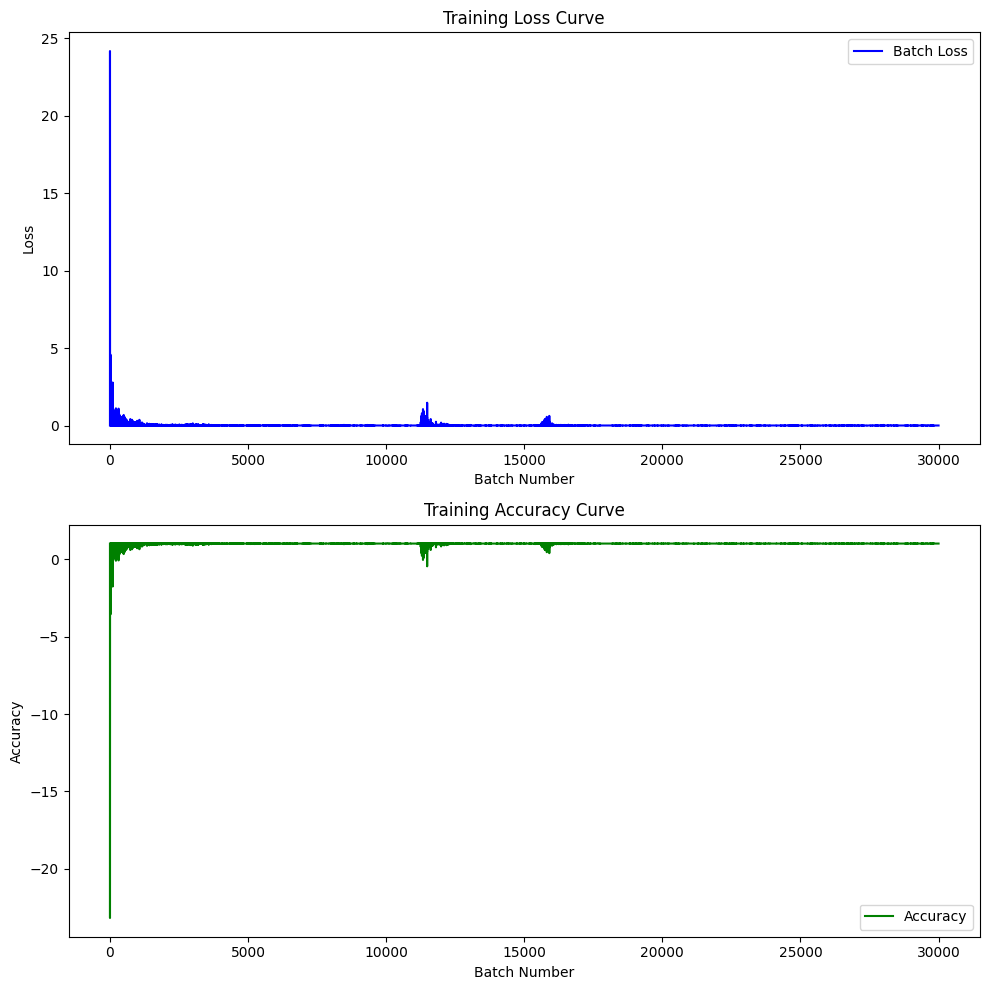

In [38]:
import matplotlib.pyplot as plt

# Plotting the losses against batch numbers
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot Training Loss Curve
axs[0].plot(batch_numbers, batch_losses, label='Batch Loss', color='blue')
axs[0].set_xlabel('Batch Number')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss Curve')
axs[0].legend()

# Plot Accuracy Curve
accuracy = [1 - loss for loss in batch_losses]  # Calculate accuracy (1 - MSE)
axs[1].plot(batch_numbers, accuracy, label='Accuracy', color='green')
axs[1].set_xlabel('Batch Number')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training Accuracy Curve')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluation on test set

# For regression tasks
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


model.eval()

total_mse = 0
decimal_places = 8  # Set the number of decimal places you want
num_imgs = 0
running_loss = 0
batch_size = 18270  # Maximum number of images to evaluate
batch_idx = 0
idx = []
losses = []

for batch_idx, (images, labels) in enumerate(test_loader):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs.squeeze(), labels.float())  # Convert labels to float
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    num_imgs += images.size(0)  # Update the number of images processed
    
    # Store batch loss and batch number
    losses.append(loss.item())
    idx.append(batch_idx + 1)  # Batch numbers start from 1

    print(f"Batch {batch_idx+1}, Loss: {loss.item():.4f}, Images: {num_imgs}")

    # Check if the maximum number of images to train on is reached
    #if num_imgs >= max_imgs_to_train:
     #   break

epoch_loss = running_loss / num_imgs  # Calculate the average loss per image
print(f"Loss: {epoch_loss:.4f}, Images: {num_imgs}")

In [ ]:
# Creating figure 1 for loss and accuracy
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 5))

# Plotting loss for each image
axs1[0].plot(idx, losses, label='Loss', color='blue')
axs1[0].set_xlabel('Image Index')
axs1[0].set_ylabel('Loss')
axs1[0].set_title('Loss Distribution on Test Set')
axs1[0].legend()

# Plotting accuracy for each image
acc = [1 - loss for loss in losses]
axs1[1].plot(idx, acc, label='Accuracy', color='green')
axs1[1].set_xlabel('Image Index')
axs1[1].set_ylabel('Accuracy')
axs1[1].set_title('Accuracy Distribution on Test Set')
axs1[1].legend()